<a href="https://colab.research.google.com/github/randy99kuang/ML_FinalProject/blob/main/condensed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODOs

In [ ]:
#@title Score-board { form-width: "20%" }
'''
 ==============================================================================
Scoreboard:
                          TUESDAY:  21:00 - Rehersal
  Slides: 
    0. Problem definition - Annie (almost done)
    1. Motivation - Annie (almost done)
    a. Preliminaries (Dataset) - Randy 
    b. Methods - (All of Us)
      i.   RAIN 
      ii.  [PixelDefend or Other]
      iii. Our pipeline - Shaurya
    c. Results - Depends -
      i.   White box / black box on baseline
        1. Transferability - TODO
      ii.  Image transforms on baseline
      iii. PCA detector
      iv.  EDSR Denoiser - images and test on grad/rand   
    d. Deliverables - (copy and check off) - Shaurya 
    e. What we learned - All of us


                        CODE

--0.-Consistant-Datasets-that-are-not-swapped----Russ -----------------------

  1, Full Pipline - Annie <- (Russ)
-----------------------------a.-PCA---Annie----------------------------------                  
    b. Adversary Classifier - Randy
                    /\
--------------------||-(Annie)---Give either-a-bin-or-softmax(logits)
                    \/                              /\
      ===== Link to Denoisers                       ||
    c. based on a/b Denoise                         ||
-------i.-EDSR/Conv.Auto---Russ-(grad,-rand)--------||--------------
------ii.-Train-with-image-transforms---(Russ)------||--------------
                    /\                              \/
--------------------||---(Annie)-----------One's hot or weighted----    
                    \/                              
----d.-Base-line-classify----Done-----------------------------------

  2, Comparisons
----a.-RAIN---Russ--------------------------------------------------
    b. Provably Robust Boosting - Shaurya (<- Randy)
      0. Debug 
      i. Run on all our data
      \                                             /
       \___________________________________________/
    c. Train w/ defender vs. only use defender at test. 
  
 ==============================================================================
 '''

"\n ==============================================================================\nScoreboard:\n                          TUESDAY:  21:00 - Rehersal\n  Slides: \n    0. Problem definition - Annie (almost done)\n    1. Motivation - Annie (almost done)\n    a. Preliminaries (Dataset) - Randy \n    b. Methods - (All of Us)\n      i.   RAIN \n      ii.  [PixelDefend or Other]\n      iii. Our pipeline - Shaurya\n    c. Results - Depends -\n      i.   White box / black box on baseline\n        1. Transferability - TODO\n      ii.  Image transforms on baseline\n      iii. PCA detector\n      iv.  EDSR Denoiser - images and test on grad/rand   \n    d. Deliverables - (copy and check off) - Shaurya \n    e. What we learned - All of us\n\n\n                        CODE\n\n--0.-Consistant-Datasets-that-are-not-swapped----Russ -----------------------\n\n  1, Full Pipline - Annie <- (Russ)\n-----------------------------a.-PCA---Annie----------------------------------                  \n    b. Adve

In [ ]:
#@title Score-board { form-width: "20%" }
'''
 ==============================================================================
                        CODE

--1. Print misclassified examples (Annie)
--2. Separating colab in Python files (Randy)
--3. Provable Robust Boosting (Shaurya)

                        WRITEUP
--1. 
  
 ==============================================================================
'''

'\n ==============================================================================\n                        CODE\n\n--1. Print misclassified examples (Annie)\n--2. Separating colab in Python files (Randy)\n--3. Provable Robust Boosting (Shaurya)\n\n                        WRITEUP\n--1. \n  \n ==============================================================================\n'

# Model/Data Save Paths


In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')

# Feel free to create your own path and comment out the other paths when you run
# PATH = "."  # Default path that doesn't save to your drive, use this if you don't want to specify a path
PATH = "/content/drive/My Drive/ML Final Project Files/"  # Randy's Path

Mounted at /content/drive


# Imports and DataLoad Helper


In [ ]:
#@title Imports { form-width: "20%" }

from sklearn.model_selection import train_test_split
#from sklearn.datasets import fetch_openml

from skimage import transform

import numpy as np
from numpy import random as rn

import math
import seaborn as sns
import pandas as pd

!pip install torchviz
import torch
import torchvision
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Sampler

from torch.autograd import grad

!pip install ray torch torchvision
from ray import tune
from ray.tune.schedulers import ASHAScheduler
from ray.tune import CLIReporter

from functools import partial

import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

# Imports for file saving
import os.path
import pickle
import sys

sys.path.append('/content/drive/MyDrive/ML Final Project Files/Code')



     |████████████████████████████████| 51kB 6.5MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3522 sha256=d5c0a01ea7e4d50604a3cc08cacd1ded6ac8b96ac6815dbd100e98101f1cb295
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz
     |████████████████████████████████| 23.1MB 1.5MB/s 
     |████████████████████████████████| 2.9MB 55.6MB/s 
     |████████████████████████████████| 71kB 11.2MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 71kB 11.1MB/s 
     |████████████████████████████████| 133kB 62.8MB/s 
     |████████████████████████████████| 1.3MB 51.1MB/s 
     |████████████████████████████████| 204kB 52.8MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 143kB 61.5MB/s 
     |████████████████████████████████| 296kB 59.6MB/s 
     |████████████████████████████████| 102kB 1

In [ ]:
#@title Data Loading Helper Fcn { form-width: "20%" }

from data_loading import print_info, clean_images, load_data, ImageDataset


# Load Fashsion MNIST "mnist_devloader","mnist_x", etc.

In [ ]:
#@title Load Fashion MNIST using Torch Utils { form-width: "20%" }
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
convert = transforms.Compose(
    [transforms.ToTensor()]
)

SAVE_PATH = PATH + 'train_mnist_x' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    tempx_train = np.load(f) 
  SAVE_PATH = PATH + 'train_mnist_y' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    tempy_train = np.load(f)
  SAVE_PATH = PATH + 'dev_mnist_x' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    tempx_dev = np.load(f)
  SAVE_PATH = PATH + 'dev_mnist_y' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    tempy_dev = np.load(f)
  SAVE_PATH = PATH + 'test_mnist_x' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    tempx_test = np.load(f)
  SAVE_PATH = PATH + 'test_mnist_y' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    tempy_test = np.load(f)
else:

  mnist_trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                          download=True, transform=convert)
  total_size = 0.2 # <-------- # Change how much of set we use HERE !
  dev_size = 0.1
  total = len(mnist_trainset)
  ind = np.arange(total)
  rn.shuffle(ind)
  ind = ind[0:int(np.floor(total_size*total))]
  split = int(np.floor(dev_size*total_size*total))
  train_sampler = SubsetRandomSampler(ind[split:])
  dev_sampler = SubsetRandomSampler(ind[0:split])

  mnist_trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=10,
                                            sampler=train_sampler, num_workers=2)
  mnist_devloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=10,
                                            sampler=dev_sampler, num_workers=2)

  mnist_testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                        download=True, transform=convert)
  total = len(mnist_testset)
  ind = np.arange(total)
  rn.shuffle(ind)
  ind = ind[0:int(np.floor(total_size*total))]
  test_sampler = SubsetRandomSampler(ind)
  mnist_testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=10,
                                          sampler=test_sampler, num_workers=2)

  mnist_classes = ('top', 'trouser', 'pullover', 'dress',
            'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot')

  EX, LAB = iter(mnist_trainloader).next()
  tempx_train = np.empty_like(EX[0])
  tempy_train = np.empty_like([0])
  for (i_batch,data) in enumerate(mnist_trainloader,0):
    inputs, labels = data
    for ex,tar in zip(inputs,labels):
      tempx_train = np.append(tempx_train,ex.numpy(),axis=0)
      tar = tar.numpy()
      tempy_train = np.append(tempy_train,[tar],axis=0)

  tempx_dev = np.empty_like(EX[0])
  tempy_dev = np.empty_like([0])
  for (i_batch,data) in enumerate(mnist_devloader,0):
    inputs, labels = data
    for ex,tar in zip(inputs,labels):
      tempx_dev = np.append(tempx_dev,ex.numpy(),axis=0)
      tar = tar.numpy()
      tempy_dev = np.append(tempy_dev,[tar],axis=0)

  tempx_test = np.empty_like(EX[0])
  tempy_test = np.empty_like([0])
  for (i_batch,data) in enumerate(mnist_testloader,0):
    inputs, labels = data
    for ex,tar in zip(inputs,labels):
      tempx_test = np.append(tempx_test,ex.numpy(),axis=0)
      tar = tar.numpy()
      tempy_test = np.append(tempy_test,[tar],axis=0)

  tempx_train = clean_images(tempx_train[1:])
  tempx_dev = clean_images(tempx_dev[1:])
  tempx_test = clean_images(tempx_test[1:])

  tempy_train = tempy_train[1:]
  tempy_dev = tempy_dev[1:]
  tempy_test = tempy_test[1:]

  with open(PATH + 'train_mnist_x' + '.npy', 'wb') as f:
    np.save(f, np.array(tempx_train))
  with open(PATH + 'train_mnist_y' + '.npy', 'wb') as f:
    np.save(f, np.array(tempy_train))
  with open(PATH + 'dev_mnist_x' + '.npy', 'wb') as f:
    np.save(f, np.array(tempx_dev))
  with open(PATH + 'dev_mnist_y' + '.npy', 'wb') as f:
    np.save(f, np.array(tempy_dev))
  with open(PATH + 'test_mnist_x' + '.npy', 'wb') as f:
    np.save(f, np.array(tempx_test))
  with open(PATH + 'test_mnist_y' + '.npy', 'wb') as f:
    np.save(f, np.array(tempy_test))


#############################################################################
mnist_classes = ('top', 'trouser', 'pullover', 'dress',
            'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot')

mnist_x = {'train':tempx_train, 'dev':tempx_dev, 'test':tempx_test}
mnist_y = {'train':tempy_train, 'dev':tempy_dev, 'test':tempy_test}

mnist_trainset = ImageDataset(mnist_x["train"],mnist_y["train"])
mnist_devset = ImageDataset(mnist_x["dev"],mnist_y["dev"])
mnist_testset = ImageDataset(mnist_x["test"],mnist_y["test"])

mnist_trainloader = DataLoader(mnist_trainset,50,shuffle=True)
mnist_devloader = DataLoader(mnist_devset,50,shuffle=True)
mnist_testloader = DataLoader(mnist_testset,50,shuffle=True)

In [ ]:
#@title
print(mnist_x["train"].shape)
print(mnist_y["train"].shape)
print(mnist_x["dev"].shape)
print(mnist_y["dev"].shape)
print(mnist_x["test"].shape)
print(mnist_y["test"].shape)

(10800, 28, 28)
(10800,)
(1200, 28, 28)
(1200,)
(2000, 28, 28)
(2000,)


# Baseline Classifiers


In [ ]:
#@title ANN Based Baseline Classifiers { form-width: "20%" }

from baseline_classifiers import FF, CNN, composite, train, test


# Train on Fashion MNIST

In [ ]:
#@title mnist_ff { form-width: "20%" }
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mnist_ff = FF(in_flat_dim=28*28*1,up1=3,out_dim=10,h1=1000,h2=100)
mnist_ff.to(device)
optimizer = torch.optim.Adam(mnist_ff.parameters(),lr=0.00001)

SAVE_PATH = PATH + 'mnist_ff.pth'
if os.path.isfile(SAVE_PATH):
  mnist_ff.load_state_dict(torch.load(SAVE_PATH))
else:
  train(mnist_ff,optimizer,mnist_trainloader,"mnist_ff",epoch=5,plot=True,devloader=mnist_devloader)

baseline_ff = test(mnist_ff,mnist_testloader)[0]
print(baseline_ff)


0.797


In [ ]:
#@title mnist_cnn { form-width: "20%" }
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mnist_cnn = CNN(
    up1=3,out_dim=10,chan1=128,chan2=64,chan3=32,k1=17,k2=9,k3=3,p12=2,color=1)
mnist_cnn.to(device)
optimizer = torch.optim.Adam(mnist_cnn.parameters(),lr=0.00001,weight_decay=1e-5)

SAVE_PATH = PATH + 'mnist_cnn.pth'
if os.path.isfile(SAVE_PATH):
  mnist_cnn.load_state_dict(torch.load(SAVE_PATH))
else:
  train(mnist_cnn,optimizer,mnist_trainloader,"mnist_cnn",epoch=10,plot=True,devloader=mnist_devloader)

baseline_cnn = test(mnist_cnn,mnist_testloader)[0]
print(baseline_cnn)


0.4485


In [ ]:
#@title object_composite { form-width: "20%" }
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mnist_comp = composite(up1=8,out_dim=10,chan1=100,chan2=60,chan3=40,k1=25,k2=17,k3=7,
                   h4=100,h5=100,p12=4,p23=3,color=1)
mnist_comp.to(device)
optimizer = torch.optim.Adam(mnist_comp.parameters(),lr=0.00001)

SAVE_PATH = PATH + 'mnist_comp.pth'
if os.path.isfile(SAVE_PATH):
  mnist_comp.load_state_dict(torch.load(SAVE_PATH))
else:
  train(mnist_comp,optimizer,mnist_trainloader,"mnist_comp",epoch=5,plot=True,devloader=mnist_devloader)

baseline_comp = test(mnist_comp,mnist_testloader)[0]
print(baseline_comp)

0.7465


# Random Perturbation Based Attacks

In [ ]:
#@title
idx = 41
delta = 0.1

In [ ]:
#@title RP and SimBA { form-width: "20%" }
# Chop into chunks for faster GPU batching

from random_perturbation import *

sneaker: 7
Epsilon: 0.1
Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.7885
CNN test accuracy: 0.4325
Composite test accuracy: 0.735


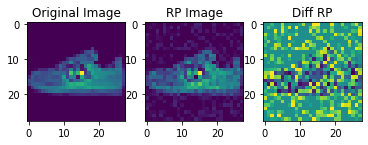

In [ ]:
#@title Generate and visualize RP set { form-width: "20%" }

SAVE_PATH = PATH + 'mnist_x_rp' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_rp = np.load(f) 
else:
  mnist_x_rp = make_rand_attacks('mnist_x_rp', x=mnist_x["dev"],y=mnist_y["dev"],
                             model=None,method="RP",step_size=None,
                             chunk=50,epsilon=delta,n_steps=None)

# Generate a train-set sized group  
SAVE_PATH = PATH + 'train_mnist_x_rp' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_rp = np.load(f) 
else:
  train_mnist_x_rp = make_rand_attacks('train_mnist_x_rp', x=mnist_x["train"],y=mnist_y["train"],
                             model=None,method="RP",step_size=None,
                             chunk=50,epsilon=delta,n_steps=None)
  
SAVE_PATH = PATH + 'test_mnist_x_rp' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_rp = np.load(f) 
else:
  test_mnist_x_rp = make_rand_attacks('test_mnist_x_rp', x=mnist_x["test"],y=mnist_y["test"],
                             model=None,method="RP",step_size=None,
                             chunk=50,epsilon=delta,n_steps=None)

fig = plt.figure()
print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))
print("Epsilon: " + str(delta))

ax = plt.subplot(1,3,1)
ax.set_title("Original Image")
plt.imshow(mnist_x["dev"][idx])
ax = plt.subplot(1,3,2)
ax.set_title("RP Image")
plt.imshow(mnist_x_rp[idx])
ax = plt.subplot(1,3,3)
ax.set_title("Diff RP")
plt.imshow(mnist_x_rp[idx]-mnist_x["dev"][idx])

mnist_rp_set = ImageDataset(mnist_x_rp,mnist_y["dev"])
mnist_rp_devloader = DataLoader(mnist_rp_set,50,shuffle=True)

mnist_rp_testset = ImageDataset(test_mnist_x_rp,mnist_y["test"])
mnist_rp_testloader = DataLoader(mnist_rp_testset,50,shuffle=True)

print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')
print(f'FF test accuracy: {test(mnist_ff,mnist_rp_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_rp_testloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_rp_testloader)[0]}')

In [ ]:
#@title
print(mnist_x_rp.shape)
print(mnist_y["dev"].shape)

print(train_mnist_x_rp.shape)
print(mnist_y["train"].shape)

(1200, 28, 28)
(1200,)
(10800, 28, 28)
(10800,)


50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
sneaker: 7
Epsilon: 0.30000000000000004
Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.7715
CNN test accuracy: 0.423
Composite test accuracy: 0.7145


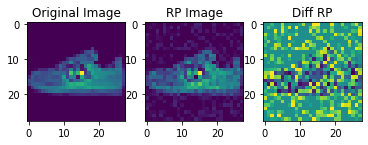

In [ ]:
#@title Generate and visualize a noisier RP set { form-width: "20%" }
mnist_x_3_rp = make_rand_attacks('mnist_x_rp_3x_epsilon', x=mnist_x["test"],y=mnist_y["test"],
                             model=None,method="RP",step_size=None,
                             chunk=50,epsilon=3*delta,n_steps=None)

fig = plt.figure()
print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))
print("Epsilon: " + str(3*delta))

ax = plt.subplot(1,3,1)
ax.set_title("Original Image")
plt.imshow(mnist_x["dev"][idx])
ax = plt.subplot(1,3,2)
ax.set_title("RP Image")
plt.imshow(mnist_x_rp[idx])
ax = plt.subplot(1,3,3)
ax.set_title("Diff RP")
plt.imshow(mnist_x_rp[idx]-mnist_x["dev"][idx])

mnist_rp_3_set = ImageDataset(mnist_x_3_rp,mnist_y["test"])
mnist_rp_3_devloader = DataLoader(mnist_rp_3_set,50,shuffle=True)

print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')
print(f'FF test accuracy: {test(mnist_ff,mnist_rp_3_devloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_rp_3_devloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_rp_3_devloader)[0]}')

In [ ]:
#@title Generate SimBA set { form-width: "20%" }

SAVE_PATH = PATH + 'mnist_x_simba_ff' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_simba_ff = np.load(f) 
else:
  mnist_x_simba_ff = make_rand_attacks('mnist_x_simba_ff', x=mnist_x["dev"],y=mnist_y["dev"],
                             model=mnist_ff,method="SimBA",
                             step_size=1,chunk=50,epsilon=delta,n_steps=200)

SAVE_PATH = PATH + 'mnist_x_simba_cnn' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_simba_cnn = np.load(f) 
else:
  mnist_x_simba_cnn = make_rand_attacks('mnist_x_simba_cnn', mnist_x["dev"],mnist_y["dev"],
                             mnist_cnn,"SimBA",1,50,delta,n_steps=200)

SAVE_PATH = PATH + 'mnist_x_simba_comp' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_simba_comp = np.load(f) 
else:
  mnist_x_simba_comp = make_rand_attacks('mnist_x_simba_comp', mnist_x["dev"],mnist_y["dev"],
                             mnist_comp,"SimBA",1,50,delta,n_steps=200)
  
# Generate a train-set sized group  

SAVE_PATH = PATH + 'train_mnist_x_simba_ff' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_simba_ff = np.load(f) 
else:
  train_mnist_x_simba_ff = make_rand_attacks('train_mnist_x_simba_ff', x=mnist_x["train"],y=mnist_y["train"],
                             model=mnist_ff,method="SimBA",
                             step_size=1,chunk=50,epsilon=delta,n_steps=200)

SAVE_PATH = PATH + 'train_mnist_x_simba_cnn' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_simba_cnn = np.load(f) 
else:
  train_mnist_x_simba_cnn = make_rand_attacks('train_mnist_x_simba_cnn', mnist_x["train"],mnist_y["train"],
                             mnist_cnn,"SimBA",1,50,delta,n_steps=200)

SAVE_PATH = PATH + 'train_mnist_x_simba_comp' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_simba_comp = np.load(f) 
else:
  train_mnist_x_simba_comp = make_rand_attacks('train_mnist_x_simba_comp', mnist_x["train"],mnist_y["train"],
                             mnist_comp,"SimBA",1,50,delta,n_steps=200)
  

SAVE_PATH = PATH + 'test_mnist_x_simba_ff' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_simba_ff = np.load(f) 
else:
  test_mnist_x_simba_ff = make_rand_attacks('test_mnist_x_simba_ff', x=mnist_x["test"],y=mnist_y["test"],
                             model=mnist_ff,method="SimBA",
                             step_size=1,chunk=50,epsilon=delta,n_steps=200)

SAVE_PATH = PATH + 'test_mnist_x_simba_cnn' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_simba_cnn = np.load(f) 
else:
  test_mnist_x_simba_cnn = make_rand_attacks('test_mnist_x_simba_cnn', mnist_x["test"],mnist_y["test"],
                             mnist_cnn,"SimBA",1,50,delta,n_steps=200)

SAVE_PATH = PATH + 'test_mnist_x_simba_comp' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_simba_comp = np.load(f) 
else:
  test_mnist_x_simba_comp = make_rand_attacks('test_mnist_x_simba_comp', mnist_x["test"],mnist_y["test"],
                             mnist_comp,"SimBA",1,50,delta,n_steps=200)

In [ ]:
#@title
print(mnist_x_simba_ff.shape)
print(mnist_y["dev"].shape)

print(mnist_x_simba_cnn.shape)
print(mnist_y["dev"].shape)

print(mnist_x_simba_comp.shape)
print(mnist_y["dev"].shape)

print(train_mnist_x_simba_ff.shape)
print(mnist_y["train"].shape)

print(train_mnist_x_simba_cnn.shape)
print(mnist_y["train"].shape)

print(train_mnist_x_simba_comp.shape)
print(mnist_y["train"].shape)

(1200, 28, 28)
(1200,)
(1200, 28, 28)
(1200,)
(1200, 28, 28)
(1200,)
(10800, 28, 28)
(10800,)
(10800, 28, 28)
(10800,)
(10800, 28, 28)
(10800,)


sneaker: 7
Epsilon: 0.1
Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.5855
CNN test accuracy: 0.294
Composite test accuracy: 0.6625


<Figure size 432x288 with 0 Axes>

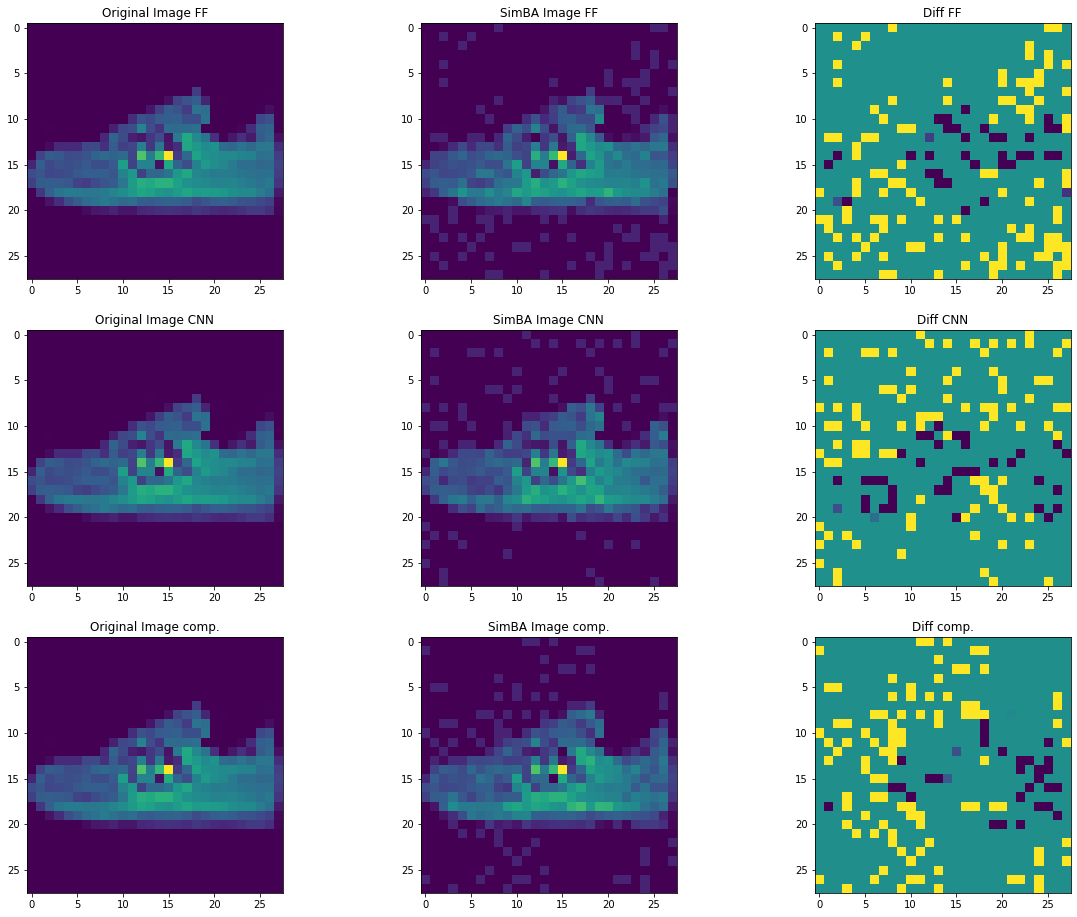

In [ ]:
#@title Visualize SimBA { form-width: "20%" }
fig = plt.figure()
print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))

fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(20,16))
print("Epsilon: " + str(delta))

ax[0][0].set_title("Original Image FF")
ax[0][0].imshow(mnist_x["dev"][idx])
ax[0][1].set_title("SimBA Image FF")
ax[0][1].imshow(mnist_x_simba_ff[idx])
ax[0][2].set_title("Diff FF")
ax[0][2].imshow(mnist_x_simba_ff[idx]-mnist_x["dev"][idx])

ax[1][0].set_title("Original Image CNN")
ax[1][0].imshow(mnist_x["dev"][idx])
ax[1][1].set_title("SimBA Image CNN")
ax[1][1].imshow(mnist_x_simba_cnn[idx])
ax[1][2].set_title("Diff CNN")
ax[1][2].imshow(mnist_x_simba_cnn[idx]-mnist_x["dev"][idx])

ax[2][0].set_title("Original Image comp.")
ax[2][0].imshow(mnist_x["dev"][idx])
ax[2][1].set_title("SimBA Image comp.")
ax[2][1].imshow(mnist_x_simba_comp[idx])
ax[2][2].set_title("Diff comp.")
ax[2][2].imshow(mnist_x_simba_comp[idx]-mnist_x["dev"][idx])

mnist_ff_simba_set = ImageDataset(mnist_x_simba_ff,mnist_y["dev"])
mnist_ff_simba_devloader = DataLoader(mnist_ff_simba_set,50,shuffle=True)

mnist_cnn_simba_set = ImageDataset(mnist_x_simba_cnn,mnist_y["dev"])
mnist_cnn_simba_devloader = DataLoader(mnist_cnn_simba_set,50,shuffle=True)

mnist_comp_simba_set = ImageDataset(mnist_x_simba_comp,mnist_y["dev"])
mnist_comp_simba_devloader = DataLoader(mnist_comp_simba_set,50,shuffle=True)

mnist_ff_simba_testset = ImageDataset(test_mnist_x_simba_ff,mnist_y["test"])
mnist_ff_simba_testloader = DataLoader(mnist_ff_simba_testset,50,shuffle=True)

mnist_cnn_simba_testset = ImageDataset(test_mnist_x_simba_cnn,mnist_y["test"])
mnist_cnn_simba_testloader = DataLoader(mnist_cnn_simba_testset,50,shuffle=True)

mnist_comp_simba_testset = ImageDataset(test_mnist_x_simba_comp,mnist_y["test"])
mnist_comp_simba_testloader = DataLoader(mnist_comp_simba_testset,50,shuffle=True)

print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')
print(f'FF test accuracy: {test(mnist_ff,mnist_ff_simba_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_simba_testloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_simba_testloader)[0]}')

Baselines - FF: 0.797
FF attacked with FF: 0.5855
FF attacked with CNN: 0.7635
FF attacked with Comp.: 0.7265
Baselines - CNN: 0.4485
CNN attacked with FF: 0.42
CNN attacked with CNN: 0.294
CNN attacked with Comp.: 0.4205
Baselines - Comp.: 0.7465
Comp. attacked with FF: 0.668
Comp. attacked with CNN: 0.713
Comp. attacked with Comp.: 0.6625


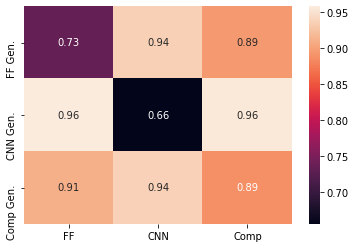

In [ ]:
#@title Transfer SimBA { form-width: "20%" }

print(f'Baselines - FF: {baseline_ff}')
ff00 = test(mnist_ff,mnist_ff_simba_testloader)[0]
print(f'FF attacked with FF: {ff00}')
ff01 = test(mnist_ff,mnist_cnn_simba_testloader)[0]
print(f'FF attacked with CNN: {ff01}')
ff02 = test(mnist_ff,mnist_comp_simba_testloader)[0]
print(f'FF attacked with Comp.: {ff02}')

print(f'Baselines - CNN: {baseline_cnn}')
cnn10 = test(mnist_cnn,mnist_ff_simba_testloader)[0]
print(f'CNN attacked with FF: {cnn10}')
cnn11 = test(mnist_cnn,mnist_cnn_simba_testloader)[0]
print(f'CNN attacked with CNN: {cnn11}')
cnn12 = test(mnist_cnn,mnist_comp_simba_testloader)[0]
print(f'CNN attacked with Comp.: {cnn12}')

print(f'Baselines - Comp.: {baseline_comp}')
comp20 = test(mnist_comp,mnist_ff_simba_testloader)[0]
print(f'Comp. attacked with FF: {comp20}')
comp21 = test(mnist_comp,mnist_cnn_simba_testloader)[0]
print(f'Comp. attacked with CNN: {comp21}')
comp22 = test(mnist_comp,mnist_comp_simba_testloader)[0]
print(f'Comp. attacked with Comp.: {comp22}')

ff_col = [ff00,ff01,ff02]
ff_col = np.array(ff_col) / baseline_ff
cnn_col = [cnn10,cnn11,cnn12]
cnn_col = np.array(cnn_col) / baseline_cnn
comp_col = [comp20,comp21,comp22]
comp_col = np.array(comp_col) / baseline_comp

cross_simba = [ff_col,cnn_col,comp_col]

import pandas as pd

data = {'FF':  [cross_simba[0][0], cross_simba[0][1], cross_simba[0][2]],
        'CNN': [cross_simba[1][0], cross_simba[1][1], cross_simba[1][2]],
        'Comp': [cross_simba[2][0], cross_simba[2][1], cross_simba[2][2]]
        }

cross_simba_df = pd.DataFrame (data, columns = ['FF','CNN', 'Comp'],
                   index=['FF Gen.','CNN Gen.','Comp Gen.'])

sns.heatmap(cross_simba_df,annot=True)

In [ ]:
#@title
print(type(ff_col))

<class 'numpy.ndarray'>


In [ ]:
#@title Combined Random Attack { form-width: "20%" }

x_temp = [mnist_x_rp,
          mnist_x_simba_ff,mnist_x_simba_cnn,mnist_x_simba_comp]
x_temp = np.vstack(x_temp)

y_temp = [mnist_y["dev"],
          mnist_y["dev"],mnist_y["dev"],mnist_y["dev"]]
y_temp = np.hstack(y_temp)

im_temp = [mnist_x["dev"],
           mnist_x["dev"],mnist_x["dev"],mnist_x["dev"]]
im_temp = np.vstack(im_temp)

rand_attack_x_devraw = x_temp
rand_attack_im_devraw = im_temp
rand_attack_y_devraw = y_temp

rand_attack_devset = ImageDataset(x_temp,y_temp)
rand_attack_devloader = DataLoader(rand_attack_devset,50,shuffle=True)

rand_attack_im_devset = ImageDataset(x_temp,im_temp)
rand_attack_im_devloader = DataLoader(rand_attack_im_devset,50,shuffle=True)


x_temp = [train_mnist_x_rp,
          train_mnist_x_simba_ff,train_mnist_x_simba_cnn,train_mnist_x_simba_comp]
x_temp = np.vstack(x_temp)

y_temp = [mnist_y["train"],
          mnist_y["train"],mnist_y["train"],mnist_y["train"]]
y_temp = np.hstack(y_temp)

im_temp = [mnist_x["train"],
           mnist_x["train"],mnist_x["train"],mnist_x["train"]]
im_temp = np.vstack(im_temp)

rand_attack_x_train_raw = x_temp
rand_attack_im_train_raw = im_temp
rand_attack_y_train_raw = y_temp

print(rand_attack_x_train_raw.shape)
print(rand_attack_y_train_raw.shape)

rand_attack_trainset = ImageDataset(x_temp,y_temp)
rand_attack_trainloader = DataLoader(rand_attack_trainset,50,shuffle=True)

rand_attack_im_trainset = ImageDataset(x_temp,im_temp)
rand_attack_im_trainloader = DataLoader(rand_attack_im_trainset,50,shuffle=True)

x_temp = [test_mnist_x_rp,
          test_mnist_x_simba_ff,test_mnist_x_simba_cnn,test_mnist_x_simba_comp]
x_temp = np.vstack(x_temp)

y_temp = [mnist_y["test"],
          mnist_y["test"],mnist_y["test"],mnist_y["test"]]
y_temp = np.hstack(y_temp)

rand_attack_x_test_raw = x_temp
rand_attack_im_test_raw = im_temp
rand_attack_y_test_raw = y_temp

rand_attack_testset = ImageDataset(x_temp,y_temp)
rand_attack_testloader = DataLoader(rand_attack_testset,50,shuffle=True)

rand_attack_im_testset = ImageDataset(x_temp,im_temp)
rand_attack_im_testloader = DataLoader(rand_attack_im_testset,50,shuffle=True)

print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')
print(f'FF test accuracy: {test(mnist_ff,rand_attack_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,rand_attack_testloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,rand_attack_testloader)[0]}')

(43200, 28, 28)
(43200,)
Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.716
CNN test accuracy: 0.39175
Composite test accuracy: 0.694625


# Gradient Based Attack


In [ ]:
#@title
delta = 0.2
idx = 41

In [ ]:
#@title Gradient Attacks (PGD,FGSM,BIM) { form-width: "20%" }

from gradient_based_attacks import *

In [ ]:
#@title Generate FGSM sets { form-width: "20%" }
loss_fcn = torch.nn.CrossEntropyLoss()

SAVE_PATH = PATH + 'mnist_x_fgsm_ff' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_fgsm_ff = np.load(f) 
else:
  mnist_x_fgsm_ff = make_grad_attacks('mnist_x_fgsm_ff', x=mnist_x["dev"],y=mnist_y["dev"],
                             model=mnist_ff,loss_fcn=loss_fcn,method="FGSM",
                             step_size=0.015,chunk=50,epsilon=delta)

SAVE_PATH = PATH + 'mnist_x_fgsm_cnn' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_fgsm_cnn = np.load(f) 
else:
  mnist_x_fgsm_cnn = make_grad_attacks('mnist_x_fgsm_cnn', mnist_x["dev"],mnist_y["dev"],
                             mnist_cnn,loss_fcn,"FGSM",0.02,50,delta)

SAVE_PATH = PATH + 'mnist_x_fgsm_comp' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_fgsm_comp = np.load(f) 
else:
  mnist_x_fgsm_comp = make_grad_attacks('mnist_x_fgsm_comp', mnist_x["dev"],mnist_y["dev"],
                             mnist_comp,loss_fcn,"FGSM",0.02,50,delta)

# Uncomment for a trainset sized attack

SAVE_PATH = PATH + 'train_mnist_x_fgsm_ff' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_fgsm_ff = np.load(f) 
else:
  train_mnist_x_fgsm_ff = make_grad_attacks('train_mnist_x_fgsm_ff', mnist_x["train"],mnist_y["train"],
                             mnist_ff,loss_fcn,"FGSM",0.015,50,delta)
  
SAVE_PATH = PATH + 'train_mnist_x_fgsm_cnn' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_fgsm_cnn = np.load(f) 
else:
  train_mnist_x_fgsm_cnn = make_grad_attacks('train_mnist_x_fgsm_cnn', mnist_x["train"],mnist_y["train"],
                             mnist_cnn,loss_fcn,"FGSM",0.02,50,delta)
  
SAVE_PATH = PATH + 'train_mnist_x_fgsm_comp' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_fgsm_comp = np.load(f) 
else:
  train_mnist_x_fgsm_comp = make_grad_attacks('train_mnist_x_fgsm_comp', mnist_x["train"],mnist_y["train"],
                             mnist_comp,loss_fcn,"FGSM",0.02,50,delta)
  

SAVE_PATH = PATH + 'test_mnist_x_fgsm_ff' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_fgsm_ff = np.load(f) 
else:
  test_mnist_x_fgsm_ff = make_grad_attacks('test_mnist_x_fgsm_ff', mnist_x["test"],mnist_y["test"],
                             mnist_ff,loss_fcn,"FGSM",0.015,50,delta)
  
SAVE_PATH = PATH + 'test_mnist_x_fgsm_cnn' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_fgsm_cnn = np.load(f) 
else:
  test_mnist_x_fgsm_cnn = make_grad_attacks('test_mnist_x_fgsm_cnn', mnist_x["test"],mnist_y["test"],
                             mnist_cnn,loss_fcn,"FGSM",0.02,50,delta)
  
SAVE_PATH = PATH + 'test_mnist_x_fgsm_comp' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_fgsm_comp = np.load(f) 
else:
  test_mnist_x_fgsm_comp = make_grad_attacks('test_mnist_x_fgsm_comp', mnist_x["test"],mnist_y["test"],
                             mnist_comp,loss_fcn,"FGSM",0.02,50,delta)

mnist_ff_fgsm_testset = ImageDataset(test_mnist_x_fgsm_ff,mnist_y["test"])
mnist_ff_fgsm_testloader = DataLoader(mnist_ff_fgsm_testset,50,shuffle=True)

mnist_cnn_fgsm_testset = ImageDataset(test_mnist_x_fgsm_cnn,mnist_y["test"])
mnist_cnn_fgsm_testloader = DataLoader(mnist_cnn_fgsm_testset,50,shuffle=True)

mnist_comp_fgsm_testset = ImageDataset(test_mnist_x_fgsm_comp,mnist_y["test"])
mnist_comp_fgsm_testloader = DataLoader(mnist_comp_fgsm_testset,50,shuffle=True)


In [ ]:
#@title Generate PGD sets { form-width: "20%" }

SAVE_PATH = PATH + 'mnist_x_pgd_ff' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_pgd_ff = np.load(f) 
else:
  mnist_x_pgd_ff = make_grad_attacks('mnist_x_pgd_ff', x=mnist_x["dev"],y=mnist_y["dev"],
                              model=mnist_ff,loss_fcn=loss_fcn,method="PGD",
                              step_size=2.5,chunk=50,epsilon=delta)
  
SAVE_PATH = PATH + 'mnist_x_pgd_cnn' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_pgd_cnn = np.load(f) 
else:
  mnist_x_pgd_cnn = make_grad_attacks('mnist_x_pgd_cnn', mnist_x["dev"],mnist_y["dev"],
                              mnist_cnn,loss_fcn,"PGD",4,50,delta)

SAVE_PATH = PATH + 'mnist_x_pgd_comp' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_pgd_comp = np.load(f) 
else:
  mnist_x_pgd_comp = make_grad_attacks('mnist_x_pgd_comp', mnist_x["dev"],mnist_y["dev"],
                                    mnist_comp,loss_fcn,"PGD",4,50,delta)

# Train set sized attack

SAVE_PATH = PATH + 'train_mnist_x_pgd_ff' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_pgd_ff = np.load(f) 
else:
  train_mnist_x_pgd_ff = make_grad_attacks('train_mnist_x_pgd_ff', mnist_x["train"],mnist_y["train"],
                                    mnist_ff,loss_fcn,"PGD",2.5,50,delta)
  
SAVE_PATH = PATH + 'train_mnist_x_pgd_cnn' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_pgd_cnn = np.load(f) 
else:
  train_mnist_x_pdg_cnn = make_grad_attacks('train_mnist_x_pgd_cnn', mnist_x["train"],mnist_y["train"],
                                    mnist_cnn,loss_fcn,"PGD",4,50,delta)
  
SAVE_PATH = PATH + 'train_mnist_x_pgd_comp' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_pgd_comp = np.load(f) 
else:
  train_mnist_x_pdg_comp = make_grad_attacks('train_mnist_x_pgd_comp', mnist_x["train"],mnist_y["train"],
                                    mnist_comp,loss_fcn,"PGD",4,50,delta)
  

SAVE_PATH = PATH + 'test_mnist_x_pgd_ff' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_pgd_ff = np.load(f) 
else:
  test_mnist_x_pgd_ff = make_grad_attacks('test_mnist_x_pgd_ff', mnist_x["test"],mnist_y["test"],
                                    mnist_ff,loss_fcn,"PGD",2.5,50,delta)
  
SAVE_PATH = PATH + 'test_mnist_x_pgd_cnn' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_pgd_cnn = np.load(f) 
else:
  test_mnist_x_pdg_cnn = make_grad_attacks('test_mnist_x_pgd_cnn', mnist_x["test"],mnist_y["test"],
                                    mnist_cnn,loss_fcn,"PGD",4,50,delta)
  
SAVE_PATH = PATH + 'test_mnist_x_pgd_comp' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_pgd_comp = np.load(f) 
else:
  test_mnist_x_pdg_comp = make_grad_attacks('test_mnist_x_pgd_comp', mnist_x["test"],mnist_y["test"],
                                    mnist_comp,loss_fcn,"PGD",4,50,delta)

mnist_ff_pgd_testset = ImageDataset(test_mnist_x_pgd_ff,mnist_y["test"])
mnist_ff_pgd_testloader = DataLoader(mnist_ff_pgd_testset,50,shuffle=True)

mnist_cnn_pgd_testset = ImageDataset(test_mnist_x_pgd_cnn,mnist_y["test"])
mnist_cnn_pgd_testloader = DataLoader(mnist_cnn_pgd_testset,50,shuffle=True)

mnist_comp_pgd_testset = ImageDataset(test_mnist_x_pgd_comp,mnist_y["test"])
mnist_comp_pgd_testloader = DataLoader(mnist_comp_pgd_testset,50,shuffle=True)


In [ ]:
#@title Generate BIM sets { form-width: "20%" }

SAVE_PATH = PATH + 'mnist_x_bim_ff' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_bim_ff = np.load(f) 
else:
  mnist_x_bim_ff = make_grad_attacks('mnist_x_bim_ff', x=mnist_x["dev"],y=mnist_y["dev"],
                             model=mnist_ff,loss_fcn=loss_fcn,method="BIM",
                             step_size=0.2,chunk=50,epsilon=delta,n_steps=50)

SAVE_PATH = PATH + 'mnist_x_bim_cnn' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_bim_cnn = np.load(f) 
else:
  mnist_x_bim_cnn = make_grad_attacks('mnist_x_bim_cnn', mnist_x["dev"],mnist_y["dev"],
                             mnist_cnn,loss_fcn,"BIM",0.2,50,delta,n_steps=50)

SAVE_PATH = PATH + 'mnist_x_bim_comp' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_bim_comp = np.load(f) 
else:
  mnist_x_bim_comp = make_grad_attacks('mnist_x_bim_comp', mnist_x["dev"],mnist_y["dev"],
                                     mnist_comp,loss_fcn,"BIM",
                                     0.2,50,delta,n_steps=50)
  
# Trainset sized attack

SAVE_PATH = PATH + 'train_mnist_x_bim_ff' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_bim_ff = np.load(f) 
else:
  train_mnist_x_bim_ff = make_grad_attacks('train_mnist_x_bim_ff', x=mnist_x["train"],y=mnist_y["train"],
                             model=mnist_ff,loss_fcn=loss_fcn,method="BIM",
                             step_size=0.2,chunk=50,epsilon=delta,n_steps=50)

SAVE_PATH = PATH + 'train_mnist_x_bim_cnn' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_bim_cnn = np.load(f) 
else:
  train_mnist_x_bim_cnn = make_grad_attacks('train_mnist_x_bim_cnn', mnist_x["train"],mnist_y["train"],
                             mnist_cnn,loss_fcn,"BIM",0.2,50,delta,n_steps=50)

SAVE_PATH = PATH + 'train_mnist_x_bim_comp' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_bim_comp = np.load(f) 
else:
  train_mnist_x_bim_comp = make_grad_attacks('train_mnist_x_bim_comp', mnist_x["train"],mnist_y["train"],
                                     mnist_comp,loss_fcn,"BIM",
                                     0.2,50,delta,n_steps=50)
  

SAVE_PATH = PATH + 'test_mnist_x_bim_ff' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_bim_ff = np.load(f) 
else:
  test_mnist_x_bim_ff = make_grad_attacks('test_mnist_x_bim_ff', x=mnist_x["test"],y=mnist_y["test"],
                             model=mnist_ff,loss_fcn=loss_fcn,method="BIM",
                             step_size=0.2,chunk=50,epsilon=delta,n_steps=50)

SAVE_PATH = PATH + 'test_mnist_x_bim_cnn' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_bim_cnn = np.load(f) 
else:
  test_mnist_x_bim_cnn = make_grad_attacks('test_mnist_x_bim_cnn', mnist_x["test"],mnist_y["test"],
                             mnist_cnn,loss_fcn,"BIM",0.2,50,delta,n_steps=50)

SAVE_PATH = PATH + 'test_mnist_x_bim_comp' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_bim_comp = np.load(f) 
else:
  test_mnist_x_bim_comp = make_grad_attacks('test_mnist_x_bim_comp', mnist_x["test"],mnist_y["test"],
                                     mnist_comp,loss_fcn,"BIM",
                                     0.2,50,delta,n_steps=50)

mnist_ff_bim_testset = ImageDataset(test_mnist_x_bim_ff,mnist_y["test"])
mnist_ff_bim_testloader = DataLoader(mnist_ff_bim_testset,50,shuffle=True)

mnist_cnn_bim_testset = ImageDataset(test_mnist_x_bim_cnn,mnist_y["test"])
mnist_cnn_bim_testloader = DataLoader(mnist_cnn_bim_testset,50,shuffle=True)

mnist_comp_bim_testset = ImageDataset(test_mnist_x_bim_comp,mnist_y["test"])
mnist_comp_bim_testloader = DataLoader(mnist_comp_bim_testset,50,shuffle=True)


sneaker: 7
Epsilon: 0.2
Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.702
CNN test accuracy: 0.3595
Composite test accuracy: 0.712


<Figure size 432x288 with 0 Axes>

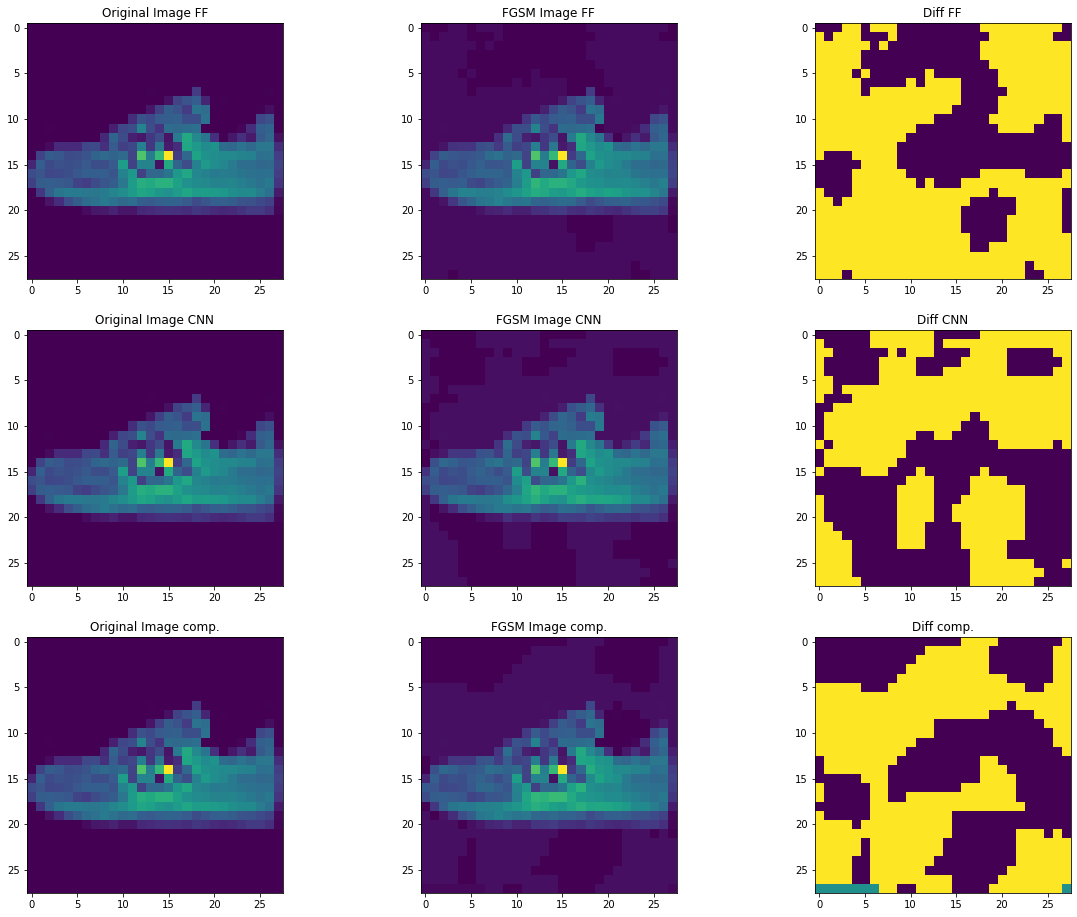

In [ ]:
#@title Visualize FGSM { form-width: "20%" }
fig = plt.figure()
print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))

fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(20,16))
print("Epsilon: " + str(delta))

ax[0][0].set_title("Original Image FF")
ax[0][0].imshow(mnist_x["dev"][idx])
ax[0][1].set_title("FGSM Image FF")
ax[0][1].imshow(mnist_x_fgsm_ff[idx])
ax[0][2].set_title("Diff FF")
ax[0][2].imshow(mnist_x_fgsm_ff[idx]-mnist_x["dev"][idx])

ax[1][0].set_title("Original Image CNN")
ax[1][0].imshow(mnist_x["dev"][idx])
ax[1][1].set_title("FGSM Image CNN")
ax[1][1].imshow(mnist_x_fgsm_cnn[idx])
ax[1][2].set_title("Diff CNN")
ax[1][2].imshow(mnist_x_fgsm_cnn[idx]-mnist_x["dev"][idx])

ax[2][0].set_title("Original Image comp.")
ax[2][0].imshow(mnist_x["dev"][idx])
ax[2][1].set_title("FGSM Image comp.")
ax[2][1].imshow(mnist_x_fgsm_comp[idx])
ax[2][2].set_title("Diff comp.")
ax[2][2].imshow(mnist_x_fgsm_comp[idx]-mnist_x["dev"][idx])

mnist_ff_fgsm_set = ImageDataset(mnist_x_fgsm_ff,mnist_y["dev"])
mnist_ff_fgsm_devloader = DataLoader(mnist_ff_fgsm_set,50,shuffle=True)

mnist_cnn_fgsm_set = ImageDataset(mnist_x_fgsm_cnn,mnist_y["dev"])
mnist_cnn_fgsm_devloader = DataLoader(mnist_cnn_fgsm_set,50,shuffle=True)

mnist_comp_fgsm_set = ImageDataset(mnist_x_fgsm_comp,mnist_y["dev"])
mnist_comp_fgsm_devloader = DataLoader(mnist_comp_fgsm_set,50,shuffle=True)

print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')
print(f'FF test accuracy: {test(mnist_ff,mnist_ff_fgsm_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_fgsm_testloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_fgsm_testloader)[0]}')

sneaker: 7
Epsilon: 0.2
Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.5995
CNN test accuracy: 0.2235
Composite test accuracy: 0.5235


<Figure size 432x288 with 0 Axes>

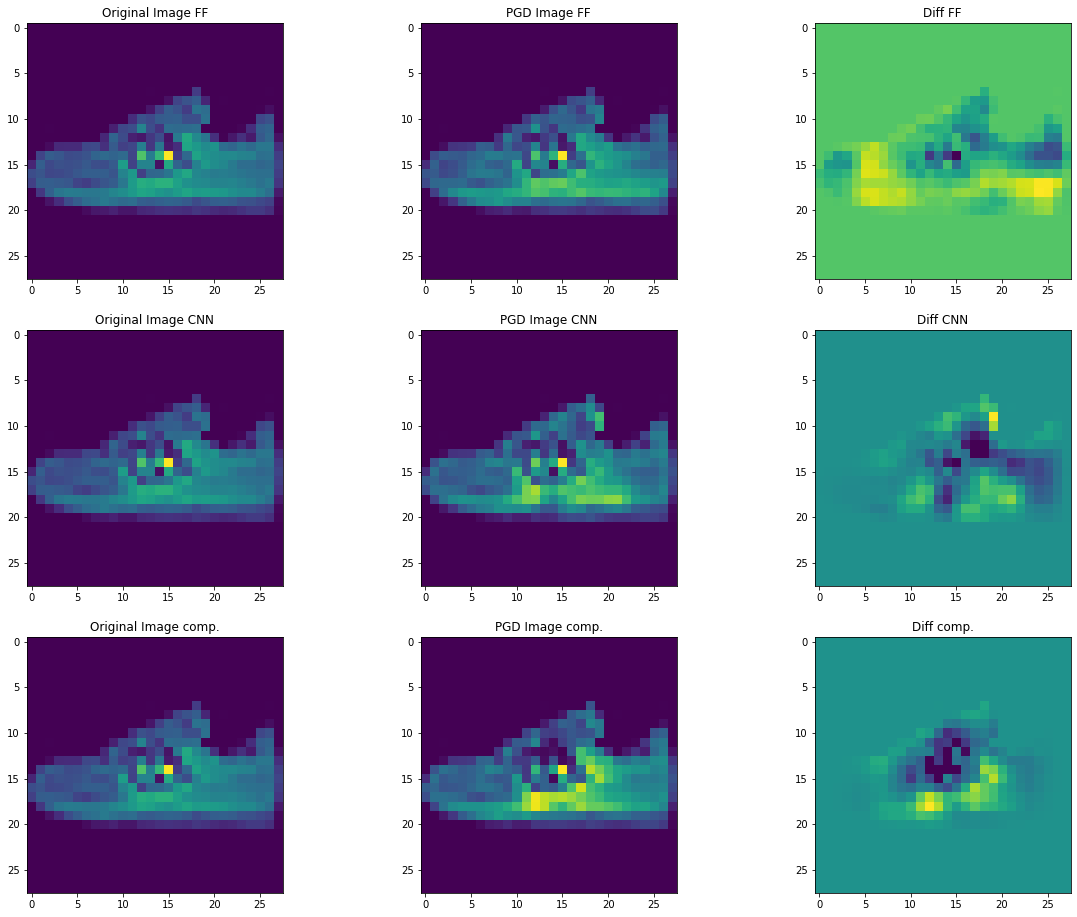

In [ ]:
#@title Visualize PGD { form-width: "20%" }
fig = plt.figure()
print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))

fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(20,16))
print("Epsilon: " + str(delta))

ax[0][0].set_title("Original Image FF")
ax[0][0].imshow(mnist_x["dev"][idx])
ax[0][1].set_title("PGD Image FF")
ax[0][1].imshow(mnist_x_pgd_ff[idx])
ax[0][2].set_title("Diff FF")
ax[0][2].imshow(mnist_x_pgd_ff[idx]-mnist_x["dev"][idx])

ax[1][0].set_title("Original Image CNN")
ax[1][0].imshow(mnist_x["dev"][idx])
ax[1][1].set_title("PGD Image CNN")
ax[1][1].imshow(mnist_x_pgd_cnn[idx])
ax[1][2].set_title("Diff CNN")
ax[1][2].imshow(mnist_x_pgd_cnn[idx]-mnist_x["dev"][idx])

ax[2][0].set_title("Original Image comp.")
ax[2][0].imshow(mnist_x["dev"][idx])
ax[2][1].set_title("PGD Image comp.")
ax[2][1].imshow(mnist_x_pgd_comp[idx])
ax[2][2].set_title("Diff comp.")
ax[2][2].imshow(mnist_x_pgd_comp[idx]-mnist_x["dev"][idx])

mnist_ff_pgd_set = ImageDataset(mnist_x_pgd_ff,mnist_y["dev"])
mnist_ff_pgd_devloader = DataLoader(mnist_ff_pgd_set,50,shuffle=True)

mnist_cnn_pgd_set = ImageDataset(mnist_x_pgd_cnn,mnist_y["dev"])
mnist_cnn_pgd_devloader = DataLoader(mnist_cnn_pgd_set,50,shuffle=True)

mnist_comp_pgd_set = ImageDataset(mnist_x_pgd_comp,mnist_y["dev"])
mnist_comp_pgd_devloader = DataLoader(mnist_comp_pgd_set,50,shuffle=True)

print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')
print(f'FF test accuracy: {test(mnist_ff,mnist_ff_pgd_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_pgd_testloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_pgd_testloader)[0]}')

sneaker: 7
Epsilon: 0.2
Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.298
CNN test accuracy: 0.157
Composite test accuracy: 0.4095


<Figure size 432x288 with 0 Axes>

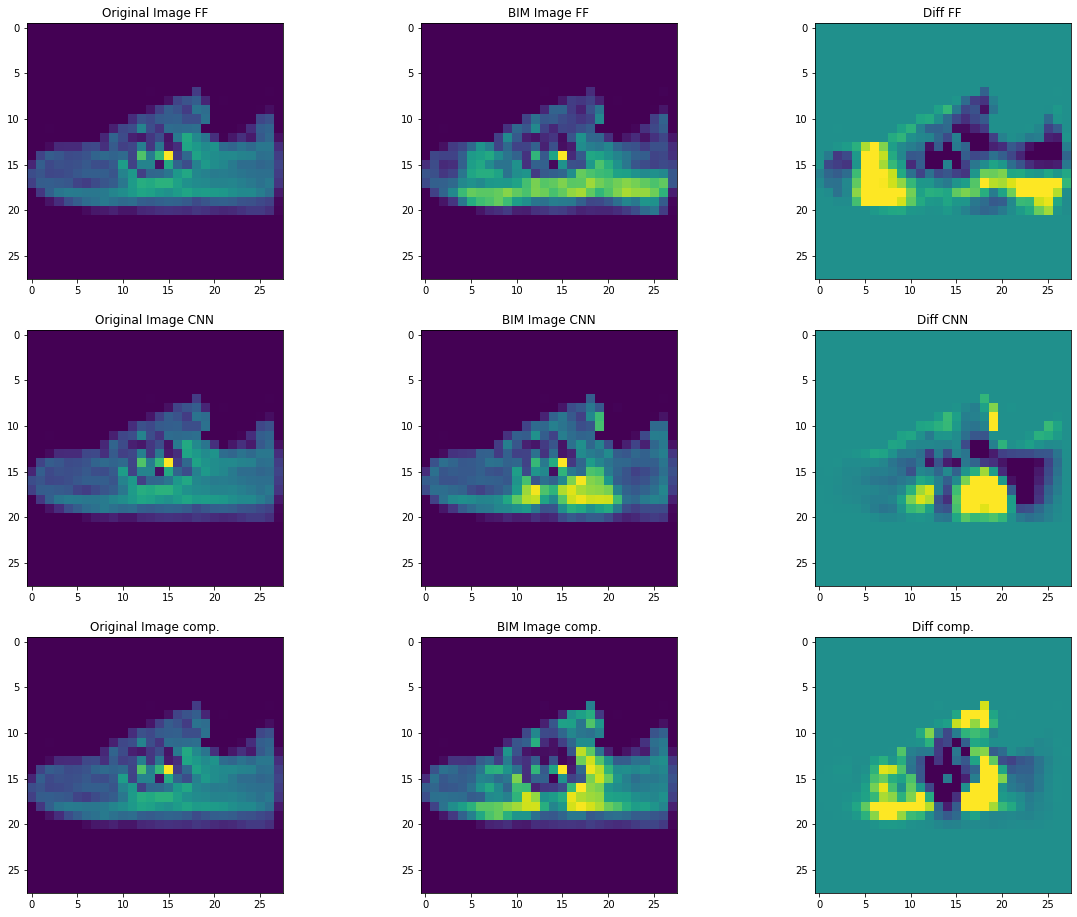

In [ ]:
#@title Visualize BIM { form-width: "20%" }
fig = plt.figure()
print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))

fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(20,16))
print("Epsilon: " + str(delta))

ax[0][0].set_title("Original Image FF")
ax[0][0].imshow(mnist_x["dev"][idx])
ax[0][1].set_title("BIM Image FF")
ax[0][1].imshow(mnist_x_bim_ff[idx])
ax[0][2].set_title("Diff FF")
ax[0][2].imshow(mnist_x_bim_ff[idx]-mnist_x["dev"][idx])

ax[1][0].set_title("Original Image CNN")
ax[1][0].imshow(mnist_x["dev"][idx])
ax[1][1].set_title("BIM Image CNN")
ax[1][1].imshow(mnist_x_bim_cnn[idx])
ax[1][2].set_title("Diff CNN")
ax[1][2].imshow(mnist_x_bim_cnn[idx]-mnist_x["dev"][idx])

ax[2][0].set_title("Original Image comp.")
ax[2][0].imshow(mnist_x["dev"][idx])
ax[2][1].set_title("BIM Image comp.")
ax[2][1].imshow(mnist_x_bim_comp[idx])
ax[2][2].set_title("Diff comp.")
ax[2][2].imshow(mnist_x_bim_comp[idx]-mnist_x["dev"][idx])

mnist_ff_bim_set = ImageDataset(mnist_x_bim_ff,mnist_y["dev"])
mnist_ff_bim_devloader = DataLoader(mnist_ff_bim_set,50,shuffle=True)

mnist_cnn_bim_set = ImageDataset(mnist_x_bim_cnn,mnist_y["dev"])
mnist_cnn_bim_devloader = DataLoader(mnist_cnn_bim_set,50,shuffle=True)

mnist_comp_bim_set = ImageDataset(mnist_x_bim_comp,mnist_y["dev"])
mnist_comp_bim_devloader = DataLoader(mnist_comp_bim_set,50,shuffle=True)

print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')
print(f'FF test accuracy: {test(mnist_ff,mnist_ff_bim_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_bim_testloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_bim_testloader)[0]}')

Baselines - FF: 0.797
FF attacked using FF - test accuracy: 0.298
FF attacked using CNN - test accuracy: 0.7465
FF attacked using comp. - test accuracy: 0.644
Baselines - CNN: 0.4485
CNN attacked using F - test accuracy: 0.396
CNN attacked using CNN - test accuracy: 0.157
CNN attacked using comp. - test accuracy: 0.37
Baselines - Comp.: 0.7465
Comp. attacked using FF - test accuracy: 0.471
Comp. attacked using CNN - test accuracy: 0.6575
Comp. attacked using comp. - test accuracy: 0.4095


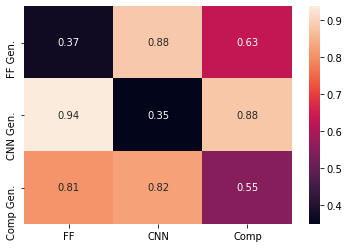

In [ ]:
#@title BIM transfer { form-width: "20%" }

print(f'Baselines - FF: {baseline_ff}')
ff00 = test(mnist_ff,mnist_ff_bim_testloader)[0]
print(f'FF attacked using FF - test accuracy: {ff00}')
ff01 = test(mnist_ff,mnist_cnn_bim_testloader)[0]
print(f'FF attacked using CNN - test accuracy: {ff01}')
ff02 = test(mnist_ff,mnist_comp_bim_testloader)[0]
print(f'FF attacked using comp. - test accuracy: {ff02}')

print(f'Baselines - CNN: {baseline_cnn}')
cnn10 = test(mnist_cnn,mnist_ff_bim_testloader)[0]
print(f'CNN attacked using F - test accuracy: {cnn10}')
cnn11 = test(mnist_cnn,mnist_cnn_bim_testloader)[0]
print(f'CNN attacked using CNN - test accuracy: {cnn11}')
cnn12 = test(mnist_cnn,mnist_comp_bim_testloader)[0]
print(f'CNN attacked using comp. - test accuracy: {cnn12}')

print(f'Baselines - Comp.: {baseline_comp}')
comp20 = test(mnist_comp,mnist_ff_bim_testloader)[0]
print(f'Comp. attacked using FF - test accuracy: {comp20}')
comp21 = test(mnist_comp,mnist_cnn_bim_testloader)[0]
print(f'Comp. attacked using CNN - test accuracy: {comp21}')
comp22 = test(mnist_comp,mnist_comp_bim_testloader)[0]
print(f'Comp. attacked using comp. - test accuracy: {comp22}')

ff_col = [ff00,ff01,ff02]
ff_col = np.array(ff_col) / baseline_ff
cnn_col = [cnn10,cnn11,cnn12]
cnn_col = np.array(cnn_col) / baseline_cnn
comp_col = [comp20,comp21,comp22]
comp_col = np.array(comp_col) / baseline_comp

cross_grad = [ff_col,cnn_col,comp_col]

import pandas as pd

data = {'FF':  [cross_grad[0][0], cross_grad[0][1], cross_grad[0][2]],
        'CNN': [cross_grad[1][0], cross_grad[1][1], cross_grad[1][2]],
        'Comp': [cross_grad[2][0], cross_grad[2][1], cross_grad[2][2]]
        }

cross_grad_df = pd.DataFrame (data, columns = ['FF','CNN', 'Comp'],
                   index=['FF Gen.','CNN Gen.','Comp Gen.'])

sns.heatmap(cross_grad_df,annot=True)



In [ ]:
#@title Combined Gradient Attack { form-width: "20%" }

x_temp = [mnist_x_fgsm_ff,mnist_x_fgsm_cnn,mnist_x_fgsm_comp,
          mnist_x_pgd_ff,mnist_x_pgd_cnn,mnist_x_pgd_comp,
          mnist_x_bim_ff,mnist_x_bim_cnn,mnist_x_bim_comp]
x_temp = np.vstack(x_temp)

y_temp = [mnist_y["dev"],mnist_y["dev"],mnist_y["dev"],
          mnist_y["dev"],mnist_y["dev"],mnist_y["dev"],
          mnist_y["dev"],mnist_y["dev"],mnist_y["dev"]]
y_temp = np.hstack(y_temp)

im_temp = [mnist_x["dev"],mnist_x["dev"],mnist_x["dev"],
           mnist_x["dev"],mnist_x["dev"],mnist_x["dev"],
           mnist_x["dev"],mnist_x["dev"],mnist_x["dev"]]
im_temp = np.vstack(im_temp)

grad_attack_x_devraw = x_temp
grad_attack_im_devraw = im_temp
grad_attack_y_devraw = y_temp

grad_attack_devset = ImageDataset(x_temp,y_temp)
grad_attack_devloader = DataLoader(grad_attack_devset,50,shuffle=True)

grad_attack_im_devset = ImageDataset(x_temp,im_temp)
grad_attack_im_devloader = DataLoader(grad_attack_im_devset,50,shuffle=True)

x_temp = [train_mnist_x_fgsm_ff,train_mnist_x_fgsm_cnn,train_mnist_x_fgsm_comp,
          train_mnist_x_pgd_ff,train_mnist_x_pgd_cnn,train_mnist_x_pgd_comp,
          train_mnist_x_bim_ff,train_mnist_x_bim_cnn,train_mnist_x_bim_comp]
x_temp = np.vstack(x_temp)

y_temp = [mnist_y["train"],mnist_y["train"],mnist_y["train"],
          mnist_y["train"],mnist_y["train"],mnist_y["train"],
          mnist_y["train"],mnist_y["train"],mnist_y["train"]]
y_temp = np.hstack(y_temp)

im_temp = [mnist_x["train"],mnist_x["train"],mnist_x["train"],
           mnist_x["train"],mnist_x["train"],mnist_x["train"],
           mnist_x["train"],mnist_x["train"],mnist_x["train"]]
im_temp = np.vstack(im_temp)

grad_attack_x_train_raw = x_temp
grad_attack_im_train_raw = im_temp
grad_attack_y_train_raw = y_temp

print(grad_attack_x_train_raw.shape)
print(grad_attack_y_train_raw.shape)

grad_attack_trainset = ImageDataset(x_temp,y_temp)
grad_attack_trainloader = DataLoader(grad_attack_trainset,50,shuffle=True)

grad_attack_im_trainset = ImageDataset(x_temp,im_temp)
grad_attack_im_trainloader = DataLoader(grad_attack_im_trainset,50,shuffle=True)

x_temp = [test_mnist_x_fgsm_ff,test_mnist_x_fgsm_cnn,test_mnist_x_fgsm_comp,
          test_mnist_x_pgd_ff,test_mnist_x_pgd_cnn,test_mnist_x_pgd_comp,
          test_mnist_x_bim_ff,test_mnist_x_bim_cnn,test_mnist_x_bim_comp]
x_temp = np.vstack(x_temp)

y_temp = [mnist_y["test"],mnist_y["test"],mnist_y["test"],
          mnist_y["test"],mnist_y["test"],mnist_y["test"],
          mnist_y["test"],mnist_y["test"],mnist_y["test"]]
y_temp = np.hstack(y_temp)

im_temp = [mnist_x["test"],mnist_x["test"],mnist_x["test"],
           mnist_x["test"],mnist_x["test"],mnist_x["test"],
           mnist_x["test"],mnist_x["test"],mnist_x["test"]]
im_temp = np.vstack(im_temp)

grad_attack_x_test_raw = x_temp
grad_attack_im_test_raw = im_temp
grad_attack_y_test_raw = y_temp

print(grad_attack_x_test_raw.shape)
print(grad_attack_y_test_raw.shape)

grad_attack_testset = ImageDataset(x_temp,y_temp)
grad_attack_testloader = DataLoader(grad_attack_testset,50,shuffle=True)

grad_attack_im_testset = ImageDataset(x_temp,im_temp)
grad_attack_im_testloader = DataLoader(grad_attack_im_testset,50,shuffle=True)


print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')
print(f'FF test accuracy: {test(mnist_ff,grad_attack_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,grad_attack_testloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,grad_attack_testloader)[0]}')

(97200, 28, 28)
(97200,)
(18000, 28, 28)
(18000,)
Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.6636666666666666
CNN test accuracy: 0.35788888888888887
Composite test accuracy: 0.6168333333333333


# Image Transform Attacks

In [ ]:
#@title Image Transform Attacks { form-width: "20%" }

from image_transform_attacks import *

In [ ]:
#@title Generate Transforms { form-width: "20%" }

SAVE_PATH = PATH + 'x_rotated' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    x_rotated = np.load(f) 
  SAVE_PATH = PATH + 'y_rotated' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_rotated = np.load(f) 

  SAVE_PATH = PATH + 'x_shifted' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_shifted = np.load(f) 
  SAVE_PATH = PATH + 'y_shifted' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_shifted = np.load(f) 

  SAVE_PATH = PATH + 'x_scaled' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_scaled = np.load(f) 
  SAVE_PATH = PATH + 'y_scaled' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_scaled = np.load(f)

  SAVE_PATH = PATH + 'x_affine' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_affine = np.load(f) 
  SAVE_PATH = PATH + 'y_affine' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_affine = np.load(f)  

  SAVE_PATH = PATH + 'x_brightness' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_brightness = np.load(f) 
  SAVE_PATH = PATH + 'y_brightness' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_brightness = np.load(f) 

  SAVE_PATH = PATH + 'x_blur' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_blur = np.load(f) 
  SAVE_PATH = PATH + 'y_blur' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_blur = np.load(f) 

  SAVE_PATH = PATH + 'x_composite_blur' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_composite_blur = np.load(f) 
  SAVE_PATH = PATH + 'y_composite_blur' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_composite_blur = np.load(f)
    ###########################
  SAVE_PATH = PATH + 'x_train_rotated' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_train_rotated = np.load(f) 
  SAVE_PATH = PATH + 'y_train_rotated' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_train_rotated = np.load(f) 

  SAVE_PATH = PATH + 'x_train_shifted' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_train_shifted = np.load(f) 
  SAVE_PATH = PATH + 'y_train_shifted' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_train_shifted = np.load(f) 

  SAVE_PATH = PATH + 'x_train_scaled' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_train_scaled = np.load(f) 
  SAVE_PATH = PATH + 'y_train_scaled' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_train_scaled = np.load(f)

  SAVE_PATH = PATH + 'x_train_affine' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_train_affine = np.load(f) 
  SAVE_PATH = PATH + 'y_train_affine' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_train_affine = np.load(f)  

  SAVE_PATH = PATH + 'x_train_brightness' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_train_brightness = np.load(f) 
  SAVE_PATH = PATH + 'y_train_brightness' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_train_brightness = np.load(f) 

  SAVE_PATH = PATH + 'x_train_blur' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_train_blur = np.load(f) 
  SAVE_PATH = PATH + 'y_train_blur' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_train_blur = np.load(f) 

  SAVE_PATH = PATH + 'x_train_composite_blur' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_train_composite_blur = np.load(f) 
  SAVE_PATH = PATH + 'y_train_composite_blur' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_train_composite_blur = np.load(f)
else:
  x_rotated, y_rotated = random_rotate(1, mnist_x["dev"],mnist_y["dev"])
  x_shifted, y_shifted = random_shift(1, mnist_x["dev"],mnist_y["dev"])

  x_scaled, y_scaled = random_scale(1, mnist_x["dev"],mnist_y["dev"])
  #x_cropped, y_cropped = random_crop(1, mnist_x["dev"],mnist_y["dev"])

  x_affine, y_affine = random_affine(1, mnist_x["dev"],mnist_y["dev"])
  x_brightness, y_brightness = random_brightness(1, mnist_x["dev"],mnist_y["dev"])

  #x_color, y_color = random_color(1, mnist_x["dev"],mnist_y["dev"])

  x_blur, y_blur = random_blur(1, mnist_x["dev"],mnist_y["dev"])

  #x_composite, y_composite = random_composite(1, mnist_x["dev"],mnist_y["dev"])
  x_composite_blur, y_composite_blur = random_composite_blur(1, mnist_x["dev"],mnist_y["dev"])

  x_train_rotated, y_train_rotated = random_rotate(1, mnist_x["train"],mnist_y["train"])
  x_train_shifted, y_train_shifted = random_shift(1, mnist_x["train"],mnist_y["train"])

  x_train_scaled, y_train_scaled = random_scale(1, mnist_x["train"],mnist_y["train"])

  x_train_affine, y_train_affine = random_affine(1, mnist_x["train"],mnist_y["train"])
  x_train_brightness, y_train_brightness = random_brightness(1, mnist_x["train"],mnist_y["train"])

  x_train_blur, y_train_blur = random_blur(1, mnist_x["train"],mnist_y["train"])

  x_train_composite_blur, y_train_composite_blur = random_composite_blur(1, mnist_x["train"],mnist_y["train"])
  
  with open(PATH + 'x_rotated' + '.npy', 'wb') as f:
    np.save(f, x_rotated)
  with open(PATH + 'y_rotated' + '.npy', 'wb') as f:
    np.save(f, y_rotated)
  with open(PATH + 'x_shifted' + '.npy', 'wb') as f:
    np.save(f, x_shifted)
  with open(PATH + 'y_shifted' + '.npy', 'wb') as f:
    np.save(f, y_shifted)
  with open(PATH + 'x_scaled' + '.npy', 'wb') as f:
    np.save(f, x_scaled)
  with open(PATH + 'y_scaled' + '.npy', 'wb') as f:
    np.save(f, y_scaled)
  with open(PATH + 'x_affine' + '.npy', 'wb') as f:
    np.save(f, x_affine)
  with open(PATH + 'y_affine' + '.npy', 'wb') as f:
    np.save(f, y_affine)
  with open(PATH + 'x_brightness' + '.npy', 'wb') as f:
    np.save(f, x_brightness)
  with open(PATH + 'y_brightness' + '.npy', 'wb') as f:
    np.save(f, y_brightness)
  with open(PATH + 'x_blur' + '.npy', 'wb') as f:
    np.save(f, x_blur)
  with open(PATH + 'y_blur' + '.npy', 'wb') as f:
    np.save(f, y_blur)
  with open(PATH + 'x_composite_blur' + '.npy', 'wb') as f:
    np.save(f, x_composite_blur)
  with open(PATH + 'y_composite_blur' + '.npy', 'wb') as f:
    np.save(f, y_composite_blur)

  with open(PATH + 'x_train_rotated' + '.npy', 'wb') as f:
    np.save(f, x_train_rotated)
  with open(PATH + 'y_train_rotated' + '.npy', 'wb') as f:
    np.save(f, y_train_rotated)
  with open(PATH + 'x_train_shifted' + '.npy', 'wb') as f:
    np.save(f, x_train_shifted)
  with open(PATH + 'y_train_shifted' + '.npy', 'wb') as f:
    np.save(f, y_train_shifted)
  with open(PATH + 'x_train_scaled' + '.npy', 'wb') as f:
    np.save(f, x_train_scaled)
  with open(PATH + 'y_train_scaled' + '.npy', 'wb') as f:
    np.save(f, y_train_scaled)
  with open(PATH + 'x_train_affine' + '.npy', 'wb') as f:
    np.save(f, x_train_affine)
  with open(PATH + 'y_train_affine' + '.npy', 'wb') as f:
    np.save(f, y_train_affine)
  with open(PATH + 'x_train_brightness' + '.npy', 'wb') as f:
    np.save(f, x_train_brightness)
  with open(PATH + 'y_train_brightness' + '.npy', 'wb') as f:
    np.save(f, y_train_brightness)
  with open(PATH + 'x_train_blur' + '.npy', 'wb') as f:
    np.save(f, x_train_blur)
  with open(PATH + 'y_train_blur' + '.npy', 'wb') as f:
    np.save(f, y_train_blur)
  with open(PATH + 'x_train_composite_blur' + '.npy', 'wb') as f:
    np.save(f, x_train_composite_blur)
  with open(PATH + 'y_train_composite_blur' + '.npy', 'wb') as f:
    np.save(f, y_train_composite_blur)


SAVE_PATH = PATH + 'x_test_rotated' + '.npy'
if os.path.isfile(SAVE_PATH):
  SAVE_PATH = PATH + 'x_test_rotated' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_test_rotated = np.load(f) 
  SAVE_PATH = PATH + 'y_test_rotated' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_test_rotated = np.load(f) 

  SAVE_PATH = PATH + 'x_test_shifted' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_test_shifted = np.load(f) 
  SAVE_PATH = PATH + 'y_test_shifted' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_test_shifted = np.load(f) 

  SAVE_PATH = PATH + 'x_test_scaled' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_test_scaled = np.load(f) 
  SAVE_PATH = PATH + 'y_test_scaled' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_test_scaled = np.load(f)

  SAVE_PATH = PATH + 'x_test_affine' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_test_affine = np.load(f) 
  SAVE_PATH = PATH + 'y_test_affine' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_test_affine = np.load(f)  

  SAVE_PATH = PATH + 'x_test_brightness' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_test_brightness = np.load(f) 
  SAVE_PATH = PATH + 'y_test_brightness' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_test_brightness = np.load(f) 

  SAVE_PATH = PATH + 'x_test_blur' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_test_blur = np.load(f) 
  SAVE_PATH = PATH + 'y_test_blur' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_test_blur = np.load(f) 

  SAVE_PATH = PATH + 'x_test_composite_blur' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    x_test_composite_blur = np.load(f) 
  SAVE_PATH = PATH + 'y_test_composite_blur' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    y_test_composite_blur = np.load(f)
else:
  x_test_rotated, y_test_rotated = random_rotate(1, mnist_x["test"],mnist_y["test"])
  x_test_shifted, y_test_shifted = random_shift(1, mnist_x["test"],mnist_y["test"])

  x_test_scaled, y_test_scaled = random_scale(1, mnist_x["test"],mnist_y["test"])

  x_test_affine, y_test_affine = random_affine(1, mnist_x["test"],mnist_y["test"])
  x_test_brightness, y_test_brightness = random_brightness(1, mnist_x["test"],mnist_y["test"])

  x_test_blur, y_test_blur = random_blur(1, mnist_x["test"],mnist_y["test"])

  x_test_composite_blur, y_test_composite_blur = random_composite_blur(1, mnist_x["test"],mnist_y["test"])

  with open(PATH + 'x_test_rotated' + '.npy', 'wb') as f:
    np.save(f, x_test_rotated)
  with open(PATH + 'y_test_rotated' + '.npy', 'wb') as f:
    np.save(f, y_test_rotated)
  with open(PATH + 'x_test_shifted' + '.npy', 'wb') as f:
    np.save(f, x_test_shifted)
  with open(PATH + 'y_test_shifted' + '.npy', 'wb') as f:
    np.save(f, y_test_shifted)
  with open(PATH + 'x_test_scaled' + '.npy', 'wb') as f:
    np.save(f, x_test_scaled)
  with open(PATH + 'y_test_scaled' + '.npy', 'wb') as f:
    np.save(f, y_test_scaled)
  with open(PATH + 'x_test_affine' + '.npy', 'wb') as f:
    np.save(f, x_test_affine)
  with open(PATH + 'y_test_affine' + '.npy', 'wb') as f:
    np.save(f, y_test_affine)
  with open(PATH + 'x_test_brightness' + '.npy', 'wb') as f:
    np.save(f, x_test_brightness)
  with open(PATH + 'y_test_brightness' + '.npy', 'wb') as f:
    np.save(f, y_test_brightness)
  with open(PATH + 'x_test_blur' + '.npy', 'wb') as f:
    np.save(f, x_test_blur)
  with open(PATH + 'y_test_blur' + '.npy', 'wb') as f:
    np.save(f, y_test_blur)
  with open(PATH + 'x_test_composite_blur' + '.npy', 'wb') as f:
    np.save(f, x_test_composite_blur)
  with open(PATH + 'y_test_composite_blur' + '.npy', 'wb') as f:
    np.save(f, y_test_composite_blur)

(1200, 28, 28)
(1200,)
7
sneaker: 7
0.41176468
0.23381394


<Figure size 432x288 with 0 Axes>

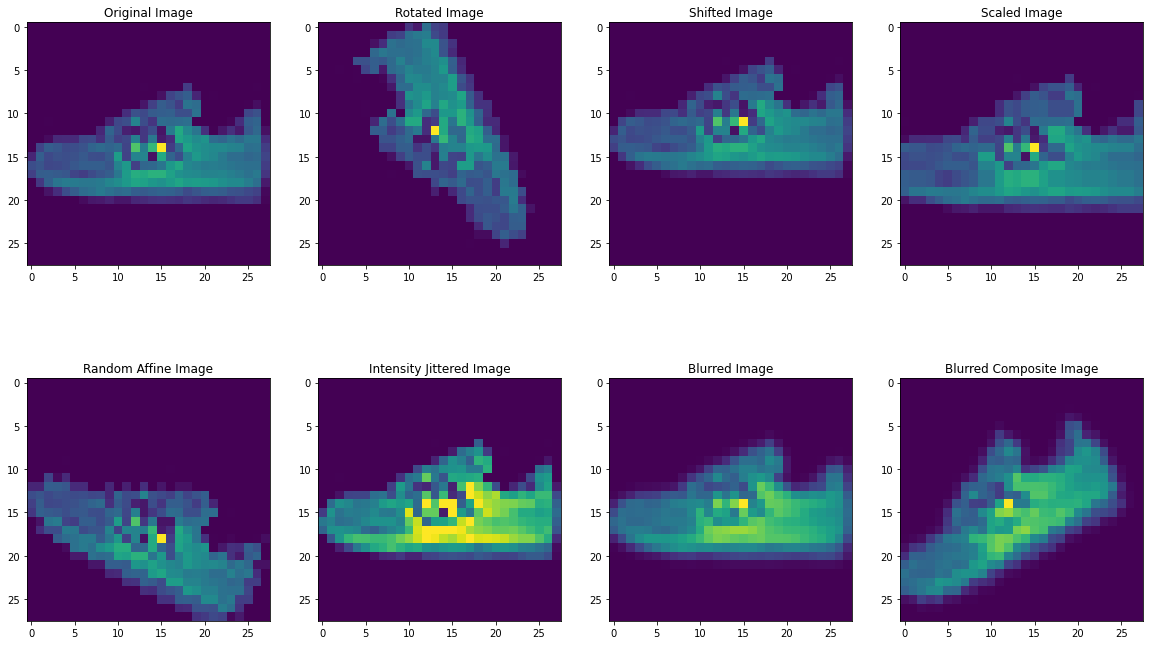

In [ ]:
#@title Visualize { form-width: "20%" }

idx = 41

print(x_rotated.shape)
print(y_rotated.shape)

print(y_rotated[idx])

fig = plt.figure()
print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))

fig,ax = plt.subplots(nrows=2,ncols=4,figsize=(20,12))

ax[0][0].set_title("Original Image")
ax[0][0].imshow(mnist_x["dev"][idx])

ax[0][1].set_title("Rotated Image")
ax[0][1].imshow(x_rotated[idx])

ax[0][2].set_title("Shifted Image")
ax[0][2].imshow(x_shifted[idx])

ax[0][3].set_title("Scaled Image")
ax[0][3].imshow(x_scaled[idx])

#ax[0][4].set_title("Cropped Image")
#ax[0][4].imshow(x_cropped[idx])

ax[1][0].set_title("Random Affine Image")
ax[1][0].imshow(x_affine[idx])

ax[1][1].set_title("Intensity Jittered Image")
ax[1][1].imshow(x_brightness[idx])
print(np.max(x_brightness[idx] - mnist_x["dev"][idx]))

#ax[1][1].set_title("Color Jitter Image")
#ax[1][1].imshow(x_color[idx])
#print(np.max(x_color[idx] - mnist_x["dev"][idx]))

ax[1][2].set_title("Blurred Image")
ax[1][2].imshow(x_blur[idx])
print(np.max(x_blur[idx] - mnist_x["dev"][idx]))

#ax[1][3].set_title("Composite Attack Image")
#ax[1][3].imshow(x_composite[idx])

ax[1][3].set_title("Blurred Composite Image")
ax[1][3].imshow(x_composite_blur[idx])



In [ ]:
#@title Make Full Transform Attack Set { form-width: "20%" }
transform_attack_x_devraw = [x_rotated, x_shifted, x_scaled, x_affine,
                      x_brightness, x_blur, x_composite_blur]
transform_attack_x_devraw = np.vstack(transform_attack_x_devraw)
print(transform_attack_x_devraw.shape)

transform_attack_y_devraw = [y_rotated, y_shifted, y_scaled, y_affine,
                      y_brightness, y_blur, y_composite_blur]
transform_attack_y_devraw = np.hstack(transform_attack_y_devraw)
print(transform_attack_y_devraw.shape)

transform_attack_im_devraw = [mnist_x["dev"], mnist_x["dev"], mnist_x["dev"], mnist_x["dev"],
                         mnist_x["dev"], mnist_x["dev"], mnist_x["dev"]]
transform_attack_im_devraw = np.vstack(transform_attack_im_devraw)
print(transform_attack_im_devraw.shape)

transform_attack_devset = ImageDataset(transform_attack_x_devraw,transform_attack_y_devraw)
transform_attack_devloader = DataLoader(transform_attack_devset,50,shuffle=True)

transform_attack_im_devset = ImageDataset(transform_attack_x_devraw,transform_attack_im_devraw)
transform_attack_im_devloader = DataLoader(transform_attack_im_devset,50,shuffle=True)



transform_attack_x_train_raw = [x_train_rotated, x_train_shifted, x_train_scaled, 
                             x_train_affine, x_train_brightness, x_train_blur, 
                             x_train_composite_blur]
transform_attack_x_train_raw = np.vstack(transform_attack_x_train_raw)
print(transform_attack_x_train_raw.shape)

transform_attack_y_train_raw = [y_train_rotated, y_train_shifted, y_train_scaled,
                               y_train_affine, y_train_brightness, y_train_blur,
                               y_train_composite_blur]
transform_attack_y_train_raw = np.hstack(transform_attack_y_train_raw)
print(transform_attack_y_train_raw.shape)

transform_attack_im_train_raw = [mnist_x["train"], mnist_x["train"], mnist_x["train"], 
                              mnist_x["train"], mnist_x["train"], mnist_x["train"], 
                              mnist_x["train"]]
transform_attack_im_train_raw = np.vstack(transform_attack_im_train_raw)
print(transform_attack_im_train_raw.shape)

transform_attack_trainset = ImageDataset(transform_attack_x_train_raw,transform_attack_y_train_raw)
transform_attack_trainloader = DataLoader(transform_attack_trainset,50,shuffle=True)

transform_attack_im_trainset = ImageDataset(transform_attack_x_train_raw,transform_attack_im_train_raw)
transform_attack_im_trainloader = DataLoader(transform_attack_im_trainset,50,shuffle=True)


transform_attack_x_test_raw = [x_test_rotated, x_test_shifted, x_test_scaled, 
                             x_test_affine, x_test_brightness, x_test_blur, 
                             x_test_composite_blur]
transform_attack_x_test_raw = np.vstack(transform_attack_x_test_raw)
print(transform_attack_x_test_raw.shape)

transform_attack_y_test_raw = [y_test_rotated, y_test_shifted, y_test_scaled,
                               y_test_affine, y_test_brightness, y_test_blur,
                               y_test_composite_blur]
transform_attack_y_test_raw = np.hstack(transform_attack_y_test_raw)
print(transform_attack_y_test_raw.shape)

transform_attack_im_test_raw = [mnist_x["test"], mnist_x["test"], mnist_x["test"], 
                              mnist_x["test"], mnist_x["test"], mnist_x["test"], 
                              mnist_x["test"]]
transform_attack_im_test_raw = np.vstack(transform_attack_im_test_raw)
print(transform_attack_im_test_raw.shape)

transform_attack_testset = ImageDataset(transform_attack_x_test_raw,transform_attack_y_test_raw)
transform_attack_testloader = DataLoader(transform_attack_testset,50,shuffle=True)

transform_attack_im_testset = ImageDataset(transform_attack_x_test_raw,transform_attack_im_test_raw)
transform_attack_im_testloader = DataLoader(transform_attack_im_testset,50,shuffle=True)

(8400, 28, 28)
(8400,)
(8400, 28, 28)
(75600, 28, 28)
(75600,)
(75600, 28, 28)
(14000, 28, 28)
(14000,)
(14000, 28, 28)


In [ ]:
#@title
print(f'FF test accuracy: {test(mnist_ff,transform_attack_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,transform_attack_testloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,transform_attack_testloader)[0]}')

FF test accuracy: 0.5247142857142857
CNN test accuracy: 0.3387142857142857
Composite test accuracy: 0.5611428571428572


# Adversary Detector - Todo: Concatenate all adversaries into a data set with labels based on "not adversary", "gradient", "random", "rotate", "crop", etc.

# Adversary classes: "Not an Adversary", "Gradient", "Random", "Rotate", "Shift", "Crop", "scale", "affine", "brightness", "Blur", "composite/composite_blur"

In [ ]:
#@title Form the Adversary Class set { form-width: "20%" }
# Copy, shuffle, and sample

from adversary_detector import *

# Clean Dev data
temp_x = mnist_x["dev"]
temp_y = np.zeros_like(mnist_y["dev"])

# Random Rotates
temp_x, temp_y = cosham(x=x_rotated,y=y_rotated,target=0,
                        frac_size=1,dest_x=temp_x,dest_y=temp_y)
# Random Shifts
temp_x, temp_y = cosham(x=x_shifted,y=y_shifted,target=0,
                        frac_size=1,dest_x=temp_x,dest_y=temp_y)
# Random Crops
# temp_x, temp_y = cosham(x=x_cropped,y=y_cropped,target=0,
#                         frac_size=1,dest_x=temp_x,dest_y=temp_y)
# Random Scale
temp_x, temp_y = cosham(x=x_scaled,y=y_scaled,target=0,
                        frac_size=1,dest_x=temp_x,dest_y=temp_y)
# Random Affine
temp_x, temp_y = cosham(x=x_affine,y=y_affine,target=0,
                        frac_size=1,dest_x=temp_x,dest_y=temp_y)
# Random Brightness
temp_x, temp_y = cosham(x=x_brightness,y=y_brightness,target=0,
                        frac_size=1,dest_x=temp_x,dest_y=temp_y)
# Random Blur
temp_x, temp_y = cosham(x=x_blur,y=y_blur,target=0,
                        frac_size=1,dest_x=temp_x,dest_y=temp_y)

# Random Composite Transforms, both w & w/o blur
# temp_x, temp_y = cosham(x=x_composite,y=y_composite,target=0,
#                         frac_size=1/2,dest_x=temp_x,dest_y=temp_y)
temp_x, temp_y = cosham(x=x_composite_blur,y=y_composite_blur,target=0,
                        frac_size=1/2,dest_x=temp_x,dest_y=temp_y)

# Downsample non-adversarial examples to balance classes
down_ind = int(np.floor(0.15 * (temp_x.shape)[0]))
down_index_all = np.arange(down_ind)
rn.shuffle(down_index_all)
temp_x = temp_x[down_index_all]
temp_y = temp_y[down_index_all]

# Gradient Attacks
temp_x, temp_y = cosham(x=mnist_x_fgsm_ff,y=mnist_y["dev"],target=1,
                        frac_size=(1/9),dest_x=temp_x,dest_y=temp_y)
temp_x, temp_y = cosham(x=mnist_x_fgsm_cnn,y=mnist_y["dev"],target=1,
                        frac_size=(1/9),dest_x=temp_x,dest_y=temp_y)
temp_x, temp_y = cosham(x=mnist_x_fgsm_comp,y=mnist_y["dev"],target=1,
                        frac_size=(1/9),dest_x=temp_x,dest_y=temp_y)
temp_x, temp_y = cosham(x=mnist_x_pgd_ff,y=mnist_y["dev"],target=1,
                        frac_size=(1/9),dest_x=temp_x,dest_y=temp_y)
temp_x, temp_y = cosham(x=mnist_x_pgd_cnn,y=mnist_y["dev"],target=1,
                        frac_size=(1/9),dest_x=temp_x,dest_y=temp_y)
temp_x, temp_y = cosham(x=mnist_x_pgd_comp,y=mnist_y["dev"],target=1,
                        frac_size=(1/9),dest_x=temp_x,dest_y=temp_y)
temp_x, temp_y = cosham(x=mnist_x_bim_ff,y=mnist_y["dev"],target=1,
                        frac_size=(1/9),dest_x=temp_x,dest_y=temp_y)
temp_x, temp_y = cosham(x=mnist_x_bim_cnn,y=mnist_y["dev"],target=1,
                        frac_size=(1/9),dest_x=temp_x,dest_y=temp_y)
temp_x, temp_y = cosham(x=mnist_x_bim_comp,y=mnist_y["dev"],target=1,
                        frac_size=(1/9),dest_x=temp_x,dest_y=temp_y)
# Random Attacks
temp_x, temp_y = cosham(x=mnist_x_rp,y=mnist_y["dev"],target=2,
                        frac_size=1/2,dest_x=temp_x,dest_y=temp_y)
temp_x, temp_y = cosham(x=mnist_x_simba_ff,y=mnist_y["dev"],target=2,
                        frac_size=1/6,dest_x=temp_x,dest_y=temp_y)
temp_x, temp_y = cosham(x=mnist_x_simba_cnn,y=mnist_y["dev"],target=2,
                        frac_size=1/6,dest_x=temp_x,dest_y=temp_y)
temp_x, temp_y = cosham(x=mnist_x_simba_comp,y=mnist_y["dev"],target=2,
                        frac_size=1/6,dest_x=temp_x,dest_y=temp_y)

# Random Blur
temp_x, temp_y = cosham(x=x_blur,y=y_blur,target=3,
                        frac_size=1,dest_x=temp_x,dest_y=temp_y)

# Size dev_set here v
dev_ind = int(np.floor(0.2 * (temp_x.shape)[0]))
index_all = np.arange((temp_x.shape)[0])
rn.shuffle(index_all)
dev_temp_x = temp_x[index_all[0:dev_ind]]
dev_temp_y = temp_y[index_all[0:dev_ind]]
train_temp_x = temp_x[index_all[dev_ind:]]
train_temp_y = temp_y[index_all[dev_ind:]]

adversary_x_raw = temp_x
adversary_y_raw = temp_y

mnist_adversary_trainset = ImageDataset(train_temp_x,train_temp_y)
mnist_adversary_trainloader = DataLoader(mnist_adversary_trainset,50,shuffle=True)

mnist_adversary_devset = ImageDataset(dev_temp_x,dev_temp_y)
mnist_adversary_devloader = DataLoader(mnist_adversary_devset,50,shuffle=True)


In [ ]:
#@title Train detector net { form-width: "20%" }
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#detector = detector(up1=4,out_dim=11,chan1=200,chan2=128,chan3=64,chan4=32,
#                    chan5=16,k1=13,k2=9,k3=5,k4=3,k5=3,h6=256,h7=128,h8=70,
#                    p23=4,p34=2,color=1)
detector = composite(up1=4,out_dim=4,chan1=40,chan2=28,chan3=12,k1=11,k2=7,k3=3,
                     h4=128,h5=64,p12=2,p23=2,color=1)
detector.to(device)
# optimizer = torch.optim.Adam(detector.parameters(),lr=0.00001,weight_decay=1e-5)
# train(detector,optimizer,mnist_adversary_trainloader,"detector",epoch=20)
optimizer = torch.optim.Adam(detector.parameters(),lr=0.0005,weight_decay=1e-4)

SAVE_PATH = PATH + 'detector.pth'
if os.path.isfile(SAVE_PATH):
  detector.load_state_dict(torch.load(SAVE_PATH))
else:
  train(detector,optimizer,mnist_adversary_trainloader,"detector",epoch=70)

print(test(detector,mnist_adversary_devloader))
test_by_class(detector, mnist_adversary_devloader)


(0.8938321536905965, 0.0)
Predicted labels: [293, 178, 269, 249]
Correct labels: [243, 242, 256, 248]
Precision by class: [0.7542662116040956, 0.9213483146067416, 0.9330855018587361, 0.9959839357429718]
Recall by class: [0.9094650205761317, 0.6776859504132231, 0.98046875, 1.0]


# Denoiser - Todo: Each class of adverary needs a denoiser

In [ ]:
#@title Make Trainloader for each adversary class { form-width: "20%" }
# Copy, shuffle, and sample

#####################################################################
temp_x = x_train_rotated
temp_y = mnist_x["train"]

rotate_trainset = ImageDataset(temp_x,temp_y)
rotate_trainloader = DataLoader(rotate_trainset,50,shuffle=True)
#####################################################################
temp_x = x_train_shifted
temp_y = mnist_x["train"]

shift_trainset = ImageDataset(temp_x,temp_y)
shift_trainloader = DataLoader(shift_trainset,50,shuffle=True)
#####################################################################
#temp_x = x_train_cropped
#temp_y = mnist_x["train"]

#crop_trainset = ImageDataset(temp_x,temp_y)
#crop_trainloader = DataLoader(crop_trainset,50,shuffle=True)
#####################################################################
temp_x = x_train_scaled
temp_y = mnist_x["train"]

scale_trainset = ImageDataset(temp_x,temp_y)
scale_trainloader = DataLoader(scale_trainset,50,shuffle=True)
#####################################################################
temp_x = x_train_affine
temp_y = mnist_x["train"]

affine_trainset = ImageDataset(temp_x,temp_y)
affine_trainloader = DataLoader(affine_trainset,50,shuffle=True)
#####################################################################
temp_x = x_train_brightness
temp_y = mnist_x["train"]

brightness_trainset = ImageDataset(temp_x,temp_y)
brightness_trainloader = DataLoader(brightness_trainset,50,shuffle=True)

#####################################################################
temp_x = x_train_blur
temp_y = mnist_x["train"]

blur_trainset = ImageDataset(temp_x,temp_y)
blur_trainloader = DataLoader(blur_trainset,50,shuffle=True)
#####################################################################
temp_x = x_train_composite_blur
#temp_x = np.append(temp_x,x_train_composite_blur,axis=0)

temp_y = mnist_x["train"]
#temp_y = np.append(temp_y,mnist_x["train"],axis=0)

composite_blur_trainset = ImageDataset(temp_x,temp_y)
composite_blur_trainloader = DataLoader(composite_blur_trainset,50,shuffle=True)
#####################################################################
temp_x = x_rotated
temp_y = mnist_x["dev"]

rotate_devset = ImageDataset(temp_x,temp_y)
rotate_devloader = DataLoader(rotate_devset,50,shuffle=True)
#####################################################################
temp_x = x_shifted
temp_y = mnist_x["dev"]

shift_devset = ImageDataset(temp_x,temp_y)
shift_devloader = DataLoader(shift_devset,50,shuffle=True)
#####################################################################
#temp_x = x_cropped
#temp_y = mnist_x["dev"]

#crop_devset = ImageDataset(temp_x,temp_y)
#crop_devloader = DataLoader(crop_devset,50,shuffle=True)
#####################################################################
temp_x = x_scaled
temp_y = mnist_x["dev"]

scale_devset = ImageDataset(temp_x,temp_y)
scale_devloader = DataLoader(scale_devset,50,shuffle=True)
#####################################################################
temp_x = x_affine
temp_y = mnist_x["dev"]

affine_devset = ImageDataset(temp_x,temp_y)
affine_devloader = DataLoader(affine_devset,50,shuffle=True)
#####################################################################
temp_x = x_brightness
temp_y = mnist_x["dev"]

brightness_devset = ImageDataset(temp_x,temp_y)
brightness_devloader = DataLoader(brightness_devset,50,shuffle=True)

#####################################################################
temp_x = x_blur
temp_y = mnist_x["dev"]

blur_devset = ImageDataset(temp_x,temp_y)
blur_devloader = DataLoader(blur_devset,50,shuffle=True)
#####################################################################
temp_x = x_composite_blur
#temp_x = np.append(temp_x,x_composite_blur,axis=0)

temp_y = mnist_x["dev"]
#temp_y = np.append(temp_y,mnist_x["dev"],axis=0)

composite_blur_devset = ImageDataset(temp_x,temp_y)
composite_blur_devloader = DataLoader(composite_blur_devset,50,shuffle=True)
#####################################################################
temp_x = x_test_rotated
temp_y = mnist_x["test"]

rotate_testset = ImageDataset(temp_x,temp_y)
rotate_testloader = DataLoader(rotate_testset,50,shuffle=True)
#####################################################################
temp_x = x_test_shifted
temp_y = mnist_x["test"]

shift_testset = ImageDataset(temp_x,temp_y)
shift_testloader = DataLoader(shift_testset,50,shuffle=True)
#####################################################################
#temp_x = x_cropped
#temp_y = mnist_x["dev"]

#crop_devset = ImageDataset(temp_x,temp_y)
#crop_devloader = DataLoader(crop_devset,50,shuffle=True)
#####################################################################
temp_x = x_test_scaled
temp_y = mnist_x["test"]

scale_testset = ImageDataset(temp_x,temp_y)
scale_testloader = DataLoader(scale_testset,50,shuffle=True)
#####################################################################
temp_x = x_test_affine
temp_y = mnist_x["test"]

affine_testset = ImageDataset(temp_x,temp_y)
affine_testloader = DataLoader(affine_testset,50,shuffle=True)
#####################################################################
temp_x = x_test_brightness
temp_y = mnist_x["test"]

brightness_testset = ImageDataset(temp_x,temp_y)
brightness_testloader = DataLoader(brightness_testset,50,shuffle=True)

#####################################################################
temp_x = x_test_blur
temp_y = mnist_x["test"]

blur_testset = ImageDataset(temp_x,temp_y)
blur_testloader = DataLoader(blur_testset,50,shuffle=True)
#####################################################################
temp_x = x_test_composite_blur
#temp_x = np.append(temp_x,train_x_composite_blur,axis=0)

temp_y = mnist_x["test"]
#temp_y = np.append(temp_y,mnist_x["train"],axis=0)

composite_blur_testset = ImageDataset(temp_x,temp_y)
composite_blur_testloader = DataLoader(composite_blur_testset,50,shuffle=True)


In [ ]:
#@title Define Auto-encoder { form-width: "20%" }
# https://www.bloggerdrive.com/pytorch-tutorial-understanding-and-implimanting-autoencoders/
# https://analyticsindiamag.com/how-to-implement-convolutional-autoencoder-in-pytorch-with-cuda/

from denoiser import *

In [ ]:
#@title EDSR { form-width: "20%" }

#B. Lim, S. Son, H. Kim, S. Nah, and K. M. Lee, 
#“Enhanced Deep Residual Networks for Single Image Super-Resolution,” 
#arXiv:1707.02921 [cs], Jul. 2017, Accessed: Nov. 29, 2020. [Online]. 
#Available: https://arxiv.org/abs/1707.02921.

def default_conv(in_channels, out_channels, kernel_size, bias=True):
    return nn.Conv2d(
        in_channels, out_channels, kernel_size,
        padding=(kernel_size//2), bias=bias)

class MeanShift(nn.Conv2d):
    def __init__(
        self, rgb_range,
        rgb_mean=(0.5,), rgb_std=(1.0,), sign=-1):

        super(MeanShift, self).__init__(3, 3, kernel_size=1)
        std = torch.Tensor(rgb_std)
        self.weight.data = torch.eye(1).view(1, 1, 1, 1) / std.view(1, 1, 1, 1)
        self.bias.data = sign * rgb_range * torch.Tensor(rgb_mean) / std
        for p in self.parameters():
            p.requires_grad = False

class BasicBlock(nn.Sequential):
    def __init__(
        self, conv, in_channels, out_channels, kernel_size, stride=1, bias=False,
        bn=True, act=nn.ReLU(True)):

        m = [conv(in_channels, out_channels, kernel_size, bias=bias)]
        if bn:
            m.append(nn.BatchNorm2d(out_channels))
        if act is not None:
            m.append(act)

        super(BasicBlock, self).__init__(*m)

class ResBlock(nn.Module):
    def __init__(
        self, conv, n_feats, kernel_size,
        bias=True, bn=False, act=nn.ReLU(True), res_scale=1):

        super(ResBlock, self).__init__()
        m = []
        for i in range(2):
            m.append(conv(n_feats, n_feats, kernel_size, bias=bias))
            if bn:
                m.append(nn.BatchNorm2d(n_feats))
            if i == 0:
                m.append(act)

        self.body = nn.Sequential(*m)
        self.res_scale = res_scale

    def forward(self, x):
        res = self.body(x).mul(self.res_scale)
        res += x

        return res

class Upsampler(nn.Sequential):
    def __init__(self, conv, scale, n_feats, bn=False, act=False, bias=True):

        m = []
        if scale == 1:
            m.append(conv(n_feats, n_feats, 3, bias))
            if bn:
                m.append(nn.BatchNorm2d(n_feats))
            if act == 'relu':
                m.append(nn.ReLU(True))
            elif act == 'prelu':
                m.append(nn.PReLU(n_feats))

        if (scale & (scale - 1)) == 0:    # Is scale = 2^n?
            for _ in range(int(math.log(scale, 2))):
                m.append(conv(n_feats, 4 * n_feats, 3, bias))
                m.append(nn.PixelShuffle(2))
                if bn:
                    m.append(nn.BatchNorm2d(n_feats))
                if act == 'relu':
                    m.append(nn.ReLU(True))
                elif act == 'prelu':
                    m.append(nn.PReLU(n_feats))

        elif scale == 3:
            m.append(conv(n_feats, 9 * n_feats, 3, bias))
            m.append(nn.PixelShuffle(3))
            if bn:
                m.append(nn.BatchNorm2d(n_feats))
            if act == 'relu':
                m.append(nn.ReLU(True))
            elif act == 'prelu':
                m.append(nn.PReLU(n_feats))
        else:
            raise NotImplementedError

        super(Upsampler, self).__init__(*m)

class EDSR(nn.Module):
    def __init__(self, scale=2, conv=default_conv, n_resblocks=2):
        super(EDSR, self).__init__()

        n_feats = 64
        kernel_size = 3 
        act = nn.ReLU(True)
        rgb_range = 1
        res_scale = 1
        n_colors = 1
        # self.url = url['r{}f{}x{}'.format(n_resblocks, n_feats, scale)]
        self.sub_mean = MeanShift(rgb_range)
        self.add_mean = MeanShift(rgb_range, sign=1)

        # define head module
        m_head = [conv(n_colors, n_feats, kernel_size)]

        # define body module
        m_body = [
            ResBlock(
                conv, n_feats, kernel_size, act=act, res_scale=res_scale
            ) for _ in range(n_resblocks)
        ]
        m_body.append(conv(n_feats, n_feats, kernel_size))

        # define tail module
        m_tail = [
            Upsampler(conv, scale, n_feats, act=False),
            conv(n_feats, n_colors, kernel_size)
        ]

        self.head = nn.Sequential(*m_head)
        self.body = nn.Sequential(*m_body)
        self.tail = nn.Sequential(*m_tail)

    def forward(self, x):
        x = self.sub_mean(x)
        x = self.head(x)

        res = self.body(x)
        res += x

        x = self.tail(res)
        x = self.add_mean(x)
        x = torch.sigmoid(x)
        return x 


In [ ]:
#@title UNET, bad
'''
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#grad_denoiser = denoiser(up1=8,out_dim=None,chan1=32,chan2=16,chan3=8,
#                     k1=5,k2=5,k3=3,p12=2,ped=2,color=1,pad1=1,pad2=1,pad3=1,
#                     rk1=3,rk2=3,rk3=5,stride1=2,stride2=2,stride3=2)
grad_denoiser = denoiser(up1=3, color=1, useBN=True)
grad_denoiser.to(device)
#optimizer = torch.optim.Adam(grad_denoiser.parameters(), lr=0.00001,weight_decay=1e-5)
optimizer = torch.optim.Rprop(grad_denoiser.parameters(),lr=0.00001)
criterion = nn.MSELoss()
train(grad_denoiser,optimizer,grad_trainloader,"grad_denoiser",epoch=10,loss_fcn=criterion)
'''

'\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n\n#grad_denoiser = denoiser(up1=8,out_dim=None,chan1=32,chan2=16,chan3=8,\n#                     k1=5,k2=5,k3=3,p12=2,ped=2,color=1,pad1=1,pad2=1,pad3=1,\n#                     rk1=3,rk2=3,rk3=5,stride1=2,stride2=2,stride3=2)\ngrad_denoiser = denoiser(up1=3, color=1, useBN=True)\ngrad_denoiser.to(device)\n#optimizer = torch.optim.Adam(grad_denoiser.parameters(), lr=0.00001,weight_decay=1e-5)\noptimizer = torch.optim.Rprop(grad_denoiser.parameters(),lr=0.00001)\ncriterion = nn.MSELoss()\ntrain(grad_denoiser,optimizer,grad_trainloader,"grad_denoiser",epoch=10,loss_fcn=criterion)\n'

In [ ]:
#@title Just Conv, bad
'''
grad_denoiser2 = denoiser2(up1=2,color=1)
grad_denoiser2.to(device)
optimizer = torch.optim.Adam(grad_denoiser2.parameters(), lr=0.00001, weight_decay=1e-5)
criterion = nn.MSELoss()
train(grad_denoiser2,optimizer,grad_trainloader,"grad_denoiser2",epoch=10,loss_fcn=criterion)
'''

'\ngrad_denoiser2 = denoiser2(up1=2,color=1)\ngrad_denoiser2.to(device)\noptimizer = torch.optim.Adam(grad_denoiser2.parameters(), lr=0.00001, weight_decay=1e-5)\ncriterion = nn.MSELoss()\ntrain(grad_denoiser2,optimizer,grad_trainloader,"grad_denoiser2",epoch=10,loss_fcn=criterion)\n'

In [ ]:
#@title conv and transpose conv. { form-width: "20%" }
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

grad_denoiser_conv = ConvAutoencoder()
grad_denoiser_conv.to(device)
optimizer = torch.optim.Rprop(grad_denoiser_conv.parameters(),lr=0.00000001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'grad_denoiser_conv.pth'
if os.path.isfile(SAVE_PATH):
  grad_denoiser_conv.load_state_dict(torch.load(SAVE_PATH))
else:
  train(grad_denoiser_conv,optimizer,grad_attack_im_trainloader,
        "grad_denoiser_conv",epoch=10,loss_fcn=criterion,clip=True,
        plot=True,devloader=grad_attack_im_devloader)


In [ ]:
#@title EDSR Denoiser Best so far { form-width: "20%" }
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

grad_denoiser_edsr = EDSR(scale=1)
grad_denoiser_edsr.to(device)
optimizer = torch.optim.Rprop(grad_denoiser_edsr.parameters(), lr=0.000000001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'grad_denoiser_edsr.pth'
if os.path.isfile(SAVE_PATH):
  grad_denoiser_edsr.load_state_dict(torch.load(SAVE_PATH))
else:
  train(grad_denoiser_edsr,optimizer,grad_attack_im_trainloader,"grad_denoiser_edsr",
        epoch=10,loss_fcn=criterion,clip=True,plot=True,
        devloader=grad_attack_im_devloader)


sneaker: 7
1.0
0.985
0.51195306
0.88348806
0.046811834


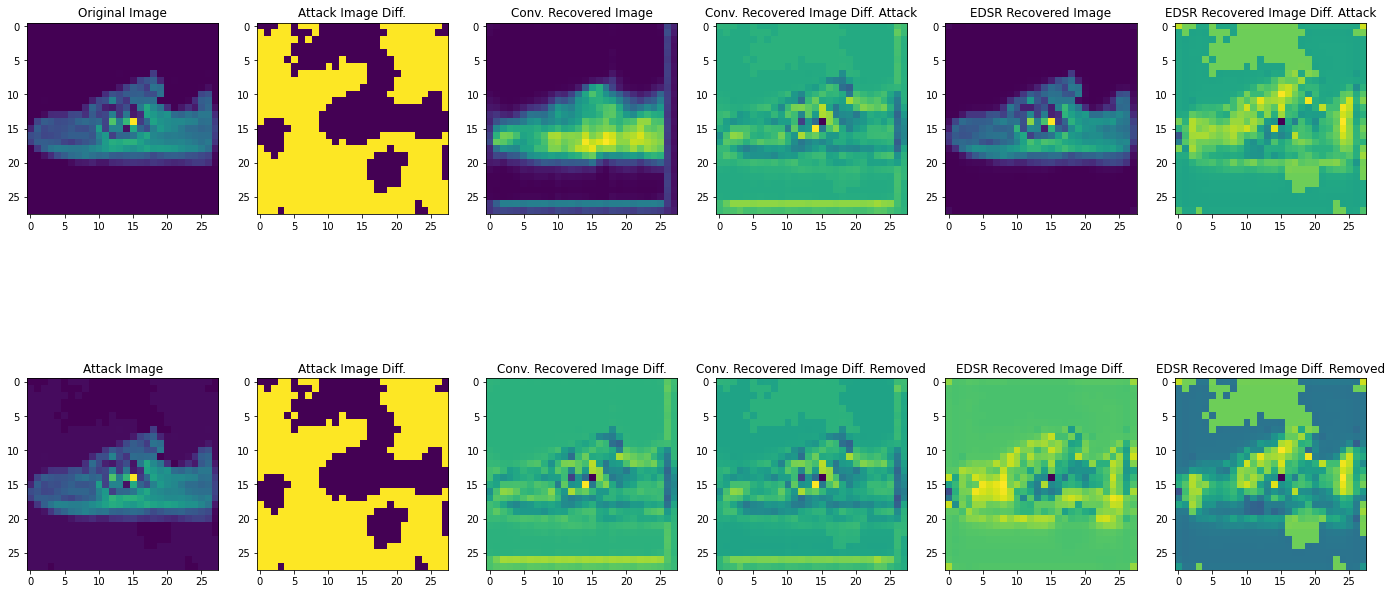

In [ ]:
#@title Plot a Few examples { form-width: "20%" }

idx = 41

print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))
fig,ax = plt.subplots(nrows=2,ncols=6,figsize=(24,12))

ax[0][0].set_title("Original Image")
ax[0][0].imshow((grad_attack_im_devset.label[idx]))
print(np.max(grad_attack_im_devset.label[idx]))

ax[1][0].set_title("Attack Image")
ax[1][0].imshow((grad_attack_im_devset.data[idx]))
print(np.max(grad_attack_im_devset.data[idx]))

example = torch.from_numpy(grad_attack_im_devset.data[idx])
example = torch.unsqueeze(example,0)
example = torch.unsqueeze(example,0)

ax[0][1].set_title("Attack Image Diff.")
ax[0][1].imshow(grad_attack_im_devset.data[idx]- grad_attack_im_devset.label[idx])

ax[1][1].set_title("Attack Image Diff.")
ax[1][1].imshow(grad_attack_im_devset.data[idx]- grad_attack_im_devset.label[idx])

ax[0][2].set_title("Conv. Recovered Image")
temp = grad_denoiser_conv(example.to(device))
temp = temp.to("cpu")
temp = torch.squeeze(temp)
temp = temp.detach().numpy()
ax[0][2].imshow(temp)
print(np.max(temp))

ax[1][2].set_title("Conv. Recovered Image Diff.")
ax[1][2].imshow(temp - grad_attack_im_devset.label[idx])

ax[0][3].set_title("Conv. Recovered Image Diff. Attack")
ax[0][3].imshow(temp - grad_attack_im_devset.data[idx])

ax[1][3].set_title("Conv. Recovered Image Diff. Removed")
ax[1][3].imshow((temp - grad_attack_im_devset.data[idx]) - (grad_attack_im_devset.data[idx]- grad_attack_im_devset.label[idx]))

ax[0][4].set_title("EDSR Recovered Image")
temp = grad_denoiser_edsr(example.to(device))
temp = temp.to("cpu")
temp = torch.squeeze(temp)
temp = temp.detach().numpy()
ax[0][4].imshow(temp)
print(np.max(temp))

ax[1][4].set_title("EDSR Recovered Image Diff.")
ax[1][4].imshow(temp - grad_attack_im_devset.label[idx])
print(np.max(temp - grad_attack_im_devset.label[idx]))

ax[0][5].set_title("EDSR Recovered Image Diff. Attack")
ax[0][5].imshow(temp - grad_attack_im_devset.data[idx])

ax[1][5].set_title("EDSR Recovered Image Diff. Removed")
ax[1][5].imshow((temp - grad_attack_im_devset.data[idx]) - (grad_attack_im_devset.data[idx]- grad_attack_im_devset.label[idx]))

In [ ]:
#@title Test EDSR Gradient Denoiser { form-width: "20%" }

print("FGSM")
print(f'FF test accuracy: {test(mnist_ff,mnist_ff_fgsm_devloader,denoiser=grad_denoiser_edsr)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_fgsm_devloader,denoiser=grad_denoiser_edsr)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_fgsm_devloader,denoiser=grad_denoiser_edsr)[0]}')

print("\nPGD")
print(f'FF test accuracy: {test(mnist_ff,mnist_ff_pgd_devloader,denoiser=grad_denoiser_edsr)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_pgd_devloader,denoiser=grad_denoiser_edsr)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_pgd_devloader,denoiser=grad_denoiser_edsr)[0]}')

print("\nBIM")
print(f'FF test accuracy: {test(mnist_ff,mnist_ff_bim_devloader,denoiser=grad_denoiser_edsr)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_bim_devloader,denoiser=grad_denoiser_edsr)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_bim_devloader,denoiser=grad_denoiser_edsr)[0]}')

print("\nShuffled")
print(f'FF test accuracy: {test(mnist_ff,grad_attack_devloader,denoiser=grad_denoiser_edsr)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,grad_attack_devloader,denoiser=grad_denoiser_edsr)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,grad_attack_devloader,denoiser=grad_denoiser_edsr)[0]}')

FGSM
FF test accuracy: 0.7533333333333333
CNN test accuracy: 0.3925
Composite test accuracy: 0.7208333333333333

PGD
FF test accuracy: 0.6883333333333334
CNN test accuracy: 0.30083333333333334
Composite test accuracy: 0.6458333333333334

BIM
FF test accuracy: 0.4891666666666667
CNN test accuracy: 0.2675
Composite test accuracy: 0.5833333333333334

Shuffled
FF test accuracy: 0.7203703703703703
CNN test accuracy: 0.3869444444444444
Composite test accuracy: 0.6827777777777778


In [ ]:
#@title Test Conv Gradient Denoiser { form-width: "20%" }

print("FGSM")
print(f'FF test accuracy: {test(mnist_ff,mnist_ff_fgsm_devloader,denoiser=grad_denoiser_conv)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_fgsm_devloader,denoiser=grad_denoiser_conv)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_fgsm_devloader,denoiser=grad_denoiser_conv)[0]}')

print("\nPGD")
print(f'FF test accuracy: {test(mnist_ff,mnist_ff_pgd_devloader,denoiser=grad_denoiser_conv)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_pgd_devloader,denoiser=grad_denoiser_conv)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_pgd_devloader,denoiser=grad_denoiser_conv)[0]}')

print("\nBIM")
print(f'FF test accuracy: {test(mnist_ff,mnist_ff_bim_devloader,denoiser=grad_denoiser_conv)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_bim_devloader,denoiser=grad_denoiser_conv)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_bim_devloader,denoiser=grad_denoiser_conv)[0]}')

print("\nShuffled")
print(f'FF test accuracy: {test(mnist_ff,grad_attack_devloader,denoiser=grad_denoiser_conv)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,grad_attack_devloader,denoiser=grad_denoiser_conv)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,grad_attack_devloader,denoiser=grad_denoiser_conv)[0]}')

FGSM
FF test accuracy: 0.705
CNN test accuracy: 0.4125
Composite test accuracy: 0.6758333333333333

PGD
FF test accuracy: 0.6775
CNN test accuracy: 0.38083333333333336
Composite test accuracy: 0.6208333333333333

BIM
FF test accuracy: 0.5458333333333333
CNN test accuracy: 0.34833333333333333
Composite test accuracy: 0.5933333333333334

Shuffled
FF test accuracy: 0.6822222222222222
CNN test accuracy: 0.4064814814814815
Composite test accuracy: 0.6500925925925926


In [ ]:
#@title Conv. Rand Denoiser { form-width: "20%" }
rand_denoiser_conv = ConvAutoencoder()
rand_denoiser_conv.to(device)
optimizer = torch.optim.Rprop(rand_denoiser_conv.parameters(),lr=0.00000001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'rand_denoiser_conv.pth'
if os.path.isfile(SAVE_PATH):
  rand_denoiser_conv.load_state_dict(torch.load(SAVE_PATH))
else:
  train(rand_denoiser_conv,optimizer,rand_attack_im_trainloader,"rand_denoiser_conv",
      epoch=10,loss_fcn=criterion,clip=True,plot=True,devloader=rand_attack_im_devloader)

In [ ]:
#@title EDSR Rand Denoiser { form-width: "20%" }
rand_denoiser_edsr = EDSR(scale=1)
rand_denoiser_edsr.to(device)
optimizer = torch.optim.Rprop(rand_denoiser_edsr.parameters(),lr=0.00000000001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'rand_denoiser_edsr.pth'
if os.path.isfile(SAVE_PATH):
  rand_denoiser_edsr.load_state_dict(torch.load(SAVE_PATH))
else:
  train(rand_denoiser_edsr,optimizer,rand_attack_im_trainloader,"rand_denoiser_edsr",
      epoch=5,loss_fcn=criterion,clip=True,plot=True,devloader=rand_attack_im_devloader)

sneaker: 7
1.0
0.9529849563807593
0.52989507
0.9388093
0.106606856


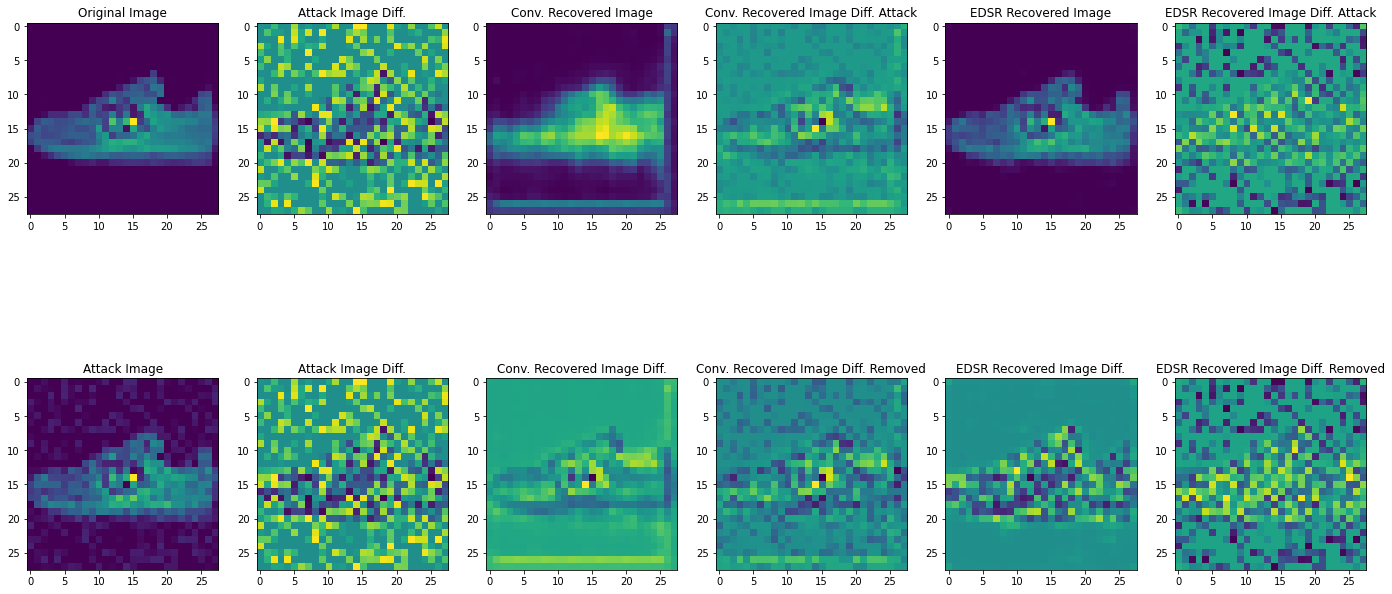

In [ ]:
#@title Plot a Few examples { form-width: "20%" }

idx = 41

print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))
fig,ax = plt.subplots(nrows=2,ncols=6,figsize=(24,12))

ax[0][0].set_title("Original Image")
ax[0][0].imshow((rand_attack_im_devset.label[idx]))
print(np.max(rand_attack_im_devset.label[idx]))

ax[1][0].set_title("Attack Image")
ax[1][0].imshow((rand_attack_im_devset.data[idx]))
print(np.max(rand_attack_im_devset.data[idx]))

example = torch.from_numpy(rand_attack_im_devset.data[idx])
example = torch.unsqueeze(example,0)
example = torch.unsqueeze(example,0)

ax[0][1].set_title("Attack Image Diff.")
ax[0][1].imshow(rand_attack_im_devset.data[idx]- rand_attack_im_devset.label[idx])

ax[1][1].set_title("Attack Image Diff.")
ax[1][1].imshow(rand_attack_im_devset.data[idx]- rand_attack_im_devset.label[idx])

ax[0][2].set_title("Conv. Recovered Image")
temp = rand_denoiser_conv(example.to(device).float())
temp = temp.to("cpu")
temp = torch.squeeze(temp)
temp = temp.detach().numpy()
ax[0][2].imshow(temp)
print(np.max(temp))

ax[1][2].set_title("Conv. Recovered Image Diff.")
ax[1][2].imshow(temp - rand_attack_im_devset.label[idx])

ax[0][3].set_title("Conv. Recovered Image Diff. Attack")
ax[0][3].imshow(temp - rand_attack_im_devset.data[idx])

ax[1][3].set_title("Conv. Recovered Image Diff. Removed")
ax[1][3].imshow((temp - rand_attack_im_devset.data[idx]) - (rand_attack_im_devset.data[idx]- rand_attack_im_devset.label[idx]))

ax[0][4].set_title("EDSR Recovered Image")
temp = rand_denoiser_edsr(example.to(device).float())
temp = temp.to("cpu")
temp = torch.squeeze(temp)
temp = temp.detach().numpy()
ax[0][4].imshow(temp)
print(np.max(temp))

ax[1][4].set_title("EDSR Recovered Image Diff.")
ax[1][4].imshow(temp - rand_attack_im_devset.label[idx])
print(np.max(temp - rand_attack_im_devset.label[idx]))

ax[0][5].set_title("EDSR Recovered Image Diff. Attack")
ax[0][5].imshow(temp - rand_attack_im_devset.data[idx])

ax[1][5].set_title("EDSR Recovered Image Diff. Removed")
ax[1][5].imshow((temp - rand_attack_im_devset.data[idx]) - (rand_attack_im_devset.data[idx]- rand_attack_im_devset.label[idx]))

In [ ]:
#@title Test Conv. Rand. Denoiser { form-width: "20%" }

print("RP")
print(f'FF test accuracy: {test(mnist_ff,mnist_rp_devloader,denoiser=rand_denoiser_conv)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_rp_devloader,denoiser=rand_denoiser_conv)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_rp_devloader,denoiser=rand_denoiser_conv)[0]}')

print("\nSimBA")
print(f'FF test accuracy: {test(mnist_ff,mnist_ff_simba_devloader,denoiser=rand_denoiser_conv)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_simba_devloader,denoiser=rand_denoiser_conv)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_simba_devloader,denoiser=rand_denoiser_conv)[0]}')

print("\nShuffled")
print(f'FF test accuracy: {test(mnist_ff,rand_attack_devloader,denoiser=rand_denoiser_conv)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,rand_attack_devloader,denoiser=rand_denoiser_conv)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,rand_attack_devloader,denoiser=rand_denoiser_conv)[0]}')

RP
FF test accuracy: 0.7433333333333333
CNN test accuracy: 0.43
Composite test accuracy: 0.6858333333333333

SimBA
FF test accuracy: 0.6958333333333333
CNN test accuracy: 0.40166666666666667
Composite test accuracy: 0.675

Shuffled
FF test accuracy: 0.725
CNN test accuracy: 0.41875
Composite test accuracy: 0.6791666666666667


In [ ]:
#@title Test EDSR Rand. Denoiser { form-width: "20%" }

print("RP")
print(f'FF test accuracy: {test(mnist_ff,mnist_rp_devloader,denoiser=rand_denoiser_edsr)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_rp_devloader,denoiser=rand_denoiser_edsr)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_rp_devloader,denoiser=rand_denoiser_edsr)[0]}')

print("\nSimBA")
print(f'FF test accuracy: {test(mnist_ff,mnist_ff_simba_devloader,denoiser=rand_denoiser_edsr)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_simba_devloader,denoiser=rand_denoiser_edsr)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_simba_devloader,denoiser=rand_denoiser_edsr)[0]}')

print("\nShuffled")
print(f'FF test accuracy: {test(mnist_ff,rand_attack_devloader,denoiser=rand_denoiser_edsr)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,rand_attack_devloader,denoiser=rand_denoiser_edsr)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,rand_attack_devloader,denoiser=rand_denoiser_edsr)[0]}')

RP
FF test accuracy: 0.7891666666666667
CNN test accuracy: 0.43833333333333335
Composite test accuracy: 0.7325

SimBA
FF test accuracy: 0.735
CNN test accuracy: 0.3675
Composite test accuracy: 0.7116666666666667

Shuffled
FF test accuracy: 0.769375
CNN test accuracy: 0.415625
Composite test accuracy: 0.719375


In [ ]:
#@title Rotate Denoiser { form-width: "20%" }

rotate_denoiser_conv = ConvAutoencoder()
rotate_denoiser_conv.to(device)
optimizer = torch.optim.Rprop(rotate_denoiser_conv.parameters(),lr=0.00000001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'rotate_denoiser_conv.pth'
if os.path.isfile(SAVE_PATH):
  rotate_denoiser_conv.load_state_dict(torch.load(SAVE_PATH))
else:
  train(rotate_denoiser_conv,optimizer,rotate_trainloader,"rotate_denoiser_conv",
        epoch=10,loss_fcn=criterion,clip=True,plot=True,devloader=rotate_devloader)


In [ ]:
#@title Test Rotate Denoiser { form-width: "20%" }

mnist_rotate_testset = ImageDataset(x_test_rotated,mnist_y["test"])
mnist_rotate_testloader = DataLoader(mnist_rotate_testset,50,shuffle=True)

print("Undefended")
print(f'FF test accuracy: {test(mnist_ff,mnist_rotate_testloader,denoiser=None)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_rotate_testloader,denoiser=None)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_rotate_testloader,denoiser=None)[0]}')

print("\nRotate Defended")
print(f'FF test accuracy: {test(mnist_ff,mnist_rotate_testloader,denoiser=rotate_denoiser_conv)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_rotate_testloader,denoiser=rotate_denoiser_conv)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_rotate_testloader,denoiser=rotate_denoiser_conv)[0]}')

Undefended
FF test accuracy: 0.1835
CNN test accuracy: 0.164
Composite test accuracy: 0.2395

Rotate Defended
FF test accuracy: 0.125
CNN test accuracy: 0.109
Composite test accuracy: 0.1245


sneaker: 7
1.0
1.0
0.41799256
0.33415827


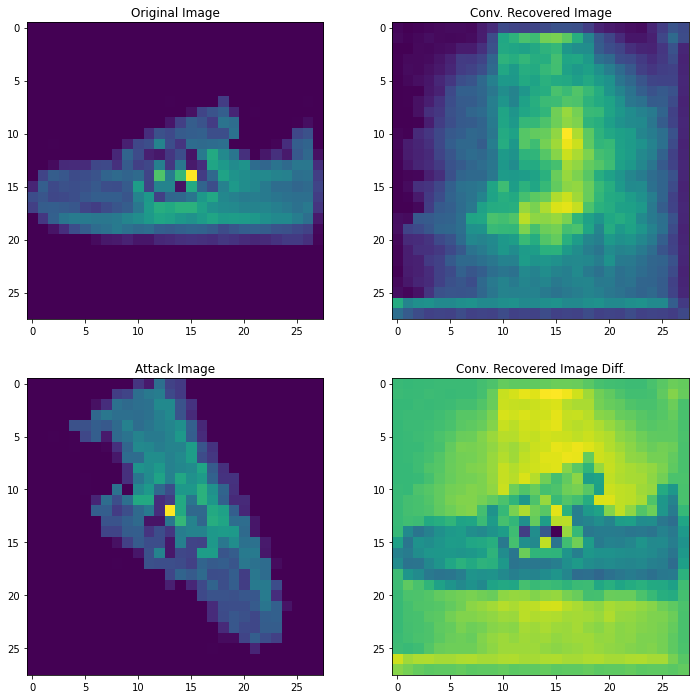

In [ ]:
#@title Plot a Few examples, Rotate { form-width: "20%" }

idx = 41

orig = mnist_x["dev"][idx]
attack = x_rotated[idx]

print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))

ax[0][0].set_title("Original Image")
ax[0][0].imshow(orig)
print(np.max(orig))

ax[1][0].set_title("Attack Image")
ax[1][0].imshow((attack))
print(np.max(attack))

example = torch.from_numpy(attack).float()
example = torch.unsqueeze(example,0)
example = torch.unsqueeze(example,0)

ax[0][1].set_title("Conv. Recovered Image")
temp = rotate_denoiser_conv(example.to(device))
temp = temp.to("cpu")
temp = torch.squeeze(temp)
temp = temp.detach().numpy()
ax[0][1].imshow(temp)
print(np.max(temp))

ax[1][1].set_title("Conv. Recovered Image Diff.")
ax[1][1].imshow(temp-orig)
print(np.max(temp-orig))


In [ ]:
#@title Shift Denoiser { form-width: "20%" }

shift_denoiser_conv = ConvAutoencoder()
shift_denoiser_conv.to(device)
optimizer = torch.optim.Rprop(shift_denoiser_conv.parameters(),lr=0.00001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'shift_denoiser_conv.pth'
if os.path.isfile(SAVE_PATH):
  shift_denoiser_conv.load_state_dict(torch.load(SAVE_PATH))
else:
  train(shift_denoiser_conv,optimizer,shift_trainloader,"shift_denoiser_conv",
        epoch=10,loss_fcn=criterion,clip=True,plot=True,devloader=shift_devloader)

In [ ]:
#@title Test Shift Denoiser { form-width: "20%" }

mnist_shift_testset = ImageDataset(x_test_shifted,mnist_y["test"])
mnist_shift_testloader = DataLoader(mnist_shift_testset,50,shuffle=True)

print("Undefended")
print(f'FF test accuracy: {test(mnist_ff,mnist_shift_testloader,denoiser=None)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_shift_testloader,denoiser=None)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_shift_testloader,denoiser=None)[0]}')

print("\nShifted Defended")
print(f'FF test accuracy: {test(mnist_ff,mnist_shift_testloader,denoiser=shift_denoiser_conv)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_shift_testloader,denoiser=shift_denoiser_conv)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_shift_testloader,denoiser=shift_denoiser_conv)[0]}')

Undefended
FF test accuracy: 0.524
CNN test accuracy: 0.384
Composite test accuracy: 0.637

Shifted Defended
FF test accuracy: 0.5385
CNN test accuracy: 0.327
Composite test accuracy: 0.486


sneaker: 7
1.0
1.0
0.5550003
0.43072996


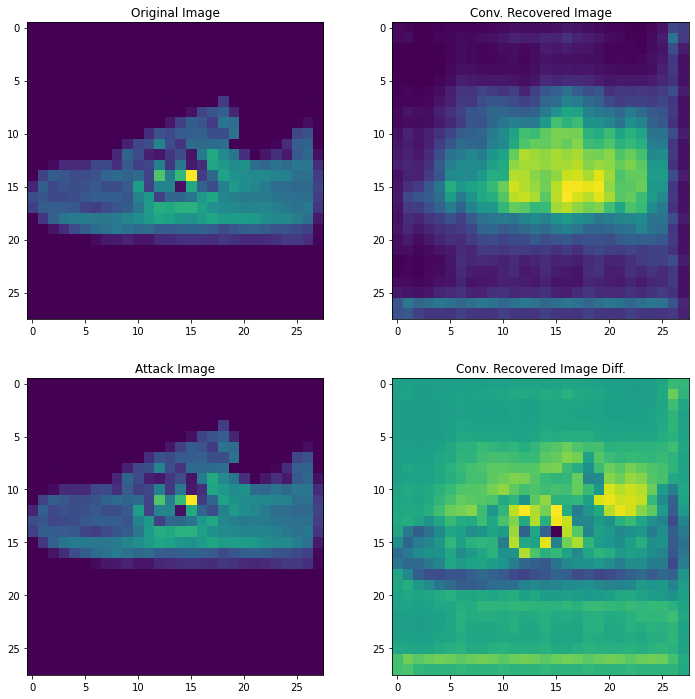

In [ ]:
#@title Plot a Few examples, Shift { form-width: "20%" }

idx = 41

orig = mnist_x["dev"][idx]
attack = x_shifted[idx]

print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))

ax[0][0].set_title("Original Image")
ax[0][0].imshow(orig)
print(np.max(orig))

ax[1][0].set_title("Attack Image")
ax[1][0].imshow((attack))
print(np.max(attack))

example = torch.from_numpy(attack).float()
example = torch.unsqueeze(example,0)
example = torch.unsqueeze(example,0)

ax[0][1].set_title("Conv. Recovered Image")
temp = shift_denoiser_conv(example.to(device))
temp = temp.to("cpu")
temp = torch.squeeze(temp)
temp = temp.detach().numpy()
ax[0][1].imshow(temp)
print(np.max(temp))

ax[1][1].set_title("Conv. Recovered Image Diff.")
ax[1][1].imshow(temp-orig)
print(np.max(temp-orig))


In [ ]:
#@title Scale Denoiser { form-width: "20%" }

scale_denoiser_conv = ConvAutoencoder()
scale_denoiser_conv.to(device)
optimizer = torch.optim.Rprop(scale_denoiser_conv.parameters(),lr=0.00001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'scale_denoiser_conv.pth'
if os.path.isfile(SAVE_PATH):
  scale_denoiser_conv.load_state_dict(torch.load(SAVE_PATH))
else:
  train(scale_denoiser_conv,optimizer,scale_trainloader,"scale_denoiser_conv",
        epoch=10,loss_fcn=criterion,clip=True,plot=True,devloader=scale_devloader)

In [ ]:
#@title Test Scale Denoiser { form-width: "20%" }

mnist_scale_testset = ImageDataset(x_test_scaled,mnist_y["test"])
mnist_scale_testloader = DataLoader(mnist_scale_testset,50,shuffle=True)

print("Undefended")
print(f'FF test accuracy: {test(mnist_ff,mnist_scale_testloader,denoiser=None)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_scale_testloader,denoiser=None)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_scale_testloader,denoiser=None)[0]}')

print("\nScale Defended")
print(f'FF test accuracy: {test(mnist_ff,mnist_scale_testloader,denoiser=scale_denoiser_conv)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_scale_testloader,denoiser=scale_denoiser_conv)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_scale_testloader,denoiser=scale_denoiser_conv)[0]}')

Undefended
FF test accuracy: 0.7085
CNN test accuracy: 0.4065
Composite test accuracy: 0.709

Scale Defended
FF test accuracy: 0.6675
CNN test accuracy: 0.392
Composite test accuracy: 0.6585


sneaker: 7
1.0
1.0
0.59386116
0.42640394


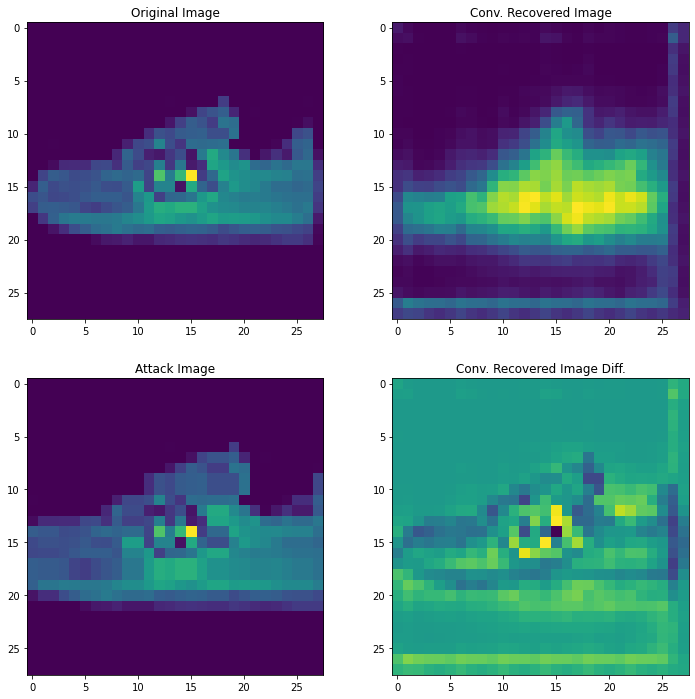

In [ ]:
#@title Plot a Few examples, Scale { form-width: "20%" }

idx = 41

orig = mnist_x["dev"][idx]
attack = x_scaled[idx]

print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))

ax[0][0].set_title("Original Image")
ax[0][0].imshow(orig)
print(np.max(orig))

ax[1][0].set_title("Attack Image")
ax[1][0].imshow((attack))
print(np.max(attack))

example = torch.from_numpy(attack).float()
example = torch.unsqueeze(example,0)
example = torch.unsqueeze(example,0)

ax[0][1].set_title("Conv. Recovered Image")
temp = scale_denoiser_conv(example.to(device))
temp = temp.to("cpu")
temp = torch.squeeze(temp)
temp = temp.detach().numpy()
ax[0][1].imshow(temp)
print(np.max(temp))

ax[1][1].set_title("Conv. Recovered Image Diff.")
ax[1][1].imshow(temp-orig)
print(np.max(temp-orig))


In [ ]:
#@title Affine Denoiser { form-width: "20%" }

affine_denoiser_conv = ConvAutoencoder()
affine_denoiser_conv.to(device)
optimizer = torch.optim.Rprop(affine_denoiser_conv.parameters(),lr=0.00001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'affine_denoiser_conv.pth'
if os.path.isfile(SAVE_PATH):
  affine_denoiser_conv.load_state_dict(torch.load(SAVE_PATH))
else:
  train(affine_denoiser_conv,optimizer,affine_trainloader,"affine_denoiser_conv",
        epoch=10,loss_fcn=criterion,clip=True,plot=True,devloader=affine_devloader)

In [ ]:
#@title Test Affine Denoiser { form-width: "20%" }

mnist_affine_testset = ImageDataset(x_test_affine,mnist_y["test"])
mnist_affine_testloader = DataLoader(mnist_affine_testset,50,shuffle=True)

print("Undefended")
print(f'FF test accuracy: {test(mnist_ff,mnist_affine_testloader,denoiser=None)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_affine_testloader,denoiser=None)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_affine_testloader,denoiser=None)[0]}')

print("\nAffine Defended")
print(f'FF test accuracy: {test(mnist_ff,mnist_affine_testloader,denoiser=affine_denoiser_conv)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_affine_testloader,denoiser=affine_denoiser_conv)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_affine_testloader,denoiser=affine_denoiser_conv)[0]}')

Undefended
FF test accuracy: 0.35
CNN test accuracy: 0.277
Composite test accuracy: 0.452

Affine Defended
FF test accuracy: 0.2995
CNN test accuracy: 0.196
Composite test accuracy: 0.275


sneaker: 7
1.0
1.0
0.43436474
0.36064667


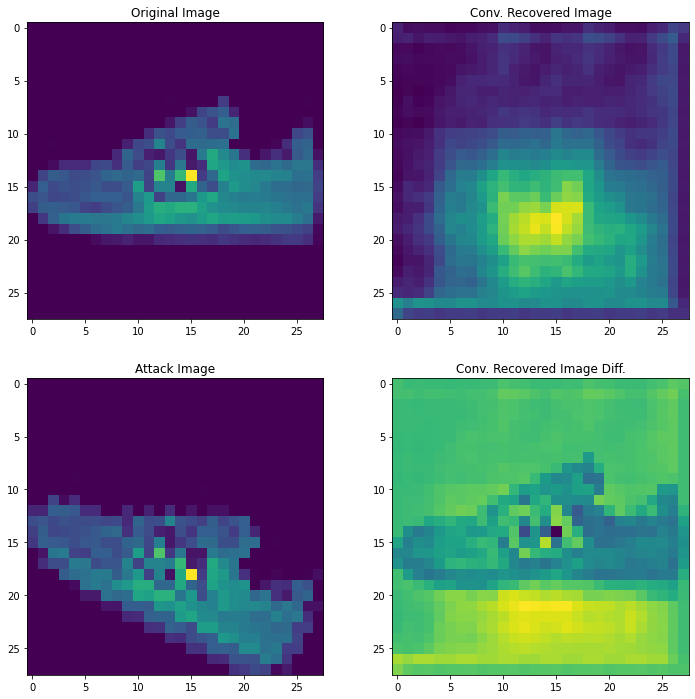

In [ ]:
#@title Plot a Few examples, Affine { form-width: "20%" }

idx = 41

orig = mnist_x["dev"][idx]
attack = x_affine[idx]

print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))

ax[0][0].set_title("Original Image")
ax[0][0].imshow(orig)
print(np.max(orig))

ax[1][0].set_title("Attack Image")
ax[1][0].imshow((attack))
print(np.max(attack))

example = torch.from_numpy(attack).float()
example = torch.unsqueeze(example,0)
example = torch.unsqueeze(example,0)

ax[0][1].set_title("Conv. Recovered Image")
temp = affine_denoiser_conv(example.to(device))
temp = temp.to("cpu")
temp = torch.squeeze(temp)
temp = temp.detach().numpy()
ax[0][1].imshow(temp)
print(np.max(temp))

ax[1][1].set_title("Conv. Recovered Image Diff.")
ax[1][1].imshow(temp-orig)
print(np.max(temp-orig))


In [ ]:
#@title Brightness Denoiser Conv. { form-width: "20%" }

brightness_denoiser_conv = ConvAutoencoder()
brightness_denoiser_conv.to(device)
optimizer = torch.optim.Rprop(brightness_denoiser_conv.parameters(),lr=0.00001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'brightness_denoiser_conv.pth'
if os.path.isfile(SAVE_PATH):
  brightness_denoiser_conv.load_state_dict(torch.load(SAVE_PATH))
else:
  train(brightness_denoiser_conv,optimizer,brightness_trainloader,"brightness_denoiser_conv",
        epoch=40,loss_fcn=criterion,clip=True,plot=True,devloader=brightness_devloader)

In [ ]:
#@title Brightness Denoiser EDSR { form-width: "20%" }

brightness_denoiser_edsr = EDSR(scale=1)
brightness_denoiser_edsr.to(device)
optimizer = torch.optim.Rprop(brightness_denoiser_edsr.parameters(),lr=0.000001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'brightness_denoiser_edsr.pth'
if os.path.isfile(SAVE_PATH):
  brightness_denoiser_edsr.load_state_dict(torch.load(SAVE_PATH))
else:
  train(brightness_denoiser_edsr,optimizer,brightness_trainloader,"brightness_denoiser_edsr",
        epoch=150,loss_fcn=criterion,clip=True,plot=True,devloader=brightness_devloader)

In [ ]:
#@title Test Brightness Denoiser { form-width: "20%" }

mnist_brightness_testset = ImageDataset(x_test_brightness,mnist_y["test"])
mnist_brightness_testloader = DataLoader(mnist_brightness_testset,50,shuffle=True)

print("Undefended")
print(f'FF test accuracy: {test(mnist_ff,mnist_brightness_testloader,denoiser=None)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_brightness_testloader,denoiser=None)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_brightness_testloader,denoiser=None)[0]}')

print("\nBrightness Defended")
print(f'FF test accuracy: {test(mnist_ff,mnist_brightness_testloader,denoiser=brightness_denoiser_conv)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_brightness_testloader,denoiser=brightness_denoiser_conv)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_brightness_testloader,denoiser=brightness_denoiser_conv)[0]}')

print("\nEDSR Brightness Defended")
print(f'FF test accuracy: {test(mnist_ff,mnist_brightness_testloader,denoiser=brightness_denoiser_edsr)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_brightness_testloader,denoiser=brightness_denoiser_edsr)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_brightness_testloader,denoiser=brightness_denoiser_edsr)[0]}')

Undefended
FF test accuracy: 0.795
CNN test accuracy: 0.4485
Composite test accuracy: 0.7475

Brightness Defended
FF test accuracy: 0.7405
CNN test accuracy: 0.425
Composite test accuracy: 0.7015

EDSR Brightness Defended
FF test accuracy: 0.7935
CNN test accuracy: 0.4425
Composite test accuracy: 0.7195


sneaker: 7
1.0
1.0
0.8317645
0.53415835
0.90848273
0.4005184


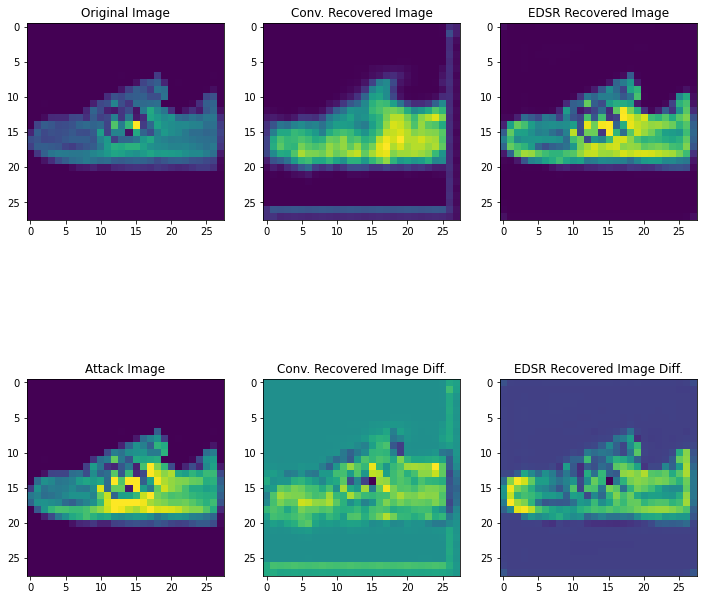

In [ ]:
#@title Plot a Few examples, Brightness { form-width: "20%" }

idx = 41

orig = mnist_x["dev"][idx]
attack = x_brightness[idx]

print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(12,12))

ax[0][0].set_title("Original Image")
ax[0][0].imshow(orig)
print(np.max(orig))

ax[1][0].set_title("Attack Image")
ax[1][0].imshow((attack))
print(np.max(attack))

example = torch.from_numpy(attack).float()
example = torch.unsqueeze(example,0)
example = torch.unsqueeze(example,0)

ax[0][1].set_title("Conv. Recovered Image")
temp = brightness_denoiser_conv(example.to(device))
temp = temp.to("cpu")
temp = torch.squeeze(temp)
temp = temp.detach().numpy()
ax[0][1].imshow(temp)
print(np.max(temp))

ax[1][1].set_title("Conv. Recovered Image Diff.")
ax[1][1].imshow(temp-orig)
print(np.max(temp-orig))

ax[0][2].set_title("EDSR Recovered Image")
temp = brightness_denoiser_edsr(example.to(device))
temp = temp.to("cpu")
temp = torch.squeeze(temp)
temp = temp.detach().numpy()
ax[0][2].imshow(temp)
print(np.max(temp))

ax[1][2].set_title("EDSR Recovered Image Diff.")
ax[1][2].imshow(temp-orig)
print(np.max(temp-orig))


In [ ]:
#@title Blur Denoiser { form-width: "20%" }

blur_denoiser_conv = ConvAutoencoder()
blur_denoiser_conv.to(device)
optimizer = torch.optim.Rprop(blur_denoiser_conv.parameters(),lr=0.00001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'blur_denoiser_conv.pth'
if os.path.isfile(SAVE_PATH):
  blur_denoiser_conv.load_state_dict(torch.load(SAVE_PATH))
else:
  train(blur_denoiser_conv,optimizer,blur_trainloader,"blur_denoiser_conv",
        epoch=10,loss_fcn=criterion,clip=True,plot=True,devloader=blur_devloader)

In [ ]:
#@title Blur Denoiser EDSR { form-width: "20%" }

blur_denoiser_edsr = EDSR(scale=1)
blur_denoiser_edsr.to(device)
optimizer = torch.optim.Rprop(blur_denoiser_edsr.parameters(),lr=0.00001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'blur_denoiser_edsr.pth'
if os.path.isfile(SAVE_PATH):
  blur_denoiser_edsr.load_state_dict(torch.load(SAVE_PATH))
else:
  train(blur_denoiser_edsr,optimizer,blur_trainloader,"blur_denoiser_edsr",
        epoch=10,loss_fcn=criterion,clip=True,plot=True,devloader=blur_devloader)

In [ ]:
#@title Test Blur Denoiser { form-width: "20%" }

mnist_blur_testset = ImageDataset(x_test_blur,mnist_y["test"])
mnist_blur_testloader = DataLoader(mnist_blur_testset,50,shuffle=True)

print("Undefended")
print(f'FF test accuracy: {test(mnist_ff,mnist_blur_testloader,denoiser=None)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_blur_testloader,denoiser=None)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_blur_testloader,denoiser=None)[0]}')

print("\nBlur Defended")
print(f'FF test accuracy: {test(mnist_ff,mnist_blur_testloader,denoiser=blur_denoiser_conv)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_blur_testloader,denoiser=blur_denoiser_conv)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_blur_testloader,denoiser=blur_denoiser_conv)[0]}')

print("\nEDSR Blur Defended")
print(f'FF test accuracy: {test(mnist_ff,mnist_blur_testloader,denoiser=blur_denoiser_edsr)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_blur_testloader,denoiser=blur_denoiser_edsr)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_blur_testloader,denoiser=blur_denoiser_edsr)[0]}')

Undefended
FF test accuracy: 0.785
CNN test accuracy: 0.441
Composite test accuracy: 0.733

Blur Defended
FF test accuracy: 0.733
CNN test accuracy: 0.4405
Composite test accuracy: 0.7015

EDSR Blur Defended
FF test accuracy: 0.7955
CNN test accuracy: 0.4495
Composite test accuracy: 0.7455


sneaker: 7
1.0
0.6819811
0.58755136
0.30856508
0.97505546
0.162224


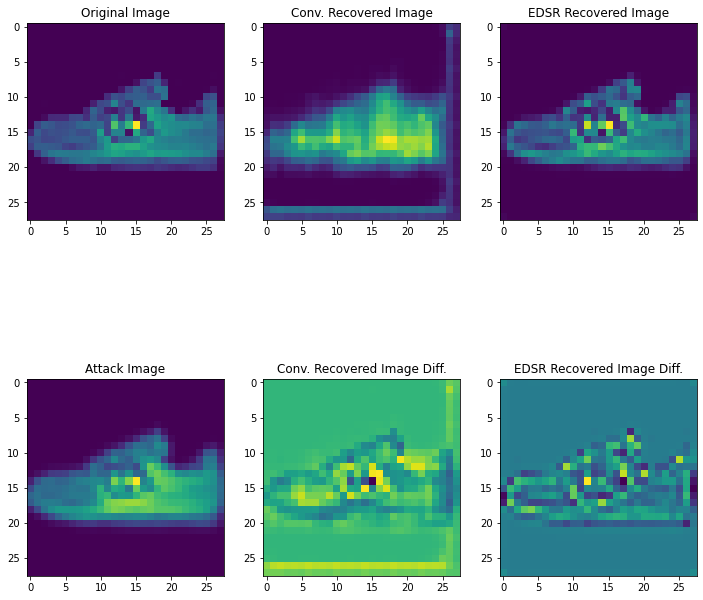

In [ ]:
#@title Plot a Few examples, Blur { form-width: "20%" }

idx = 41

orig = mnist_x["dev"][idx]
attack = x_blur[idx]

print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(12,12))

ax[0][0].set_title("Original Image")
ax[0][0].imshow(orig)
print(np.max(orig))

ax[1][0].set_title("Attack Image")
ax[1][0].imshow((attack))
print(np.max(attack))

example = torch.from_numpy(attack).float()
example = torch.unsqueeze(example,0)
example = torch.unsqueeze(example,0)

ax[0][1].set_title("Conv. Recovered Image")
temp = blur_denoiser_conv(example.to(device))
temp = temp.to("cpu")
temp = torch.squeeze(temp)
temp = temp.detach().numpy()
ax[0][1].imshow(temp)
print(np.max(temp))

ax[1][1].set_title("Conv. Recovered Image Diff.")
ax[1][1].imshow(temp-orig)
print(np.max(temp-orig))

ax[0][2].set_title("EDSR Recovered Image")
temp = blur_denoiser_edsr(example.to(device))
temp = temp.to("cpu")
temp = torch.squeeze(temp)
temp = temp.detach().numpy()
ax[0][2].imshow(temp)
print(np.max(temp))

ax[1][2].set_title("EDSR Recovered Image Diff.")
ax[1][2].imshow(temp-orig)
print(np.max(temp-orig))


In [ ]:
#@title Composite Denoiser Conv { form-width: "20%" }

composite_denoiser_conv = ConvAutoencoder()
composite_denoiser_conv.to(device)
optimizer = torch.optim.Rprop(composite_denoiser_conv.parameters(),lr=0.00001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'composite_denoiser_conv.pth'
if os.path.isfile(SAVE_PATH):
  composite_denoiser_conv.load_state_dict(torch.load(SAVE_PATH))
else:
  train(composite_denoiser_conv,optimizer,composite_blur_trainloader,"composite_denoiser_conv",
        epoch=10,loss_fcn=criterion,clip=True,plot=True,devloader=composite_blur_devloader)

In [ ]:
#@title Composite Denoiser EDSR { form-width: "20%" }

composite_denoiser_edsr = EDSR(scale=1)
composite_denoiser_edsr.to(device)
optimizer = torch.optim.Rprop(composite_denoiser_edsr.parameters(),lr=0.000001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'composite_denoiser_edsr.pth'
if os.path.isfile(SAVE_PATH):
  composite_denoiser_edsr.load_state_dict(torch.load(SAVE_PATH))
else:
  train(composite_denoiser_edsr,optimizer,composite_blur_trainloader,"composite_denoiser_edsr",
        epoch=10,loss_fcn=criterion,clip=True,plot=True,devloader=composite_blur_devloader)

In [ ]:
#@title Test Composite Denoiser { form-width: "20%" }

mnist_composite_blur_testset = ImageDataset(x_test_composite_blur,mnist_y["test"])
mnist_composite_blur_testloader = DataLoader(mnist_composite_blur_testset,50,shuffle=True)

print("Undefended")
print(f'FF test accuracy: {test(mnist_ff,mnist_composite_blur_testloader,denoiser=None)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_composite_blur_testloader,denoiser=None)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_composite_blur_testloader,denoiser=None)[0]}')

print("\nBlur Defended")
print(f'FF test accuracy: {test(mnist_ff,mnist_composite_blur_testloader,denoiser=composite_denoiser_conv)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_composite_blur_testloader,denoiser=composite_denoiser_conv)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_composite_blur_testloader,denoiser=composite_denoiser_conv)[0]}')

print("\nEDSR Blur Defended")
print(f'FF test accuracy: {test(mnist_ff,mnist_composite_blur_testloader,denoiser=composite_denoiser_edsr)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_composite_blur_testloader,denoiser=composite_denoiser_edsr)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_composite_blur_testloader,denoiser=composite_denoiser_edsr)[0]}')

Undefended
FF test accuracy: 0.327
CNN test accuracy: 0.25
Composite test accuracy: 0.41

Blur Defended
FF test accuracy: 0.3335
CNN test accuracy: 0.1985
Composite test accuracy: 0.308

EDSR Blur Defended
FF test accuracy: 0.2715
CNN test accuracy: 0.1985
Composite test accuracy: 0.3005


sneaker: 7
1.0
0.7239214
0.5604407
0.424722
0.3997988
0.3538613


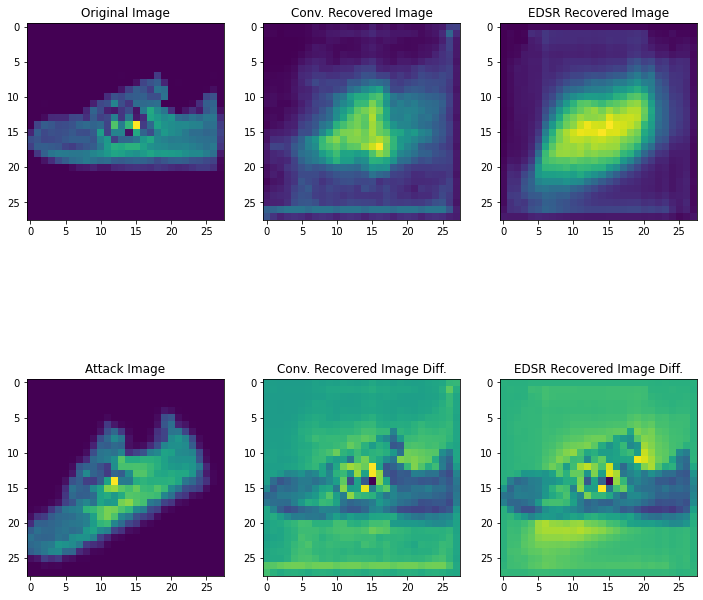

In [ ]:
#@title Plot a Few examples, Composite blur { form-width: "20%" }

idx = 41

orig = mnist_x["dev"][idx]
attack = x_composite_blur[idx]

print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(12,12))

ax[0][0].set_title("Original Image")
ax[0][0].imshow(orig)
print(np.max(orig))

ax[1][0].set_title("Attack Image")
ax[1][0].imshow((attack))
print(np.max(attack))

example = torch.from_numpy(attack).float()
example = torch.unsqueeze(example,0)
example = torch.unsqueeze(example,0)

ax[0][1].set_title("Conv. Recovered Image")
temp = composite_denoiser_conv(example.to(device))
temp = temp.to("cpu")
temp = torch.squeeze(temp)
temp = temp.detach().numpy()
ax[0][1].imshow(temp)
print(np.max(temp))

ax[1][1].set_title("Conv. Recovered Image Diff.")
ax[1][1].imshow(temp-orig)
print(np.max(temp-orig))

ax[0][2].set_title("EDSR Recovered Image")
temp = composite_denoiser_edsr(example.to(device))
temp = temp.to("cpu")
temp = torch.squeeze(temp)
temp = temp.detach().numpy()
ax[0][2].imshow(temp)
print(np.max(temp))

ax[1][2].set_title("EDSR Recovered Image Diff.")
ax[1][2].imshow(temp-orig)
print(np.max(temp-orig))


# Train with transforms

In [ ]:
#@title
print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')

print("\nBaseline Overall Test Accuracy on Image Transforms")
print(f'FF test accuracy: {test(mnist_ff,transform_attack_devloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,transform_attack_devloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,transform_attack_devloader)[0]}')

Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465

Baseline Overall Test Accuracy on Image Transforms
FF test accuracy: 0.5213095238095238
CNN test accuracy: 0.33107142857142857
Composite test accuracy: 0.5535714285714286


In [ ]:
#@title Train FF with transforms { form-width: "20%" }

sub = 3

subsample_transform_x_train = transform_attack_x_train_raw[0::sub]
subsample_transform_y_train = transform_attack_y_train_raw[0::sub]
subsample_transform_x_dev = transform_attack_x_devraw[0::sub]
subsample_transform_y_dev = transform_attack_y_devraw[0::sub]

transform_attack_sub_trainset = ImageDataset(subsample_transform_x_train,subsample_transform_y_train)
transform_attack_sub_trainloader = DataLoader(transform_attack_sub_trainset,50,shuffle=True)

transform_attack_sub_devset = ImageDataset(subsample_transform_x_dev,subsample_transform_y_dev)
transform_attack_sub_devloader = DataLoader(transform_attack_sub_devset,50,shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mnist_ff_transform = FF(in_flat_dim=28*28*1,up1=3,out_dim=10,h1=1000,h2=100)
mnist_ff_transform.to(device)
optimizer = torch.optim.Adam(mnist_ff_transform.parameters(),lr=0.000003)

SAVE_PATH = PATH + 'mnist_ff_transform.pth'
if os.path.isfile(SAVE_PATH):
  mnist_ff_transform.load_state_dict(torch.load(SAVE_PATH))
else:
  train(mnist_ff_transform,optimizer,transform_attack_sub_trainloader,
        "mnist_ff_transform",epoch=70,plot=True,
        devloader=transform_attack_sub_devloader)
  
baseline_ff_transform = test(mnist_ff_transform,mnist_testloader)[0]
print(baseline_ff_transform)

print(f'FF test accuracy: {test(mnist_ff_transform,transform_attack_testloader)[0]}')
print(f'FF test accuracy: {test(mnist_ff_transform,mnist_testloader)[0]}')

0.768
FF test accuracy: 0.6155714285714285
FF test accuracy: 0.768


In [ ]:
#@title Train CNN with transforms { form-width: "20%" }

sub = 3

subsample_transform_x_train = transform_attack_x_train_raw[0::sub]
subsample_transform_y_train = transform_attack_y_train_raw[0::sub]
subsample_transform_x_dev = transform_attack_x_devraw[0::sub]
subsample_transform_y_dev = transform_attack_y_devraw[0::sub]

transform_attack_sub_trainset = ImageDataset(subsample_transform_x_train,subsample_transform_y_train)
transform_attack_sub_trainloader = DataLoader(transform_attack_sub_trainset,50,shuffle=True)

transform_attack_sub_devset = ImageDataset(subsample_transform_x_dev,subsample_transform_y_dev)
transform_attack_sub_devloader = DataLoader(transform_attack_sub_devset,50,shuffle=True)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mnist_cnn_transform = CNN(
    up1=3,out_dim=10,chan1=128,chan2=64,chan3=32,k1=17,k2=9,k3=3,p12=2,color=1)
mnist_cnn_transform.to(device)
optimizer = torch.optim.Adam(mnist_cnn_transform.parameters(),lr=0.00001,weight_decay=1e-5)

SAVE_PATH = PATH + 'mnist_cnn_transform.pth'
if os.path.isfile(SAVE_PATH):
  mnist_cnn_transform.load_state_dict(torch.load(SAVE_PATH))
else:
  train(mnist_cnn_transform,optimizer,transform_attack_sub_trainloader,
        "mnist_cnn_transform",epoch=70,plot=True,
        devloader=transform_attack_sub_devloader)

baseline_cnn_transform = test(mnist_cnn_transform,mnist_testloader)[0]
print(baseline_cnn_transform)

print(f'CNN test accuracy: {test(mnist_cnn_transform,transform_attack_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn_transform,mnist_testloader)[0]}')

0.7565
CNN test accuracy: 0.6532857142857142
CNN test accuracy: 0.7565


In [ ]:
#@title Train composite with transforms { form-width: "20%" }

sub = 2

subsample_transform_x_train = transform_attack_x_train_raw[0::sub]
subsample_transform_y_train = transform_attack_y_train_raw[0::sub]
subsample_transform_x_dev = transform_attack_x_devraw[0::sub]
subsample_transform_y_dev = transform_attack_y_devraw[0::sub]

transform_attack_sub_trainset = ImageDataset(subsample_transform_x_train,subsample_transform_y_train)
transform_attack_sub_trainloader = DataLoader(transform_attack_sub_trainset,50,shuffle=True)

transform_attack_sub_devset = ImageDataset(subsample_transform_x_dev,subsample_transform_y_dev)
transform_attack_sub_devloader = DataLoader(transform_attack_sub_devset,50,shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mnist_comp_transform = composite(up1=8,out_dim=10,chan1=100,chan2=60,chan3=40,k1=25,k2=17,k3=7,
                   h4=100,h5=100,p12=4,p23=3,color=1)
mnist_comp_transform.to(device)
optimizer = torch.optim.Adam(mnist_comp_transform.parameters(),lr=0.00001)

SAVE_PATH = PATH + 'mnist_comp_transform.pth'
if os.path.isfile(SAVE_PATH):
  mnist_comp_transform.load_state_dict(torch.load(SAVE_PATH))
else:
  train(mnist_comp_transform,optimizer,transform_attack_sub_trainloader,
        "mnist_comp_transform",epoch=70,plot=True,
        devloader=transform_attack_sub_devloader)

baseline_comp_transform = test(mnist_comp_transform,mnist_testloader)[0]
print(baseline_comp_transform)

print(f'Comp test accuracy: {test(mnist_comp_transform,transform_attack_testloader)[0]}')
print(f'Comp test accuracy: {test(mnist_comp_transform,mnist_testloader)[0]}')

0.8295
Comp test accuracy: 0.7503571428571428
Comp test accuracy: 0.8295


In [ ]:
#@title
print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')

print(f'FF test accuracy: {test(mnist_ff,mnist_ff_simba_devloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_simba_devloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_simba_devloader)[0]}')

print('\nTransform-trained Classifiers')
print(f'FF test accuracy: {test(mnist_ff_transform,mnist_ff_simba_devloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn_transform,mnist_cnn_simba_devloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp_transform,mnist_comp_simba_devloader)[0]}')

Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.7025
CNN test accuracy: 0.3433333333333333
Composite test accuracy: 0.7041666666666667

Transform-trained Classifiers
FF test accuracy: 0.7058333333333333
CNN test accuracy: 0.7333333333333333
Composite test accuracy: 0.8016666666666666


In [ ]:
#@title Grad. { form-width: "20%" }

print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')
print(f'FF test accuracy: {test(mnist_ff,mnist_ff_bim_devloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_bim_devloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_bim_devloader)[0]}')

print('\nTransform-trained Classifiers')
print(f'FF transforms test accuracy: {test(mnist_ff_transform,mnist_ff_bim_devloader)[0]}')
print(f'CNN transforms test accuracy: {test(mnist_cnn_transform,mnist_cnn_bim_devloader)[0]}')
print(f'Composite transforms test accuracy: {test(mnist_comp_transform,mnist_comp_bim_devloader)[0]}')

Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.29333333333333333
CNN test accuracy: 0.15333333333333332
Composite test accuracy: 0.38333333333333336

Transform-trained Classifiers
FF transforms test accuracy: 0.32416666666666666
CNN transforms test accuracy: 0.6075
Composite transforms test accuracy: 0.53


# Regenerate SimBA and Grad

In [ ]:
#@title Generate SimBA set { form-width: "20%" }

idx = 1
delta = 0.1

SAVE_PATH = PATH + 'mnist_x_simba_ff_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_simba_ff_transform = np.load(f) 
else:
  mnist_x_simba_ff_transform = make_rand_attacks('mnist_x_simba_ff_transform', 
                              x=mnist_x["dev"],y=mnist_y["dev"],
                              model=mnist_ff_transform,method="SimBA",
                              step_size=1,chunk=50,epsilon=delta,n_steps=200)

SAVE_PATH = PATH + 'mnist_x_simba_cnn_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_simba_cnn_transform = np.load(f) 
else:
  mnist_x_simba_cnn_transform = make_rand_attacks('mnist_x_simba_cnn_transform',
                              mnist_x["dev"],mnist_y["dev"],
                              mnist_cnn_transform,"SimBA",1,50,delta,n_steps=200)

SAVE_PATH = PATH + 'mnist_x_simba_comp_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_simba_comp_transform = np.load(f) 
else:
  mnist_x_simba_comp_transform = make_rand_attacks('mnist_x_simba_comp_transform', 
                              mnist_x["dev"],mnist_y["dev"],
                              mnist_comp_transform,"SimBA",1,50,delta,n_steps=200)
  
# Generate a train-set sized group  

SAVE_PATH = PATH + 'train_mnist_x_simba_ff_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_simba_ff_transform = np.load(f) 
else:
  train_mnist_x_simba_ff_transform = make_rand_attacks('train_mnist_x_simba_ff_transform',
                              x=mnist_x["train"],y=mnist_y["train"],
                              model=mnist_ff_transform,method="SimBA",
                              step_size=1,chunk=50,epsilon=delta,n_steps=200)

SAVE_PATH = PATH + 'train_mnist_x_simba_cnn_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_simba_cnn_transform = np.load(f) 
else:
  train_mnist_x_simba_cnn_transform = make_rand_attacks('train_mnist_x_simba_cnn_transform',
                              mnist_x["train"],mnist_y["train"],
                              mnist_cnn_transform,"SimBA",1,50,delta,n_steps=200)

SAVE_PATH = PATH + 'train_mnist_x_simba_comp_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_simba_comp_transform = np.load(f) 
else:
  train_mnist_x_simba_comp_transform = make_rand_attacks('train_mnist_x_simba_comp_transform',
                              mnist_x["train"],mnist_y["train"],
                              mnist_comp_transform,"SimBA",1,50,delta,n_steps=200)
  

SAVE_PATH = PATH + 'test_mnist_x_simba_ff_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_simba_ff_transform = np.load(f) 
else:
  test_mnist_x_simba_ff_transform = make_rand_attacks('test_mnist_x_simba_ff_transform', 
                              x=mnist_x["test"],y=mnist_y["test"],
                              model=mnist_ff_transform,method="SimBA",
                              step_size=1,chunk=50,epsilon=delta,n_steps=200)

SAVE_PATH = PATH + 'test_mnist_x_simba_cnn_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_simba_cnn_transform = np.load(f) 
else:
  test_mnist_x_simba_cnn_transform = make_rand_attacks('test_mnist_x_simba_cnn_transform',
                              mnist_x["test"],mnist_y["test"],
                              mnist_cnn_transform,"SimBA",1,50,delta,n_steps=200)

SAVE_PATH = PATH + 'test_mnist_x_simba_comp_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_simba_comp_transform = np.load(f) 
else:
  test_mnist_x_simba_comp_transform = make_rand_attacks('test_mnist_x_simba_comp_transform',
                              mnist_x["test"],mnist_y["test"],
                              mnist_comp_transform,"SimBA",1,50,delta,n_steps=200)
  
mnist_ff_transform_simba_set = ImageDataset(test_mnist_x_simba_ff_transform,mnist_y["test"])
mnist_ff_transform_simba_testloader = DataLoader(mnist_ff_transform_simba_set,50,shuffle=True)

mnist_cnn_transform_simba_set = ImageDataset(test_mnist_x_simba_cnn,mnist_y["test"])
mnist_cnn_transform_simba_testloader = DataLoader(mnist_cnn_transform_simba_set,50,shuffle=True)

mnist_comp_transform_simba_set = ImageDataset(test_mnist_x_pgd_comp,mnist_y["test"])
mnist_comp_transform_simba_testloader = DataLoader(mnist_comp_transform_simba_set,50,shuffle=True)

print(f'Baselines - FF: {baseline_ff_transform}, CNN: {baseline_cnn_transform}, Comp.: {baseline_comp_transform}')

print(f'FF test accuracy: {test(mnist_ff_transform,mnist_rp_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn_transform,mnist_rp_testloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp_transform,mnist_rp_testloader)[0]}')

print(f'FF test accuracy: {test(mnist_ff_transform,mnist_ff_transform_simba_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn_transform,mnist_cnn_transform_simba_testloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp_transform,mnist_comp_transform_simba_testloader)[0]}')

Baselines - FF: 0.768, CNN: 0.7565, Comp.: 0.8295
FF test accuracy: 0.7545
CNN test accuracy: 0.7115
Composite test accuracy: 0.8015
FF test accuracy: 0.667
CNN test accuracy: 0.6935
Composite test accuracy: 0.6285


In [ ]:
#@title Combined Random Attack { form-width: "20%" }

x_temp = [mnist_x_rp,
          mnist_x_simba_ff_transform,mnist_x_simba_cnn_transform,
          mnist_x_simba_comp_transform]
x_temp = np.vstack(x_temp)

y_temp = [mnist_y["dev"],
          mnist_y["dev"],mnist_y["dev"],mnist_y["dev"]]
y_temp = np.hstack(y_temp)

im_temp = [mnist_x["dev"],
           mnist_x["dev"],mnist_x["dev"],mnist_x["dev"]]
im_temp = np.vstack(im_temp)

rand_attack_x_devraw_transform = x_temp
rand_attack_im_devraw_transform = im_temp
rand_attack_y_devraw_transform = y_temp

rand_attack_transform_devset = ImageDataset(x_temp,y_temp)
rand_attack_transform_devloader = DataLoader(rand_attack_transform_devset,50,shuffle=True)

rand_attack_transform_im_devset = ImageDataset(x_temp,im_temp)
rand_attack_transform_im_devloader = DataLoader(rand_attack_transform_im_devset,50,shuffle=True)


x_temp = [train_mnist_x_rp,
          train_mnist_x_simba_ff_transform,train_mnist_x_simba_cnn_transform,
          train_mnist_x_simba_comp_transform]
x_temp = np.vstack(x_temp)

y_temp = [mnist_y["train"],
          mnist_y["train"],mnist_y["train"],mnist_y["train"]]
y_temp = np.hstack(y_temp)

im_temp = [mnist_x["train"],
           mnist_x["train"],mnist_x["train"],mnist_x["train"]]
im_temp = np.vstack(im_temp)

rand_attack_transform_x_train_raw = x_temp
rand_attack_transform_im_train_raw = im_temp
rand_attack_transform_y_train_raw = y_temp

print(rand_attack_transform_x_train_raw.shape)
print(rand_attack_transform_y_train_raw.shape)

rand_attack_transform_trainset = ImageDataset(x_temp,y_temp)
rand_attack_transform_trainloader = DataLoader(rand_attack_transform_trainset,50,shuffle=True)

rand_attack_transform_im_trainset = ImageDataset(x_temp,im_temp)
rand_attack_transform_im_trainloader = DataLoader(rand_attack_transform_im_trainset,50,shuffle=True)

x_temp = [test_mnist_x_rp,
          test_mnist_x_simba_ff_transform,test_mnist_x_simba_cnn_transform,
          test_mnist_x_simba_comp_transform]
x_temp = np.vstack(x_temp)

y_temp = [mnist_y["test"],
          mnist_y["test"],mnist_y["test"],mnist_y["test"]]
y_temp = np.hstack(y_temp)

rand_attack_transform_x_test_raw = x_temp
rand_attack_transform_im_test_raw = im_temp
rand_attack_transform_y_test_raw = y_temp

rand_attack_transform_testset = ImageDataset(x_temp,y_temp)
rand_attack_transform_testloader = DataLoader(rand_attack_transform_testset,50,shuffle=True)

rand_attack_transform_im_testset = ImageDataset(x_temp,im_temp)
rand_attack_transform_im_testloader = DataLoader(rand_attack_transform_im_testset,50,shuffle=True)

print(f'Baselines - FF: {baseline_ff_transform}, CNN: {baseline_cnn_transform}, Comp.: {baseline_comp_transform}')
print(f'FF test accuracy: {test(mnist_ff_transform,rand_attack_transform_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn_transform,rand_attack_transform_testloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp_transform,rand_attack_transform_testloader)[0]}')

(43200, 28, 28)
(43200,)
Baselines - FF: 0.768, CNN: 0.7565, Comp.: 0.8295
FF test accuracy: 0.731625
CNN test accuracy: 0.6855
Composite test accuracy: 0.731375


In [ ]:
#@title Generate FGSM sets { form-width: "20%" }

idx = 1
delta = 0.2

loss_fcn = torch.nn.CrossEntropyLoss()

SAVE_PATH = PATH + 'mnist_x_fgsm_ff_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_fgsm_ff_transform = np.load(f) 
else:
  mnist_x_fgsm_ff_transform = make_grad_attacks('mnist_x_fgsm_ff_transform',
                              x=mnist_x["dev"],y=mnist_y["dev"],
                              model=mnist_ff_transform,loss_fcn=loss_fcn,method="FGSM",
                              step_size=0.015,chunk=50,epsilon=delta)

SAVE_PATH = PATH + 'mnist_x_fgsm_cnn_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_fgsm_cnn_transform = np.load(f) 
else:
  mnist_x_fgsm_cnn_transform = make_grad_attacks('mnist_x_fgsm_cnn_transform', 
                              mnist_x["dev"],mnist_y["dev"],
                              mnist_cnn_transform,loss_fcn,"FGSM",0.02,50,delta)

SAVE_PATH = PATH + 'mnist_x_fgsm_comp_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_fgsm_comp_transform = np.load(f) 
else:
  mnist_x_fgsm_comp_transform = make_grad_attacks('mnist_x_fgsm_comp_transform',
                              mnist_x["dev"],mnist_y["dev"],
                              mnist_comp_transform,loss_fcn,"FGSM",0.02,50,delta)

# Uncomment for a trainset sized attack

SAVE_PATH = PATH + 'train_mnist_x_fgsm_ff_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_fgsm_ff_transform = np.load(f) 
else:
  train_mnist_x_fgsm_ff_transform = make_grad_attacks('train_mnist_x_fgsm_ff_transform',
                              mnist_x["train"],mnist_y["train"],
                              mnist_ff_transform,loss_fcn,"FGSM",0.015,50,delta)
  
SAVE_PATH = PATH + 'train_mnist_x_fgsm_cnn_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_fgsm_cnn_transform = np.load(f) 
else:
  train_mnist_x_fgsm_cnn_transform = make_grad_attacks('train_mnist_x_fgsm_cnn_transform',
                              mnist_x["train"],mnist_y["train"],
                              mnist_cnn_transform,loss_fcn,"FGSM",0.02,50,delta)
  
SAVE_PATH = PATH + 'train_mnist_x_fgsm_comp_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_fgsm_comp_transform = np.load(f) 
else:
  train_mnist_x_fgsm_comp_transform = make_grad_attacks('train_mnist_x_fgsm_comp_transform',
                              mnist_x["train"],mnist_y["train"],
                              mnist_comp_transform,loss_fcn,"FGSM",0.02,50,delta)
  

SAVE_PATH = PATH + 'test_mnist_x_fgsm_ff_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_fgsm_ff_transform = np.load(f) 
else:
  test_mnist_x_fgsm_ff_transform = make_grad_attacks('test_mnist_x_fgsm_ff_transform', 
                              mnist_x["test"],mnist_y["test"],
                              mnist_ff_transform,loss_fcn,"FGSM",0.015,50,delta)
  
SAVE_PATH = PATH + 'test_mnist_x_fgsm_cnn_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_fgsm_cnn_transform = np.load(f) 
else:
  test_mnist_x_fgsm_cnn_transform = make_grad_attacks('test_mnist_x_fgsm_cnn_transform', 
                              mnist_x["test"],mnist_y["test"],
                              mnist_cnn_transform,loss_fcn,"FGSM",0.02,50,delta)
  
SAVE_PATH = PATH + 'test_mnist_x_fgsm_comp_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_fgsm_comp_transform = np.load(f) 
else:
  test_mnist_x_fgsm_comp_transform = make_grad_attacks('test_mnist_x_fgsm_comp_transform', 
                              mnist_x["test"],mnist_y["test"],
                              mnist_comp_transform,loss_fcn,"FGSM",0.02,50,delta)

mnist_ff_transform_fgsm_set = ImageDataset(test_mnist_x_fgsm_ff_transform,mnist_y["test"])
mnist_ff_transform_fgsm_testloader = DataLoader(mnist_ff_transform_fgsm_set,50,shuffle=True)

mnist_cnn_transform_fgsm_set = ImageDataset(test_mnist_x_fgsm_cnn,mnist_y["test"])
mnist_cnn_transform_fgsm_testloader = DataLoader(mnist_cnn_transform_fgsm_set,50,shuffle=True)

mnist_comp_transform_fgsm_set = ImageDataset(test_mnist_x_fgsm_comp,mnist_y["test"])
mnist_comp_transform_fgsm_testloader = DataLoader(mnist_comp_transform_fgsm_set,50,shuffle=True)



In [ ]:
#@title Generate PGD sets { form-width: "20%" }

SAVE_PATH = PATH + 'mnist_x_pgd_ff_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_pgd_ff_transform = np.load(f) 
else:
  mnist_x_pgd_ff_transform = make_grad_attacks('mnist_x_pgd_ff_transform', 
                              x=mnist_x["dev"],y=mnist_y["dev"],
                              model=mnist_ff_transform,loss_fcn=loss_fcn,method="PGD",
                              step_size=2.5,chunk=50,epsilon=delta)
  
SAVE_PATH = PATH + 'mnist_x_pgd_cnn_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_pgd_cnn_transform = np.load(f) 
else:
  mnist_x_pgd_cnn_transform = make_grad_attacks('mnist_x_pgd_cnn_transform', 
                              mnist_x["dev"],mnist_y["dev"],
                              mnist_cnn_transform,loss_fcn,"PGD",4,50,delta)

SAVE_PATH = PATH + 'mnist_x_pgd_comp_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_pgd_comp_transform = np.load(f) 
else:
  mnist_x_pgd_comp_transform = make_grad_attacks('mnist_x_pgd_comp_transform', 
                                    mnist_x["dev"],mnist_y["dev"],
                                    mnist_comp_transform,loss_fcn,"PGD",4,50,delta)

# Train set sized attack

SAVE_PATH = PATH + 'train_mnist_x_pgd_ff_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_pgd_ff_transform = np.load(f) 
else:
  train_mnist_x_pgd_ff_transform = make_grad_attacks('train_mnist_x_pgd_ff_transform',
                                    mnist_x["train"],mnist_y["train"],
                                    mnist_ff_transform,loss_fcn,"PGD",2.5,50,delta)
  
SAVE_PATH = PATH + 'train_mnist_x_pgd_cnn_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_pgd_cnn_transform = np.load(f) 
else:
  train_mnist_x_pgd_cnn_transform = make_grad_attacks('train_mnist_x_pgd_cnn_transform',
                                    mnist_x["train"],mnist_y["train"],
                                    mnist_cnn_transform,loss_fcn,"PGD",4,50,delta)
  
SAVE_PATH = PATH + 'train_mnist_x_pgd_comp_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_pgd_comp_transform = np.load(f) 
else:
  train_mnist_x_pgd_comp_transform = make_grad_attacks('train_mnist_x_pgd_comp_transform',
                                    mnist_x["train"],mnist_y["train"],
                                    mnist_comp_transform,loss_fcn,"PGD",4,50,delta)
  

SAVE_PATH = PATH + 'test_mnist_x_pgd_ff_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_pgd_ff_transform = np.load(f) 
else:
  test_mnist_x_pgd_ff_transform = make_grad_attacks('test_mnist_x_pgd_ff_transform', 
                                    mnist_x["test"],mnist_y["test"],
                                    mnist_ff_transform,loss_fcn,"PGD",2.5,50,delta)
  
SAVE_PATH = PATH + 'test_mnist_x_pgd_cnn_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_pgd_cnn_transform = np.load(f) 
else:
  test_mnist_x_pgd_cnn_transform = make_grad_attacks('test_mnist_x_pgd_cnn_transform',
                                    mnist_x["test"],mnist_y["test"],
                                    mnist_cnn_transform,loss_fcn,"PGD",4,50,delta)
  
SAVE_PATH = PATH + 'test_mnist_x_pgd_comp_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_pgd_comp_transform = np.load(f) 
else:
  test_mnist_x_pgd_comp_transform = make_grad_attacks('test_mnist_x_pgd_comp_transform', 
                                    mnist_x["test"],mnist_y["test"],
                                    mnist_comp_transform,loss_fcn,"PGD",4,50,delta)

mnist_ff_transform_pgd_set = ImageDataset(test_mnist_x_pgd_ff_transform,mnist_y["test"])
mnist_ff_transform_pgd_testloader = DataLoader(mnist_ff_transform_pgd_set,50,shuffle=True)

mnist_cnn_transform_pgd_set = ImageDataset(test_mnist_x_pgd_cnn,mnist_y["test"])
mnist_cnn_transform_pgd_testloader = DataLoader(mnist_cnn_transform_pgd_set,50,shuffle=True)

mnist_comp_transform_pgd_set = ImageDataset(test_mnist_x_pgd_comp,mnist_y["test"])
mnist_comp_transform_pgd_testloader = DataLoader(mnist_comp_transform_pgd_set,50,shuffle=True)


In [ ]:
#@title Generate BIM sets { form-width: "20%" }

SAVE_PATH = PATH + 'mnist_x_bim_ff_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_bim_ff_transform = np.load(f) 
else:
  mnist_x_bim_ff_transform = make_grad_attacks('mnist_x_bim_ff_transform', 
                              x=mnist_x["dev"],y=mnist_y["dev"],
                              model=mnist_ff_transform,loss_fcn=loss_fcn,method="BIM",
                              step_size=0.2,chunk=50,epsilon=delta,n_steps=50)

SAVE_PATH = PATH + 'mnist_x_bim_cnn_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_bim_cnn_transform = np.load(f) 
else:
  mnist_x_bim_cnn_transform = make_grad_attacks('mnist_x_bim_cnn_transform', 
                              mnist_x["dev"],mnist_y["dev"],
                              mnist_cnn_transform,loss_fcn,"BIM",0.2,50,delta,n_steps=50)

SAVE_PATH = PATH + 'mnist_x_bim_comp_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    mnist_x_bim_comp_transform = np.load(f) 
else:
  mnist_x_bim_comp_transform = make_grad_attacks('mnist_x_bim_comp_transform',
                                      mnist_x["dev"],mnist_y["dev"],
                                      mnist_comp_transform,loss_fcn,"BIM",
                                      0.2,50,delta,n_steps=50)
  
# Trainset sized attack

SAVE_PATH = PATH + 'train_mnist_x_bim_ff_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_bim_ff_transform = np.load(f) 
else:
  train_mnist_x_bim_ff_transform = make_grad_attacks('train_mnist_x_bim_ff_transform', 
                              x=mnist_x["train"],y=mnist_y["train"],
                              model=mnist_ff_transform,loss_fcn=loss_fcn,method="BIM",
                              step_size=0.2,chunk=50,epsilon=delta,n_steps=50)

SAVE_PATH = PATH + 'train_mnist_x_bim_cnn_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_bim_cnn_transform = np.load(f) 
else:
  train_mnist_x_bim_cnn_transform = make_grad_attacks('train_mnist_x_bim_cnn_transform', 
                              mnist_x["train"],mnist_y["train"],
                              mnist_cnn_transform,loss_fcn,"BIM",0.2,50,delta,n_steps=50)

SAVE_PATH = PATH + 'train_mnist_x_bim_comp_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    train_mnist_x_bim_comp_transform = np.load(f) 
else:
  train_mnist_x_bim_comp_transform = make_grad_attacks('train_mnist_x_bim_comp_transform',
                                      mnist_x["train"],mnist_y["train"],
                                      mnist_comp_transform,loss_fcn,"BIM",
                                      0.2,50,delta,n_steps=50)
  

SAVE_PATH = PATH + 'test_mnist_x_bim_ff_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_bim_ff_transform = np.load(f) 
else:
  test_mnist_x_bim_ff_transform = make_grad_attacks('test_mnist_x_bim_ff_transform',
                              x=mnist_x["test"],y=mnist_y["test"],
                              model=mnist_ff_transform,loss_fcn=loss_fcn,method="BIM",
                              step_size=0.2,chunk=50,epsilon=delta,n_steps=50)

SAVE_PATH = PATH + 'test_mnist_x_bim_cnn_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_bim_cnn_transform = np.load(f) 
else:
  test_mnist_x_bim_cnn_transform = make_grad_attacks('test_mnist_x_bim_cnn_transform', 
                              mnist_x["test"],mnist_y["test"],
                              mnist_cnn_transform,loss_fcn,"BIM",0.2,50,delta,n_steps=50)

SAVE_PATH = PATH + 'test_mnist_x_bim_comp_transform' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_bim_comp_transform = np.load(f) 
else:
  test_mnist_x_bim_comp_transform = make_grad_attacks('test_mnist_x_bim_comp_transform', 
                                      mnist_x["test"],mnist_y["test"],
                                      mnist_comp_transform,loss_fcn,"BIM",
                                      0.2,50,delta,n_steps=50)


mnist_ff_transform_bim_set = ImageDataset(test_mnist_x_bim_ff_transform,mnist_y["test"])
mnist_ff_transform_bim_testloader = DataLoader(mnist_ff_transform_bim_set,50,shuffle=True)

mnist_cnn_transform_bim_set = ImageDataset(test_mnist_x_bim_cnn_transform,mnist_y["test"])
mnist_cnn_transform_bim_testloader = DataLoader(mnist_cnn_transform_bim_set,50,shuffle=True)

mnist_comp_transform_bim_set = ImageDataset(test_mnist_x_bim_comp_transform,mnist_y["test"])
mnist_comp_transform_bim_testloader = DataLoader(mnist_comp_transform_bim_set,50,shuffle=True)

In [ ]:
#@title Combined Gradient Attack { form-width: "20%" }

x_temp = [mnist_x_fgsm_ff_transform,mnist_x_fgsm_cnn_transform,mnist_x_fgsm_comp_transform,
          mnist_x_pgd_ff_transform,mnist_x_pgd_cnn_transform,mnist_x_pgd_comp_transform,
          mnist_x_bim_ff_transform,mnist_x_bim_cnn_transform,mnist_x_bim_comp_transform]
x_temp = np.vstack(x_temp)

y_temp = [mnist_y["dev"],mnist_y["dev"],mnist_y["dev"],
          mnist_y["dev"],mnist_y["dev"],mnist_y["dev"],
          mnist_y["dev"],mnist_y["dev"],mnist_y["dev"]]
y_temp = np.hstack(y_temp)

im_temp = [mnist_x["dev"],mnist_x["dev"],mnist_x["dev"],
           mnist_x["dev"],mnist_x["dev"],mnist_x["dev"],
           mnist_x["dev"],mnist_x["dev"],mnist_x["dev"]]
im_temp = np.vstack(im_temp)

grad_attack_transform_x_devraw = x_temp
grad_attack_transform_im_devraw = im_temp
grad_attack_transform_y_devraw = y_temp

grad_attack_transform_devset = ImageDataset(x_temp,y_temp)
grad_attack_transform_devloader = DataLoader(grad_attack_transform_devset,50,shuffle=True)

grad_attack_transform_im_devset = ImageDataset(x_temp,im_temp)
grad_attack_transform_im_devloader = DataLoader(grad_attack_transform_im_devset,50,shuffle=True)

x_temp = [train_mnist_x_fgsm_ff_transform,train_mnist_x_fgsm_cnn_transform,train_mnist_x_fgsm_comp_transform,
          train_mnist_x_pgd_ff_transform,train_mnist_x_pgd_cnn_transform,train_mnist_x_pgd_comp_transform,
          train_mnist_x_bim_ff_transform,train_mnist_x_bim_cnn_transform,train_mnist_x_bim_comp_transform]
x_temp = np.vstack(x_temp)

y_temp = [mnist_y["train"],mnist_y["train"],mnist_y["train"],
          mnist_y["train"],mnist_y["train"],mnist_y["train"],
          mnist_y["train"],mnist_y["train"],mnist_y["train"]]
y_temp = np.hstack(y_temp)

im_temp = [mnist_x["train"],mnist_x["train"],mnist_x["train"],
           mnist_x["train"],mnist_x["train"],mnist_x["train"],
           mnist_x["train"],mnist_x["train"],mnist_x["train"]]
im_temp = np.vstack(im_temp)

grad_attack_transform_x_train_raw = x_temp
grad_attack_transform_im_train_raw = im_temp
grad_attack_transform_y_train_raw = y_temp

print(grad_attack_transform_x_train_raw.shape)
print(grad_attack_transform_y_train_raw.shape)

grad_attack_transform_trainset = ImageDataset(x_temp,y_temp)
grad_attack_transform_trainloader = DataLoader(grad_attack_transform_trainset,50,shuffle=True)

grad_attack_transform_im_trainset = ImageDataset(x_temp,im_temp)
grad_attack_transform_im_trainloader = DataLoader(grad_attack_transform_im_trainset,50,shuffle=True)

x_temp = [test_mnist_x_fgsm_ff_transform,test_mnist_x_fgsm_cnn_transform,test_mnist_x_fgsm_comp_transform,
          test_mnist_x_pgd_ff_transform,test_mnist_x_pgd_cnn_transform,test_mnist_x_pgd_comp_transform,
          test_mnist_x_bim_ff_transform,test_mnist_x_bim_cnn_transform,test_mnist_x_bim_comp_transform]
x_temp = np.vstack(x_temp)

y_temp = [mnist_y["test"],mnist_y["test"],mnist_y["test"],
          mnist_y["test"],mnist_y["test"],mnist_y["test"],
          mnist_y["test"],mnist_y["test"],mnist_y["test"]]
y_temp = np.hstack(y_temp)

im_temp = [mnist_x["test"],mnist_x["test"],mnist_x["test"],
           mnist_x["test"],mnist_x["test"],mnist_x["test"],
           mnist_x["test"],mnist_x["test"],mnist_x["test"]]
im_temp = np.vstack(im_temp)

grad_attack_transform_x_test_raw = x_temp
grad_attack_transform_im_test_raw = im_temp
grad_attack_transform_y_test_raw = y_temp

print(grad_attack_transform_x_test_raw.shape)
print(grad_attack_transform_y_test_raw.shape)

grad_attack_transform_testset = ImageDataset(x_temp,y_temp)
grad_attack_transform_testloader = DataLoader(grad_attack_transform_testset,50,shuffle=True)

grad_attack_transform_im_testset = ImageDataset(x_temp,im_temp)
grad_attack_im_transform_testloader = DataLoader(grad_attack_transform_im_testset,50,shuffle=True)


print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')
print(f'FF test accuracy: {test(mnist_ff_transform,grad_attack_transform_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn_transform,grad_attack_transform_testloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp_transform,grad_attack_transform_testloader)[0]}')

(97200, 28, 28)
(97200,)
(18000, 28, 28)
(18000,)
Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.6377777777777778
CNN test accuracy: 0.5622777777777778
Composite test accuracy: 0.5656111111111111


In [ ]:
#@title EDSR Grad Denoiser { form-width: "20%" }
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

grad_edsr_transform = EDSR(scale=1)
grad_edsr_transform.to(device)
optimizer = torch.optim.Rprop(grad_edsr_transform.parameters(), lr=0.000000001)
criterion = nn.MSELoss()
'''
SAVE_PATH = PATH + 'grad_edsr_denoiser.pth'
if os.path.isfile(SAVE_PATH):
  grad_edsr_denoiser.load_state_dict(torch.load(SAVE_PATH))
else:
  train(grad_edsr_transform,optimizer,grad_attack_transform_im_trainloader,
        "grad_edsr_denoiser",epoch=10,loss_fcn=criterion,clip=True,plot=True,
        devloader=grad_attack_transform_im_devloader)
'''
SAVE_PATH = PATH + 'grad_edsr_transform.pth'
if os.path.isfile(SAVE_PATH):
  grad_edsr_transform.load_state_dict(torch.load(SAVE_PATH))
else:
  train(grad_edsr_transform,optimizer,grad_attack_transform_im_trainloader,
        "grad_edsr_transform",epoch=10,loss_fcn=criterion,clip=True,plot=True,
        devloader=grad_attack_transform_im_devloader)



In [ ]:
#@title EDSR Rand Denoiser { form-width: "20%" }
rand_edsr_transform = EDSR(scale=1)
rand_edsr_transform.to(device)
optimizer = torch.optim.Rprop(rand_edsr_transform.parameters(),lr=0.0000000000001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'rand_edsr_transform.pth'
if os.path.isfile(SAVE_PATH):
  rand_edsr_transform.load_state_dict(torch.load(SAVE_PATH))
else:
  train(rand_edsr_transform,optimizer,rand_attack_transform_im_trainloader,"rand_edsr_transform",
      epoch=1,loss_fcn=criterion,clip=True,plot=True,devloader=rand_attack_transform_im_devloader)

In [ ]:
#@title EDSR Blur { form-width: "20%" }

blur_im_trainset = ImageDataset(x_train_blur,mnist_x["train"])
blur_im_trainloader = DataLoader(blur_im_trainset,50,shuffle=True)

blur_im_devset = ImageDataset(x_blur,mnist_x["dev"])
blur_im_devloader = DataLoader(blur_im_devset,50,shuffle=True)

blur_transform_testset = ImageDataset(x_test_blur,mnist_x["test"])
blur_transform_testloader = DataLoader(blur_transform_testset,50,shuffle=True)

blur_edsr_transform = EDSR(scale=1)
blur_edsr_transform.to(device)
optimizer = torch.optim.Rprop(blur_edsr_transform.parameters(),lr=0.00000000001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'blur_edsr_transform.pth'
if os.path.isfile(SAVE_PATH):
  blur_edsr_transform.load_state_dict(torch.load(SAVE_PATH))
else:
  train(blur_edsr_transform,optimizer,blur_im_trainloader,"blur_edsr_transform",
      epoch=5,loss_fcn=criterion,clip=True,plot=True,devloader=blur_im_devloader)

sneaker: 7
1.0
0.985
0.86518043
0.050313316


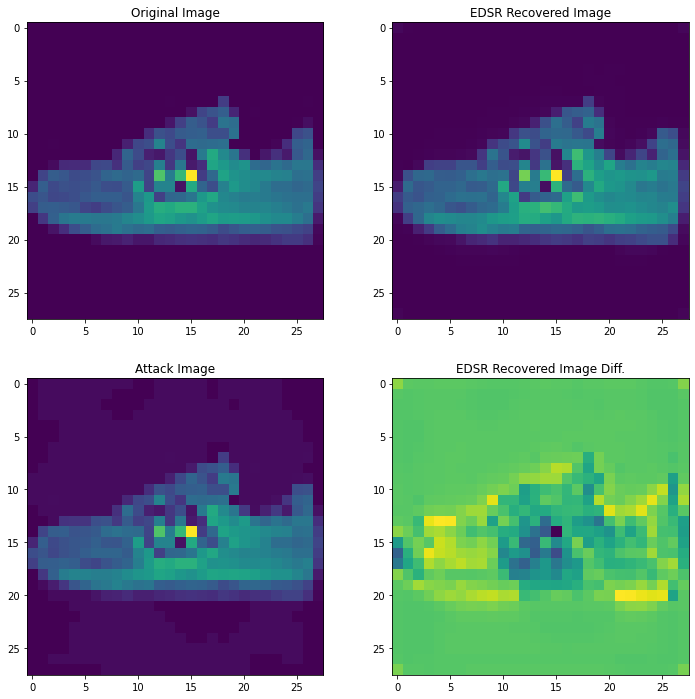

In [ ]:
#@title Grad Plot a Few examples { form-width: "20%" }

idx = 41

print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))

ax[0][0].set_title("Original Image")
ax[0][0].imshow((grad_attack_transform_im_devset.label[idx]))
print(np.max(grad_attack_transform_im_devset.label[idx]))

ax[1][0].set_title("Attack Image")
ax[1][0].imshow((grad_attack_transform_im_devset.data[idx]))
print(np.max(grad_attack_transform_im_devset.data[idx]))

example = torch.from_numpy(grad_attack_transform_im_devset.data[idx])
example = torch.unsqueeze(example,0)
example = torch.unsqueeze(example,0)

ax[0][1].set_title("EDSR Recovered Image")
temp = grad_edsr_transform(example.to(device))
temp = temp.to("cpu")
temp = torch.squeeze(temp)
temp = temp.detach().numpy()
ax[0][1].imshow(temp)
print(np.max(temp))

ax[1][1].set_title("EDSR Recovered Image Diff.")
ax[1][1].imshow(temp - grad_attack_transform_im_devset.label[idx])
print(np.max(temp - grad_attack_transform_im_devset.label[idx]))

In [ ]:
#@title Test EDSR Gradient Denoiser { form-width: "20%" }

print(f'Baselines - FF: {baseline_ff_transform}, CNN: {baseline_cnn_transform}, Comp.: {baseline_comp_transform}')

print("\nFGSM")
print(f'FF test accuracy: {test(mnist_ff_transform,mnist_ff_fgsm_devloader,denoiser=grad_edsr_transform)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn_transform,mnist_cnn_fgsm_devloader,denoiser=grad_edsr_transform)[0]}')
print(f'Composite test accuracy: {test(mnist_comp_transform,mnist_comp_fgsm_devloader,denoiser=grad_edsr_transform)[0]}')

print("\nPGD")
print(f'FF test accuracy: {test(mnist_ff_transform,mnist_ff_pgd_devloader,denoiser=grad_edsr_transform)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn_transform,mnist_cnn_pgd_devloader,denoiser=grad_edsr_transform)[0]}')
print(f'Composite test accuracy: {test(mnist_comp_transform,mnist_comp_pgd_devloader,denoiser=grad_edsr_transform)[0]}')

print("\nBIM Undefended")
print(f'FF test accuracy: {test(mnist_ff_transform,mnist_ff_bim_devloader,denoiser=None)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn_transform,mnist_cnn_bim_devloader,denoiser=None)[0]}')
print(f'Composite test accuracy: {test(mnist_comp_transform,mnist_comp_bim_devloader,denoiser=None)[0]}')

print("\nBIM")
print(f'FF test accuracy: {test(mnist_ff_transform,mnist_ff_bim_devloader,denoiser=grad_edsr_transform)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn_transform,mnist_cnn_bim_devloader,denoiser=grad_edsr_transform)[0]}')
print(f'Composite test accuracy: {test(mnist_comp_transform,mnist_comp_bim_devloader,denoiser=grad_edsr_transform)[0]}')

print("\nShuffled")
print(f'FF test accuracy: {test(mnist_ff_transform,grad_attack_devloader,denoiser=grad_edsr_transform)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn_transform,grad_attack_devloader,denoiser=grad_edsr_transform)[0]}')
print(f'Composite test accuracy: {test(mnist_comp_transform,grad_attack_devloader,denoiser=grad_edsr_transform)[0]}')

Baselines - FF: 0.768, CNN: 0.7565, Comp.: 0.8295

FGSM
FF test accuracy: 0.7508333333333334
CNN test accuracy: 0.7375
Composite test accuracy: 0.8241666666666667

PGD
FF test accuracy: 0.6808333333333333
CNN test accuracy: 0.7041666666666667
Composite test accuracy: 0.7283333333333334

BIM Undefended
FF test accuracy: 0.32416666666666666
CNN test accuracy: 0.6075
Composite test accuracy: 0.53

BIM
FF test accuracy: 0.4975
CNN test accuracy: 0.6783333333333333
Composite test accuracy: 0.6925

Shuffled
FF test accuracy: 0.7015740740740741
CNN test accuracy: 0.7013888888888888
Composite test accuracy: 0.7609259259259259


sneaker: 7
1.0
1.0
0.9020401
0.11465068


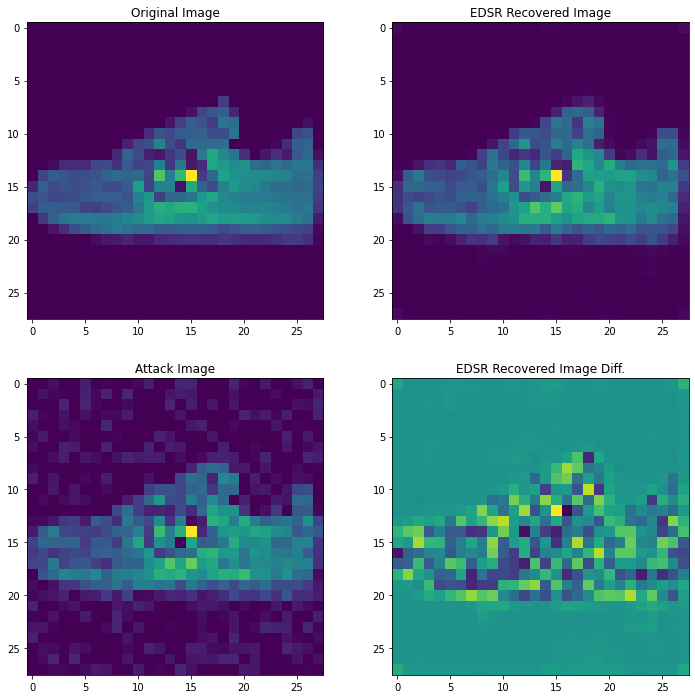

In [ ]:
#@title Plot a Few examples { form-width: "20%" }

idx = 41

print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))

ax[0][0].set_title("Original Image")
ax[0][0].imshow((rand_attack_im_devset.label[idx]))
print(np.max(rand_attack_im_devset.label[idx]))

ax[1][0].set_title("Attack Image")
ax[1][0].imshow((rand_attack_im_devset.data[idx]))
print(np.max(rand_attack_im_devset.data[0]))

example = torch.from_numpy(rand_attack_im_devset.data[idx]).float()
example = torch.unsqueeze(example,0)
example = torch.unsqueeze(example,0)

ax[0][1].set_title("EDSR Recovered Image")
temp = rand_edsr_transform(example.to(device))
temp = temp.to("cpu")
temp = torch.squeeze(temp)
temp = temp.detach().numpy()
ax[0][1].imshow(temp)
print(np.max(temp))

ax[1][1].set_title("EDSR Recovered Image Diff.")
ax[1][1].imshow(temp-rand_attack_im_devset.label[idx])
print(np.max(temp-rand_attack_im_devset.label[idx]))

# Adversary Training

In [ ]:
#@title Adversary Trainloader Train, test loop { form-width: "20%" }

from adversary_training import *

In [ ]:
#@title Adver. mnist_ff { form-width: "20%" }
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mnist_ff_adver = FF(in_flat_dim=28*28*1,up1=3,out_dim=10,h1=1000,h2=100)
mnist_ff_adver.to(device)
optimizer = torch.optim.Adam(mnist_ff_adver.parameters(),lr=0.00001)

SAVE_PATH = PATH + 'mnist_ff_adver.pth'
if os.path.isfile(SAVE_PATH):
  mnist_ff_adver.load_state_dict(torch.load(SAVE_PATH))
else:
  train_adver(mnist_ff_adver,optimizer,mnist_trainloader,"mnist_ff_adver",epoch=30,
        plot=True,devloader=mnist_devloader,adversary=True)

baseline_ff_adver = test(mnist_ff_adver,mnist_testloader)[0]
print(baseline_ff_adver)

print(test(mnist_ff_adver,grad_attack_testloader)[0])

0.843
0.7189444444444445


In [ ]:
#@title Adver. mnist_cnn { form-width: "20%" }
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mnist_cnn_adver = CNN(
    up1=3,out_dim=10,chan1=128,chan2=64,chan3=32,k1=17,k2=9,k3=3,p12=2,color=1)
mnist_cnn_adver.to(device)
optimizer = torch.optim.Adam(mnist_cnn_adver.parameters(),lr=0.00001,weight_decay=1e-5)

SAVE_PATH = PATH + 'mnist_cnn_adver.pth'
if os.path.isfile(SAVE_PATH):
  mnist_cnn_adver.load_state_dict(torch.load(SAVE_PATH))
else:
  train_adver(mnist_cnn_adver,optimizer,mnist_trainloader,"mnist_cnn_adver",epoch=30,
        plot=True,devloader=mnist_devloader,adversary=True)

baseline_cnn_adver = test(mnist_cnn_adver,mnist_testloader)[0]
print(baseline_cnn_adver)

print(test(mnist_cnn_adver,grad_attack_testloader)[0])

0.6345
0.5710555555555555


In [ ]:
#@title Adver. object_composite { form-width: "20%" }
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mnist_comp_adver = composite(up1=8,out_dim=10,chan1=100,chan2=60,chan3=40,k1=25,k2=17,k3=7,
                   h4=100,h5=100,p12=4,p23=3,color=1)
mnist_comp_adver.to(device)
optimizer = torch.optim.Adam(mnist_comp_adver.parameters(),lr=0.00001)

SAVE_PATH = PATH + 'mnist_comp_adver.pth'
if os.path.isfile(SAVE_PATH):
  mnist_comp_adver.load_state_dict(torch.load(SAVE_PATH))
else:
  train_adver(mnist_comp_adver,optimizer,mnist_trainloader,"mnist_comp_adver",epoch=30,plot=True,
        devloader=mnist_devloader,adversary=True)

baseline_comp_adver = test(mnist_comp_adver,mnist_testloader)[0]
print(baseline_comp_adver)

print(test(mnist_comp_adver,grad_attack_testloader)[0])

0.806
0.7126666666666667


In [ ]:
#@title
print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')

print(f'FF test accuracy: {test(mnist_ff,rand_attack_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,rand_attack_testloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,rand_attack_testloader)[0]}')

print('\nTransform-trained Classifiers')
print(f'FF test accuracy: {test(mnist_ff_adver,rand_attack_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn_adver,rand_attack_testloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp_adver,rand_attack_testloader)[0]}')

Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.716
CNN test accuracy: 0.39175
Composite test accuracy: 0.694625

Transform-trained Classifiers
FF test accuracy: 0.75875
CNN test accuracy: 0.593
Composite test accuracy: 0.751125


In [ ]:
#@title
print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')

print(f'FF test accuracy: {test(mnist_ff,mnist_ff_simba_devloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_simba_devloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_simba_devloader)[0]}')

print('\nTransform-trained Classifiers')
print(f'FF test accuracy: {test(mnist_ff_adver,mnist_ff_simba_devloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn_adver,mnist_cnn_simba_devloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp_adver,mnist_comp_simba_devloader)[0]}')

Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.7025
CNN test accuracy: 0.3433333333333333
Composite test accuracy: 0.7041666666666667

Transform-trained Classifiers
FF test accuracy: 0.7516666666666667
CNN test accuracy: 0.61
Composite test accuracy: 0.7708333333333334


In [ ]:
#@title Grad. { form-width: "20%" }

print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')
print(f'FF test accuracy: {test(mnist_ff,grad_attack_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,grad_attack_testloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,grad_attack_testloader)[0]}')

print('\nTransform-trained Classifiers')
print(f'FF transforms test accuracy: {test(mnist_ff_adver,grad_attack_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(mnist_cnn_adver,grad_attack_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(mnist_comp_adver,grad_attack_testloader)[0]}')

Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.6636666666666666
CNN test accuracy: 0.35788888888888887
Composite test accuracy: 0.6168333333333333

Transform-trained Classifiers
FF transforms test accuracy: 0.7189444444444445
CNN transforms test accuracy: 0.5710555555555555
Composite transforms test accuracy: 0.7126666666666667


In [ ]:
#@title Grad. { form-width: "20%" }

print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')
print(f'FF test accuracy: {test(mnist_ff,mnist_ff_bim_devloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_bim_devloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_bim_devloader)[0]}')

print('\nTransform-trained Classifiers')
print(f'FF transforms test accuracy: {test(mnist_ff_adver,mnist_ff_bim_devloader)[0]}')
print(f'CNN transforms test accuracy: {test(mnist_cnn_adver,mnist_cnn_bim_devloader)[0]}')
print(f'Composite transforms test accuracy: {test(mnist_comp_adver,mnist_comp_bim_devloader)[0]}')

Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.29333333333333333
CNN test accuracy: 0.15333333333333332
Composite test accuracy: 0.38333333333333336

Transform-trained Classifiers
FF transforms test accuracy: 0.33
CNN transforms test accuracy: 0.5216666666666666
Composite transforms test accuracy: 0.57


# RAIN

In [ ]:
#@title RDM_DS & RDM_CS & Upsample & SR Preprocessing
from rain import *

sneaker: 7
x_raw: (43200, 28, 28)
y_raw(43200,)
x_devraw: (4800, 28, 28)
y_devraw: (4800,)
x_test_raw: (8000, 28, 28)
y_test_raw: (8000,)
RAIN Random Downsample
rain_raw: (37334, 14, 14)
rain_x_raw: (43200, 28, 28)
rain_devraw: (4800, 14, 14)
rain_test_raw: (8000, 14, 14)
RAIN Random Shift
rain_raw: (37334, 14, 14)
rain_devraw: (4800, 14, 14)
rain_im_raw: (37334, 28, 28)
rain_im_devraw: (4800, 28, 28)
rain_test_raw: (8000, 14, 14)
rain_im_test_raw: (8000, 28, 28)
RAIN Upsample
rain_raw: (37334, 28, 28)
rain_devraw: (4800, 28, 28)
rain_test_raw: (8000, 28, 28)
Train SR Net
(37334, 28, 28)
(4800, 28, 28)
rain_raw: (37334, 28, 28)
rain_devraw: (4800, 28, 28)
rain_test_raw: (8000, 28, 28)


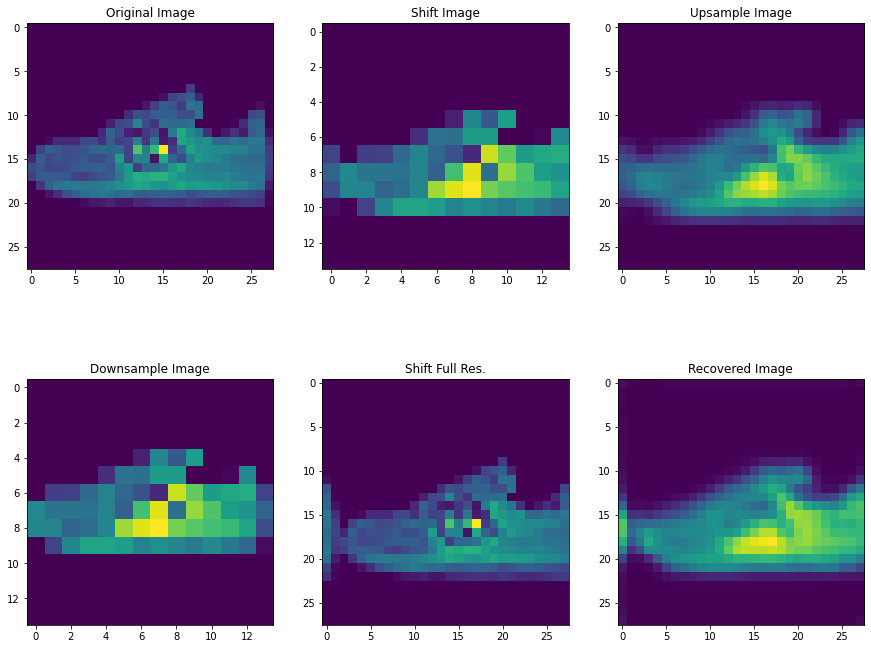

In [ ]:
#@title Visualize and make RAIN_set { form-width: "20%" }
idx = 41
  
rain_sr_net = EDSR(scale=1,n_resblocks=4)
rain_sr_net.to(device)
optimizer = torch.optim.Rprop(rain_sr_net.parameters(),lr=0.000001)
criterion = nn.MSELoss()

SAVE_PATH = PATH + 'PRINT_ALWAYS'
if os.path.isfile(SAVE_PATH):
  SAVE_PATH = PATH + 'rain_sr_net.pth'
  rain_sr_net.load_state_dict(torch.load(SAVE_PATH))

  SAVE_PATH = PATH + 'rain_raw' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    rain_raw = np.load(f) 
  SAVE_PATH = PATH + 'rain_y_raw' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    rain_y_raw = np.load(f) 
  SAVE_PATH = PATH + 'rain_devraw' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    rain_devraw = np.load(f) 
  SAVE_PATH = PATH + 'rain_y_devraw' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    rain_y_devraw = np.load(f) 
  SAVE_PATH = PATH + 'rain_x_test_raw' + '.npy'  
  with open(SAVE_PATH, 'rb') as f:
    rain_x_test_raw = np.load(f) 
  SAVE_PATH = PATH + 'rain_y_test_raw' + '.npy'
  with open(SAVE_PATH, 'rb') as f:
    rain_y_test_raw = np.load(f) 
else:

  print(mnist_classes[mnist_y["dev"][idx]] + ": " + str(mnist_y["dev"][idx]))
  fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(15,12))
  
  ax[0][0].set_title("Original Image")
  ax[0][0].imshow((mnist_x["dev"][idx]))

  temp_orig = (mnist_x["train"])
  temp_rand = (rand_attack_x_train_raw[1*mnist_x["train"].shape[0]:])
  temp_grad = (grad_attack_x_train_raw[6*mnist_x["train"].shape[0]:])
  temp_tran = (transform_attack_x_train_raw)

  temp_orig = temp_orig
  temp_rand = temp_rand[0::3]
  temp_grad = temp_grad[0::3]
  temp_tran = temp_tran[0::7]

  rain_x_raw = [temp_orig, temp_rand, temp_grad, temp_tran]
  rain_x_raw = np.vstack(rain_x_raw)
  print("x_raw: " + str(rain_x_raw.shape))

  temp_orig = (mnist_y["train"])
  temp_rand = (rand_attack_y_train_raw[1*mnist_y["train"].shape[0]:])
  temp_grad = (grad_attack_y_train_raw[6*mnist_y["train"].shape[0]:])
  temp_tran = (transform_attack_y_train_raw)

  temp_orig = temp_orig
  temp_rand = temp_rand[0::3]
  temp_grad = temp_grad[0::3]
  temp_tran = temp_tran[0::7]

  rain_y_raw = [temp_orig, temp_rand, temp_grad, temp_tran]
  rain_y_raw = np.hstack(rain_y_raw)
  print("y_raw" + str(rain_y_raw.shape))

  temp_orig = (mnist_x["dev"])
  temp_rand = (rand_attack_x_devraw[1*mnist_x["dev"].shape[0]:])
  temp_grad = (grad_attack_x_devraw[6*mnist_x["dev"].shape[0]:])
  temp_tran = (transform_attack_x_devraw)

  temp_orig = temp_orig
  temp_rand = temp_rand[0::3]
  temp_grad = temp_grad[0::3]
  temp_tran = temp_tran[0::7]

  rain_x_devraw = [temp_orig, temp_rand, temp_grad, temp_tran]
  rain_x_devraw = np.vstack(rain_x_devraw)
  print("x_devraw: " + str(rain_x_devraw.shape))

  temp_orig = (mnist_y["dev"])
  temp_rand = (rand_attack_y_devraw[1*mnist_y["dev"].shape[0]:])
  temp_grad = (grad_attack_y_devraw[6*mnist_y["dev"].shape[0]:])
  temp_tran = (transform_attack_y_devraw)

  temp_orig = temp_orig
  temp_rand = temp_rand[0::3]
  temp_grad = temp_grad[0::3]
  temp_tran = temp_tran[0::7]

  rain_y_devraw = [temp_orig, temp_rand, temp_grad, temp_tran]
  rain_y_devraw = np.hstack(rain_y_devraw)
  print("y_devraw: " + str(rain_y_devraw.shape))

  temp_orig = (mnist_x["test"])
  temp_rand = (rand_attack_x_test_raw[1*mnist_x["test"].shape[0]:])
  temp_grad = (grad_attack_x_test_raw[6*mnist_x["test"].shape[0]:])
  temp_tran = (transform_attack_x_test_raw)

  temp_orig = temp_orig
  temp_rand = temp_rand[0::3]
  temp_grad = temp_grad[0::3]
  temp_tran = temp_tran[0::7]

  rain_x_test_raw = [temp_orig, temp_rand, temp_grad, temp_tran]
  rain_x_test_raw = np.vstack(rain_x_test_raw)
  print("x_test_raw: " + str(rain_x_test_raw.shape))

  temp_orig = (mnist_y["test"])
  temp_rand = (rand_attack_y_test_raw[1*mnist_y["test"].shape[0]:])
  temp_grad = (grad_attack_y_test_raw[6*mnist_y["test"].shape[0]:])
  temp_tran = (transform_attack_y_test_raw)

  temp_orig = temp_orig
  temp_rand = temp_rand[0::3]
  temp_grad = temp_grad[0::3]
  temp_tran = temp_tran[0::7]

  rain_y_test_raw = [temp_orig, temp_rand, temp_grad, temp_tran]
  rain_y_test_raw = np.hstack(rain_y_test_raw)
  print("y_test_raw: " + str(rain_y_test_raw.shape))

  print("RAIN Random Downsample")

  SAVE_PATH = PATH + 'rain_raw_rdm_down' + '.npy'
  if os.path.isfile(SAVE_PATH):
    with open(SAVE_PATH, 'rb') as f:
      rain_raw = np.load(f)
    SAVE_PATH = PATH + 'rain_devraw_rdm_down' + '.npy'
    with open(SAVE_PATH, 'rb') as f:
      rain_devraw = np.load(f)
  else: 
    rain_raw = rdm_down(rain_x_raw)
    rain_devraw = rdm_down(rain_x_devraw)
    with open(PATH + 'rain_raw_rdm_down' + '.npy', 'wb') as f:
      np.save(f, np.array(rain_raw))
    with open(PATH + 'rain_devraw_rdm_down' + '.npy', 'wb') as f:
      np.save(f, np.array(rain_devraw))

  SAVE_PATH = PATH + 'rain_test_raw_rdm_down' + '.npy'
  if os.path.isfile(SAVE_PATH):
    with open(SAVE_PATH, 'rb') as f:
      rain_test_raw = np.load(f)
  else: 
    rain_test_raw = rdm_down(rain_x_test_raw)
    with open(PATH + 'rain_test_raw_rdm_down' + '.npy', 'wb') as f:
      np.save(f, np.array(rain_test_raw))


  print("rain_raw: " + str(rain_raw.shape))
  print("rain_x_raw: " + str(rain_x_raw.shape))
  print("rain_devraw: " + str(rain_devraw.shape))
  print("rain_test_raw: " + str(rain_test_raw.shape))

  ax[1][0].set_title("Downsample Image")
  ax[1][0].imshow(rain_devraw[idx])

  print("RAIN Random Shift")

  SAVE_PATH = PATH + 'rain_raw_rdm_shift' + '.npy'
  if os.path.isfile(SAVE_PATH):
    with open(SAVE_PATH, 'rb') as f:
      rain_raw = np.load(f)
    SAVE_PATH = PATH + 'rain_devraw_rdm_shift' + '.npy'
    with open(SAVE_PATH, 'rb') as f:
      rain_devraw = np.load(f)
    SAVE_PATH = PATH + 'rain_im_raw_rdm_shift' + '.npy'
    with open(SAVE_PATH, 'rb') as f:
      rain_im_raw = np.load(f)
    SAVE_PATH = PATH + 'rain_im_devraw_rdm_shift' + '.npy'
    with open(SAVE_PATH, 'rb') as f:
      rain_im_devraw = np.load(f)
  else: 
    rain_raw,rain_im_raw = rdm_shift(rain_raw,rain_x_raw)
    rain_devraw,rain_im_devraw = rdm_shift(rain_devraw,rain_x_devraw)
    with open(PATH + 'rain_raw_rdm_shift' + '.npy', 'wb') as f:
      np.save(f, np.array(rain_raw))
    with open(PATH + 'rain_devraw_rdm_shift' + '.npy', 'wb') as f:
      np.save(f, np.array(rain_devraw))
    with open(PATH + 'rain_im_raw_rdm_shift' + '.npy', 'wb') as f:
      np.save(f, np.array(rain_im_raw))
    with open(PATH + 'rain_im_devraw_rdm_shift' + '.npy', 'wb') as f:
      np.save(f, np.array(rain_im_devraw))

  SAVE_PATH = PATH + 'rain_test_raw_rdm_shift' + '.npy'
  if os.path.isfile(SAVE_PATH):
    with open(SAVE_PATH, 'rb') as f:
      rain_test_raw = np.load(f)
    SAVE_PATH = PATH + 'rain_im_test_raw_rdm_shift' + '.npy'
    with open(SAVE_PATH, 'rb') as f:
      rain_im_test_raw = np.load(f)
  else: 
    rain_test_raw,rain_im_test_raw = rdm_shift(rain_test_raw,rain_x_test_raw)
    with open(PATH + 'rain_test_raw_rdm_shift' + '.npy', 'wb') as f:
      np.save(f, np.array(rain_test_raw))
    with open(PATH + 'rain_im_test_raw_rdm_shift' + '.npy', 'wb') as f:
      np.save(f, np.array(rain_im_test_raw))

  print("rain_raw: " + str(rain_raw.shape))
  print("rain_devraw: " + str(rain_devraw.shape))
  print("rain_im_raw: " + str(rain_im_raw.shape))
  print("rain_im_devraw: " + str(rain_im_devraw.shape))
  print("rain_test_raw: " + str(rain_test_raw.shape))
  print("rain_im_test_raw: " + str(rain_im_test_raw.shape))

  ax[0][1].set_title("Shift Image")
  ax[0][1].imshow(rain_devraw[idx])

  ax[1][1].set_title("Shift Full Res.")
  ax[1][1].imshow(rain_im_devraw[idx])

  print("RAIN Upsample")

  SAVE_PATH = PATH + 'rain_raw_upsample' + '.npy'
  if os.path.isfile(SAVE_PATH):
    with open(SAVE_PATH, 'rb') as f:
      rain_raw = np.load(f)
    SAVE_PATH = PATH + 'rain_devraw_upsample' + '.npy'
    with open(SAVE_PATH, 'rb') as f:
      rain_devraw = np.load(f)
  else: 
    rain_raw = sr_upsample(rain_raw)
    rain_devraw = sr_upsample(rain_devraw)
    with open(PATH + 'rain_raw_upsample' + '.npy', 'wb') as f:
      np.save(f, np.array(rain_raw))
    with open(PATH + 'rain_devraw_upsample' + '.npy', 'wb') as f:
      np.save(f, np.array(rain_devraw))

  SAVE_PATH = PATH + 'rain_test_raw_upsample' + '.npy'
  if os.path.isfile(SAVE_PATH):
    with open(SAVE_PATH, 'rb') as f:
      rain_test_raw = np.load(f)
  else: 
    rain_test_raw = sr_upsample(rain_test_raw)
    with open(PATH + 'rain_test_raw_upsample' + '.npy', 'wb') as f:
      np.save(f, np.array(rain_test_raw))

  print("rain_raw: " + str(rain_raw.shape))
  print("rain_devraw: " + str(rain_devraw.shape))
  print("rain_test_raw: " + str(rain_test_raw.shape))

  ax[0][2].set_title("Upsample Image")
  ax[0][2].imshow(rain_devraw[idx])

  print("Train SR Net")
  print(rain_im_raw.shape)
  print(rain_im_devraw.shape)

  rain_im_raw = rain_im_raw.astype(np.float32)
  rain_sr_trainset = ImageDataset(rain_raw,rain_im_raw)
  rain_sr_trainloader = DataLoader(rain_sr_trainset,10,shuffle=True)

  rain_im_devraw = rain_im_devraw.astype(np.float32)
  rain_sr_devset = ImageDataset(rain_devraw,rain_im_devraw)
  rain_sr_devloader = DataLoader(rain_sr_devset,10,shuffle=True)

  SAVE_PATH = PATH + 'rain_sr_net.pth'
  if os.path.isfile(SAVE_PATH):
    rain_sr_net.load_state_dict(torch.load(SAVE_PATH))
  else:
    train(rain_sr_net,optimizer,rain_sr_trainloader,"rain_sr_net",epoch=50,
        loss_fcn=criterion,clip=True,plot=True,devloader=rain_sr_devloader)

  SAVE_PATH = PATH + 'rain_raw_sr_upsample' + '.npy'
  if os.path.isfile(SAVE_PATH):
    with open(SAVE_PATH, 'rb') as f:
      rain_raw = np.load(f)
    SAVE_PATH = PATH + 'rain_devraw_sr_upsample' + '.npy'
    with open(SAVE_PATH, 'rb') as f:
      rain_devraw = np.load(f)
  else: 
    rain_raw = rain_sr_batch(rain_sr_net,rain_raw,50)
    rain_devraw = rain_sr_batch(rain_sr_net,rain_devraw,50)
    with open(PATH + 'rain_raw_sr_upsample' + '.npy', 'wb') as f:
      np.save(f, np.array(rain_raw))
    with open(PATH + 'rain_devraw_sr_upsample' + '.npy', 'wb') as f:
      np.save(f, np.array(rain_devraw))

  SAVE_PATH = PATH + 'rain_test_raw_sr_upsample' + '.npy'
  if os.path.isfile(SAVE_PATH):
    with open(SAVE_PATH, 'rb') as f:
      rain_test_raw = np.load(f)
  else: 
    rain_test_raw = rain_sr_batch(rain_sr_net,rain_test_raw,50)
    with open(PATH + 'rain_test_raw_sr_upsample' + '.npy', 'wb') as f:
      np.save(f, np.array(rain_test_raw))

  print("rain_raw: " + str(rain_raw.shape))
  print("rain_devraw: " + str(rain_devraw.shape))
  print("rain_test_raw: " + str(rain_test_raw.shape))

  ax[1][2].set_title("Recovered Image")
  ax[1][2].imshow(rain_devraw[idx])

  with open(PATH + 'rain_raw' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_raw))
  with open(PATH + 'rain_y_raw' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_y_raw))
  with open(PATH + 'rain_devraw' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_devraw))
  with open(PATH + 'rain_y_devraw' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_y_devraw))  
  with open(PATH + 'rain_x_test_raw' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_test_raw))
  with open(PATH + 'rain_y_test_raw' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_y_test_raw))  

rain_trainset = ImageDataset(rain_raw,rain_y_raw)
rain_trainloader = DataLoader(rain_trainset,50,shuffle=True)

rain_devset = ImageDataset(rain_devraw,rain_y_devraw)
rain_devloader = DataLoader(rain_devset,50,shuffle=True)

rain_testset = ImageDataset(rain_test_raw,rain_y_test_raw)
rain_testloader = DataLoader(rain_testset,50,shuffle=True)


In [ ]:
#@title
SAVE_PATH = PATH + 'rain_rp.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    rain_rp = np.load(f) 
else:
  rain_rp = rain_pre_process(test_mnist_x_rp)
  with open(PATH + 'rain_rp' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_rp))

rain_rp_testset = ImageDataset(rain_rp,mnist_y["test"])
rain_rp_testloader = DataLoader(rain_rp_testset,50,shuffle=True)

SAVE_PATH = PATH + 'rain_test_mnist_x_simba_ff.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    rain_test_mnist_x_simba_ff = np.load(f) 
else:
  rain_test_mnist_x_simba_ff = rain_pre_process(test_mnist_x_simba_ff)
  with open(PATH + 'rain_test_mnist_x_simba_ff' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_test_mnist_x_simba_ff))

SAVE_PATH = PATH + 'rain_test_mnist_x_simba_cnn.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    rain_test_mnist_x_simba_cnn = np.load(f) 
else:
  rain_test_mnist_x_simba_cnn = rain_pre_process(test_mnist_x_simba_cnn)
  with open(PATH + 'rain_test_mnist_x_simba_cnn' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_test_mnist_x_simba_cnn))

SAVE_PATH = PATH + 'rain_test_mnist_x_simba_comp.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    rain_test_mnist_x_simba_comp = np.load(f) 
else:
  rain_test_mnist_x_simba_comp = rain_pre_process(test_mnist_x_simba_comp)
  with open(PATH + 'rain_test_mnist_x_simba_comp' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_test_mnist_x_simba_comp))

rain_simba_x = [rain_test_mnist_x_simba_ff,rain_test_mnist_x_simba_cnn,rain_test_mnist_x_simba_comp]
rain_simba_x = np.vstack(rain_simba_x)
rain_simba_y = [mnist_y["test"],mnist_y["test"],mnist_y["test"]]
rain_simba_y = np.hstack(rain_simba_y)

rain_simba_testset = ImageDataset(rain_simba_x,rain_simba_y)
rain_simba_testloader = DataLoader(rain_simba_testset,50,shuffle=True)

In [ ]:
#@title
SAVE_PATH = PATH + 'rain_test_mnist_x_fgsm_ff.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    rain_test_mnist_x_fgsm_ff = np.load(f) 
else:
  rain_test_mnist_x_fgsm_ff = rain_pre_process(test_mnist_x_fgsm_ff)
  with open(PATH + 'rain_test_mnist_x_fgsm_ff' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_test_mnist_x_fgsm_ff))

SAVE_PATH = PATH + 'rain_test_mnist_x_fgsm_cnn.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    rain_test_mnist_x_fgsm_cnn = np.load(f) 
else:
  rain_test_mnist_x_fgsm_cnn = rain_pre_process(test_mnist_x_fgsm_cnn)
  with open(PATH + 'rain_test_mnist_x_fgsm_cnn' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_test_mnist_x_fgsm_cnn))

SAVE_PATH = PATH + 'rain_test_mnist_x_fgsm_comp.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    rain_test_mnist_x_fgsm_comp = np.load(f) 
else:
  rain_test_mnist_x_fgsm_comp = rain_pre_process(test_mnist_x_fgsm_comp)
  with open(PATH + 'rain_test_mnist_x_fgsm_comp' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_test_mnist_x_fgsm_comp))

rain_fgsm_x = [rain_test_mnist_x_fgsm_ff,rain_test_mnist_x_fgsm_cnn,rain_test_mnist_x_fgsm_comp]
rain_fgsm_x = np.vstack(rain_fgsm_x)
rain_fgsm_y = [mnist_y["test"],mnist_y["test"],mnist_y["test"]]
rain_fgsm_y = np.hstack(rain_fgsm_y)

rain_fgsm_testset = ImageDataset(rain_fgsm_x,rain_fgsm_y)
rain_fgsm_testloader = DataLoader(rain_fgsm_testset,50,shuffle=True)


SAVE_PATH = PATH + 'rain_test_mnist_x_pgd_ff.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    rain_test_mnist_x_pgd_ff = np.load(f) 
else:
  rain_test_mnist_x_pgd_ff = rain_pre_process(test_mnist_x_pgd_ff)
  with open(PATH + 'rain_test_mnist_x_pgd_ff' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_test_mnist_x_pgd_ff))

SAVE_PATH = PATH + 'rain_test_mnist_x_pgd_cnn.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    rain_test_mnist_x_pgd_cnn = np.load(f) 
else:
  rain_test_mnist_x_pgd_cnn = rain_pre_process(test_mnist_x_pgd_cnn)
  with open(PATH + 'rain_test_mnist_x_pgd_cnn' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_test_mnist_x_pgd_cnn))

SAVE_PATH = PATH + 'rain_test_mnist_x_pgd_comp.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    rain_test_mnist_x_pgd_comp = np.load(f) 
else:
  rain_test_mnist_x_pgd_comp = rain_pre_process(test_mnist_x_pgd_comp)
  with open(PATH + 'rain_test_mnist_x_pgd_comp' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_test_mnist_x_pgd_comp))

rain_pgd_x = [rain_test_mnist_x_pgd_ff,rain_test_mnist_x_pgd_cnn,rain_test_mnist_x_pgd_comp]
rain_pgd_x = np.vstack(rain_pgd_x)
rain_pgd_y = [mnist_y["test"],mnist_y["test"],mnist_y["test"]]
rain_pgd_y = np.hstack(rain_pgd_y)

rain_pgd_testset = ImageDataset(rain_pgd_x,rain_pgd_y)
rain_pgd_testloader = DataLoader(rain_pgd_testset,50,shuffle=True)

SAVE_PATH = PATH + 'rain_test_mnist_x_bim_ff.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    rain_test_mnist_x_bim_ff = np.load(f) 
else:
  rain_test_mnist_x_bim_ff = rain_pre_process(test_mnist_x_bim_ff)
  with open(PATH + 'rain_test_mnist_x_bim_ff' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_test_mnist_x_bim_ff))

SAVE_PATH = PATH + 'rain_test_mnist_x_bim_cnn.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    rain_test_mnist_x_bim_cnn = np.load(f) 
else:
  rain_test_mnist_x_bim_cnn = rain_pre_process(test_mnist_x_bim_cnn)
  with open(PATH + 'rain_test_mnist_x_bim_cnn' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_test_mnist_x_bim_cnn))

SAVE_PATH = PATH + 'rain_test_mnist_x_bim_comp.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    rain_test_mnist_x_bim_comp = np.load(f) 
else:
  rain_test_mnist_x_bim_comp = rain_pre_process(test_mnist_x_bim_comp)
  with open(PATH + 'rain_test_mnist_x_bim_comp' + '.npy', 'wb') as f:
    np.save(f, np.array(rain_test_mnist_x_bim_comp))

rain_bim_x = [rain_test_mnist_x_bim_ff,rain_test_mnist_x_bim_cnn,rain_test_mnist_x_bim_comp]
rain_bim_x = np.vstack(rain_bim_x)
rain_bim_y = [mnist_y["test"],mnist_y["test"],mnist_y["test"]]
rain_bim_y = np.hstack(rain_bim_y)

rain_bim_testset = ImageDataset(rain_bim_x,rain_bim_y)
rain_bim_testloader = DataLoader(rain_bim_testset,50,shuffle=True)

# RAIN Eval

In [ ]:
#@title
rain_orig_testset = ImageDataset(rain_test_raw[0:mnist_x["test"].shape[0]],
                                 rain_y_test_raw[0:mnist_y["test"].shape[0]])
rain_orig_testloader = DataLoader(rain_orig_testset,50,shuffle=True)

rain_rand_testset = ImageDataset(rain_test_raw[mnist_x["test"].shape[0]:2*mnist_x["test"].shape[0]],
                                 rain_y_test_raw[mnist_y["test"].shape[0]:2*mnist_y["test"].shape[0]])
rain_rand_testloader = DataLoader(rain_rand_testset,50,shuffle=True)

rain_grad_testset = ImageDataset(rain_test_raw[2*mnist_x["test"].shape[0]:3*mnist_x["test"].shape[0]],
                                 rain_y_test_raw[2*mnist_y["test"].shape[0]:3*mnist_y["test"].shape[0]])
rain_grad_testloader = DataLoader(rain_grad_testset,50,shuffle=True)

rain_tran_testset = ImageDataset(rain_test_raw[3*mnist_x["test"].shape[0]:4*mnist_x["test"].shape[0]],
                                 rain_y_test_raw[3*mnist_y["test"].shape[0]:4*mnist_y["test"].shape[0]])
rain_tran_testloader = DataLoader(rain_tran_testset,50,shuffle=True)





In [ ]:
#@title
print(rain_orig_testset.data.shape)
print(rain_rand_testset.data.shape)
print(rain_grad_testset.data.shape)
print(rain_tran_testset.data.shape)

(2000, 28, 28)
(2000, 28, 28)
(2000, 28, 28)
(2000, 28, 28)


In [ ]:
#@title
print('RAIN on Classifiers Overall')
print(f'FF transforms test accuracy: {test(mnist_ff,rain_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(mnist_cnn,rain_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(mnist_comp,rain_testloader)[0]}')

print('\nRAIN on Classifiers Orig')
print(f'FF transforms test accuracy: {test(mnist_ff,rain_orig_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(mnist_cnn,rain_orig_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(mnist_comp,rain_orig_testloader)[0]}')

print('\nRAIN on Classifiers Rand')
print(f'FF transforms test accuracy: {test(mnist_ff,rain_rand_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(mnist_cnn,rain_rand_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(mnist_comp,rain_rand_testloader)[0]}')

print('\nRAIN on Classifiers Grad')
print(f'FF transforms test accuracy: {test(mnist_ff,rain_grad_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(mnist_cnn,rain_grad_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(mnist_comp,rain_grad_testloader)[0]}')

print('\nRAIN on Classifiers Transform')
print(f'FF transforms test accuracy: {test(mnist_ff,rain_tran_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(mnist_cnn,rain_tran_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(mnist_comp,rain_tran_testloader)[0]}')

RAIN on Classifiers Overall
FF transforms test accuracy: 0.269875
CNN transforms test accuracy: 0.257625
Composite transforms test accuracy: 0.366125

RAIN on Classifiers Orig
FF transforms test accuracy: 0.313
CNN transforms test accuracy: 0.292
Composite transforms test accuracy: 0.424

RAIN on Classifiers Rand
FF transforms test accuracy: 0.2685
CNN transforms test accuracy: 0.2605
Composite transforms test accuracy: 0.3825

RAIN on Classifiers Grad
FF transforms test accuracy: 0.237
CNN transforms test accuracy: 0.244
Composite transforms test accuracy: 0.3175

RAIN on Classifiers Transform
FF transforms test accuracy: 0.261
CNN transforms test accuracy: 0.234
Composite transforms test accuracy: 0.3405


In [ ]:
#@title RAIN_ff { form-width: "20%" }
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
rain_mnist_ff = FF(in_flat_dim=28*28*1,up1=3,out_dim=10,h1=1000,h2=100)
rain_mnist_ff.to(device)
optimizer = torch.optim.Adam(rain_mnist_ff.parameters(),lr=0.000001)

SAVE_PATH = PATH + 'rain_mnist_ff.pth'
if os.path.isfile(SAVE_PATH):
  rain_mnist_ff.load_state_dict(torch.load(SAVE_PATH))
else:
  train(rain_mnist_ff,optimizer,rain_trainloader,"rain_mnist_ff",epoch=50,
        plot=True,devloader=rain_devloader)



In [ ]:
#@title RAIN_cnn { form-width: "20%" }
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
rain_mnist_cnn = CNN(
    up1=3,out_dim=10,chan1=128,chan2=64,chan3=32,k1=17,k2=9,k3=3,p12=2,color=1)
rain_mnist_cnn.to(device)
optimizer = torch.optim.Adam(rain_mnist_cnn.parameters(),lr=0.000001,weight_decay=1e-5)

SAVE_PATH = PATH + 'rain_mnist_cnn.pth'
if os.path.isfile(SAVE_PATH):
  rain_mnist_cnn.load_state_dict(torch.load(SAVE_PATH))
else:
  train(mnist_cnn,optimizer,rain_trainloader,"rain_mnist_cnn",epoch=40,
             plot=True,devloader=rain_devloader)


In [ ]:
#@title RAIN_comp { form-width: "20%" }
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
rain_mnist_comp = composite(up1=8,out_dim=10,chan1=100,chan2=60,chan3=40,k1=25,k2=17,k3=7,
                   h4=100,h5=100,p12=4,p23=3,color=1)
rain_mnist_comp.to(device)
optimizer = torch.optim.Adam(rain_mnist_comp.parameters(),lr=0.000001)

SAVE_PATH = PATH + 'rain_mnist_comp.pth'
if os.path.isfile(SAVE_PATH):
  rain_mnist_comp.load_state_dict(torch.load(SAVE_PATH))
else:
  train(rain_mnist_comp,optimizer,rain_trainloader,"rain_mnist_comp",epoch=25,
        plot=True,devloader=rain_devloader)


In [ ]:
#@title
print('\nRAIN on Classifiers Orig')
print(f'FF transforms test accuracy: {test(rain_mnist_ff,rain_orig_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(rain_mnist_cnn,rain_orig_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(rain_mnist_comp,rain_orig_testloader)[0]}')

print('\nRAIN on Classifiers Rand')
print(f'FF transforms test accuracy: {test(rain_mnist_ff,rain_rand_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(rain_mnist_cnn,rain_rand_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(rain_mnist_comp,rain_rand_testloader)[0]}')

print('\nRAIN on Classifiers Grad')
print(f'FF transforms test accuracy: {test(rain_mnist_ff,rain_grad_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(rain_mnist_cnn,rain_grad_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(rain_mnist_comp,rain_grad_testloader)[0]}')

print('\nRAIN on Classifiers Transform')
print(f'FF transforms test accuracy: {test(mnist_ff,rain_tran_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(mnist_cnn,rain_tran_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(rain_mnist_comp,rain_tran_testloader)[0]}')


RAIN on Classifiers Orig
FF transforms test accuracy: 0.733
CNN transforms test accuracy: 0.292
Composite transforms test accuracy: 0.6885

RAIN on Classifiers Rand
FF transforms test accuracy: 0.6735
CNN transforms test accuracy: 0.2605
Composite transforms test accuracy: 0.6465

RAIN on Classifiers Grad
FF transforms test accuracy: 0.5695
CNN transforms test accuracy: 0.244
Composite transforms test accuracy: 0.556

RAIN on Classifiers Transform
FF transforms test accuracy: 0.261
CNN transforms test accuracy: 0.234
Composite transforms test accuracy: 0.5055


In [ ]:
#@title
print('\nRAIN on Classifiers Orig')
print(f'FF transforms test accuracy: {test(rain_mnist_ff,rain_orig_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(rain_mnist_cnn,rain_orig_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(rain_mnist_comp,rain_orig_testloader)[0]}')

print('\nRAIN on Classifiers Rand')
print(f'FF transforms test accuracy: {test(rain_mnist_ff,rain_rand_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(rain_mnist_cnn,rain_rand_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(rain_mnist_comp,rain_rand_testloader)[0]}')

print('\nRAIN on Classifiers Grad')
print(f'FF transforms test accuracy: {test(rain_mnist_ff,rain_grad_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(rain_mnist_cnn,rain_grad_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(rain_mnist_comp,rain_grad_testloader)[0]}')

print('\nRAIN on Classifiers Transform')
print(f'FF transforms test accuracy: {test(mnist_ff,rain_tran_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(mnist_cnn,rain_tran_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(rain_mnist_comp,rain_tran_testloader)[0]}')


RAIN on Classifiers Orig
FF transforms test accuracy: 0.733
CNN transforms test accuracy: 0.292
Composite transforms test accuracy: 0.6885

RAIN on Classifiers Rand
FF transforms test accuracy: 0.6735
CNN transforms test accuracy: 0.2605
Composite transforms test accuracy: 0.6465

RAIN on Classifiers Grad
FF transforms test accuracy: 0.5695
CNN transforms test accuracy: 0.244
Composite transforms test accuracy: 0.556

RAIN on Classifiers Transform
FF transforms test accuracy: 0.261
CNN transforms test accuracy: 0.234
Composite transforms test accuracy: 0.5055


In [ ]:
#@title
print('RAIN on RP')
print(f'FF transforms test accuracy: {test(rain_mnist_ff,rain_rp_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(rain_mnist_cnn,rain_rp_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(rain_mnist_comp,rain_rp_testloader)[0]}')

print('RAIN on Simba')
print(f'FF transforms test accuracy: {test(rain_mnist_ff,rain_simba_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(rain_mnist_cnn,rain_simba_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(rain_mnist_comp,rain_simba_testloader)[0]}')


RAIN on RP
FF transforms test accuracy: 0.7135
CNN transforms test accuracy: 0.277
Composite transforms test accuracy: 0.662
RAIN on Simba
FF transforms test accuracy: 0.659
CNN transforms test accuracy: 0.25416666666666665
Composite transforms test accuracy: 0.6325


In [ ]:
#@title
print('RAIN on FGSM')
print(f'FF transforms test accuracy: {test(rain_mnist_ff,rain_fgsm_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(rain_mnist_cnn,rain_fgsm_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(rain_mnist_comp,rain_fgsm_testloader)[0]}')

print('RAIN on PGD')
print(f'FF transforms test accuracy: {test(rain_mnist_ff,rain_pgd_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(rain_mnist_cnn,rain_pgd_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(rain_mnist_comp,rain_pgd_testloader)[0]}')

print('RAIN on BIM')
print(f'FF transforms test accuracy: {test(rain_mnist_ff,rain_bim_testloader)[0]}')
print(f'CNN transforms test accuracy: {test(rain_mnist_cnn,rain_bim_testloader)[0]}')
print(f'Composite transforms test accuracy: {test(rain_mnist_comp,rain_bim_testloader)[0]}')

RAIN on FGSM
FF transforms test accuracy: 0.7006666666666667
CNN transforms test accuracy: 0.2785
Composite transforms test accuracy: 0.6711666666666667
RAIN on PGD
FF transforms test accuracy: 0.6476666666666666
CNN transforms test accuracy: 0.25366666666666665
Composite transforms test accuracy: 0.6103333333333333
RAIN on BIM
FF transforms test accuracy: 0.5681666666666667
CNN transforms test accuracy: 0.238
Composite transforms test accuracy: 0.5505


# Pipeline

In [ ]:
#@title Linker & Test-pipeline
from pipeline import *

In [ ]:
#@title Trained, baseline { form-width: "20%" }

trained_denoiser_dict = {0: noattack, 1: grad_edsr_transform, 2: rand_edsr_transform, 3: blur_edsr_transform}
untrained_denoiser_dict = {0: noattack, 1: grad_denoiser_conv, 2: rand_denoiser_conv, 3: blur_edsr_transform}

print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      mnist_testloader,weight_scheme='one_hot')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      mnist_testloader,weight_scheme='one_hot')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      mnist_testloader,weight_scheme='one_hot')
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      mnist_testloader,weight_scheme='weighted')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      mnist_testloader,weight_scheme='weighted')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      mnist_testloader,weight_scheme='weighted')
print(f'Comp. test accuracy: {acc}')

Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.7665
CNN test accuracy: 0.7565
Comp. test accuracy: 0.831
FF test accuracy: 0.7675
CNN test accuracy: 0.7525
Comp. test accuracy: 0.83


In [ ]:
#@title Trained, gradient

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      grad_attack_transform_testloader,weight_scheme='one_hot')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      grad_attack_transform_testloader,weight_scheme='one_hot')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      grad_attack_transform_testloader,weight_scheme='one_hot')
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      grad_attack_transform_testloader,weight_scheme='weighted')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      grad_attack_transform_testloader,weight_scheme='weighted')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      grad_attack_transform_testloader,weight_scheme='weighted')
print(f'Comp. test accuracy: {acc}')


FF test accuracy: 0.6840555555555555
CNN test accuracy: 0.6411111111111111
Comp. test accuracy: 0.651
FF test accuracy: 0.6810555555555555
CNN test accuracy: 0.6303333333333333
Comp. test accuracy: 0.6434444444444445


In [ ]:
#@title Trained, rand

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      rand_attack_transform_testloader,weight_scheme='one_hot')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      rand_attack_transform_testloader,weight_scheme='one_hot')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      rand_attack_transform_testloader,weight_scheme='one_hot')
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      rand_attack_transform_testloader,weight_scheme='weighted')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      rand_attack_transform_testloader,weight_scheme='weighted')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      rand_attack_transform_testloader,weight_scheme='weighted')
print(f'Comp. test accuracy: {acc}')

FF test accuracy: 0.744875
CNN test accuracy: 0.70975
Comp. test accuracy: 0.754125
FF test accuracy: 0.744875
CNN test accuracy: 0.704
Comp. test accuracy: 0.753875


In [ ]:
#@title Trained, transform

print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      transform_attack_testloader,weight_scheme='one-hot')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      transform_attack_testloader,weight_scheme='one-hot')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      transform_attack_testloader,weight_scheme='one-hot')
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      transform_attack_testloader,weight_scheme='weighted')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      transform_attack_testloader,weight_scheme='weighted')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      transform_attack_testloader,weight_scheme='weighted')
print(f'Comp. test accuracy: {acc}')

Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.6155
CNN test accuracy: 0.6467857142857143
Comp. test accuracy: 0.7487857142857143
FF test accuracy: 0.6155
CNN test accuracy: 0.6467857142857143
Comp. test accuracy: 0.7487857142857143


In [ ]:
#@title Trained, simba

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      mnist_ff_transform_simba_testloader,weight_scheme='one-hot')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      mnist_cnn_transform_simba_testloader,weight_scheme='one-hot')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      mnist_comp_transform_simba_testloader,weight_scheme='one-hot')
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      mnist_ff_transform_simba_testloader,weight_scheme='weighted')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      mnist_cnn_transform_simba_testloader,weight_scheme='weighted')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      mnist_comp_transform_simba_testloader,weight_scheme='weighted')
print(f'Comp. test accuracy: {acc}')

FF test accuracy: 0.6975
CNN test accuracy: 0.7
Comp. test accuracy: 0.6935
FF test accuracy: 0.6975
CNN test accuracy: 0.7
Comp. test accuracy: 0.6935


In [ ]:
#@title Trained, rp

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      mnist_rp_testloader,weight_scheme='one-hot')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      mnist_rp_testloader,weight_scheme='one-hot')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      mnist_rp_testloader,weight_scheme='one-hot')
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      mnist_rp_testloader,weight_scheme='weighted')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      mnist_rp_testloader,weight_scheme='weighted')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      mnist_rp_testloader,weight_scheme='weighted')
print(f'Comp. test accuracy: {acc}')

FF test accuracy: 0.7635
CNN test accuracy: 0.7275
Comp. test accuracy: 0.8135
FF test accuracy: 0.7635
CNN test accuracy: 0.7275
Comp. test accuracy: 0.8135


In [ ]:
#@title Trained, fgsm

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      mnist_ff_transform_fgsm_testloader,weight_scheme='one_hot')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      mnist_cnn_transform_fgsm_testloader,weight_scheme='one_hot')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      mnist_comp_transform_fgsm_testloader,weight_scheme='one_hot')
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      mnist_ff_transform_fgsm_testloader,weight_scheme='weighted')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      mnist_cnn_transform_fgsm_testloader,weight_scheme='weighted')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      mnist_comp_transform_fgsm_testloader,weight_scheme='weighted')
print(f'Comp. test accuracy: {acc}')

FF test accuracy: 0.7405
CNN test accuracy: 0.7455
Comp. test accuracy: 0.816
FF test accuracy: 0.7395
CNN test accuracy: 0.738
Comp. test accuracy: 0.8165


In [ ]:
#@title Trained, pgd

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      mnist_ff_transform_pgd_testloader,weight_scheme='one_hot')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      mnist_cnn_transform_pgd_testloader,weight_scheme='one_hot')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      mnist_comp_transform_pgd_testloader,weight_scheme='one_hot')
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      mnist_ff_transform_pgd_testloader,weight_scheme='weighted')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      mnist_cnn_transform_pgd_testloader,weight_scheme='weighted')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      mnist_comp_transform_pgd_testloader,weight_scheme='weighted')
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      mnist_ff_transform_bim_testloader,weight_scheme='one_hot')
print(f'FF test accuracy: {acc}')

FF test accuracy: 0.55
CNN test accuracy: 0.693
Comp. test accuracy: 0.6975
FF test accuracy: 0.552
CNN test accuracy: 0.6845
Comp. test accuracy: 0.6935
FF test accuracy: 0.3975


In [ ]:
#@title Trained, bim

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      mnist_ff_transform_bim_testloader,weight_scheme='one_hot')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      mnist_cnn_transform_bim_testloader,weight_scheme='one_hot')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      mnist_comp_transform_bim_testloader,weight_scheme='one_hot')
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_ff_transform, 
                      mnist_ff_transform_bim_testloader,weight_scheme='weighted')
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_cnn_transform, 
                      mnist_cnn_transform_bim_testloader,weight_scheme='weighted')
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(trained_denoiser_dict, detector, mnist_comp_transform, 
                      mnist_comp_transform_bim_testloader,weight_scheme='weighted')
print(f'Comp. test accuracy: {acc}')

FF test accuracy: 0.3975
CNN test accuracy: 0.417
Comp. test accuracy: 0.3185
FF test accuracy: 0.372
CNN test accuracy: 0.396
Comp. test accuracy: 0.2815


In [ ]:
#@title Plug-in, baselines { form-width: "20%" }

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      mnist_testloader,weight_scheme='one_hot',trained=False)
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                      mnist_testloader,weight_scheme='one_hot',trained=False)
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                      mnist_testloader,weight_scheme='one_hot',trained=False)
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      mnist_testloader,weight_scheme='weighted',trained=False)
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                      mnist_testloader,weight_scheme='weighted',trained=False)
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                      mnist_testloader,weight_scheme='weighted',trained=False)
print(f'Comp. test accuracy: {acc}')

FF test accuracy: 0.7925
CNN test accuracy: 0.4515
Comp. test accuracy: 0.745
FF test accuracy: 0.7885
CNN test accuracy: 0.4515
Comp. test accuracy: 0.7425


In [ ]:
#@title Plug-in, transforms { form-width: "20%" }

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      transform_attack_testloader,weight_scheme='one_hot',trained=False)
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                      transform_attack_testloader,weight_scheme='one_hot',trained=False)
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                      transform_attack_testloader,weight_scheme='one_hot',trained=False)
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      transform_attack_testloader,weight_scheme='weighted',trained=False)
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                      transform_attack_testloader,weight_scheme='weighted',trained=False)
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                      transform_attack_testloader,weight_scheme='weighted',trained=False)
print(f'Comp. test accuracy: {acc}')

FF test accuracy: 0.5252142857142857
CNN test accuracy: 0.3399285714285714
Comp. test accuracy: 0.5611428571428572
FF test accuracy: 0.5262142857142857
CNN test accuracy: 0.3419285714285714
Comp. test accuracy: 0.5597857142857143


In [ ]:
#@title Plug-in, RP { form-width: "20%" }

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      mnist_rp_testloader,weight_scheme='one_hot',trained=False)
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                      mnist_rp_testloader,weight_scheme='one_hot',trained=False)
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                      mnist_rp_testloader,weight_scheme='one_hot',trained=False)
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      mnist_rp_testloader,weight_scheme='weighted',trained=False)
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                      mnist_rp_testloader,weight_scheme='weighted',trained=False)
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                      mnist_rp_testloader,weight_scheme='weighted',trained=False)
print(f'Comp. test accuracy: {acc}')

FF test accuracy: 0.753
CNN test accuracy: 0.4385
Comp. test accuracy: 0.6845
FF test accuracy: 0.7535
CNN test accuracy: 0.439
Comp. test accuracy: 0.685


In [ ]:
#@title Plug-in, simba { form-width: "20%" }

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      mnist_ff_simba_testloader,weight_scheme='one_hot',trained=False)
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                      mnist_cnn_simba_testloader,weight_scheme='one_hot',trained=False)
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                      mnist_comp_simba_testloader,weight_scheme='one_hot',trained=False)
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      mnist_ff_simba_testloader,weight_scheme='weighted',trained=False)
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                      mnist_cnn_simba_testloader,weight_scheme='weighted',trained=False)
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                      mnist_comp_simba_testloader,weight_scheme='weighted',trained=False)
print(f'Comp. test accuracy: {acc}')

FF test accuracy: 0.6455
CNN test accuracy: 0.377
Comp. test accuracy: 0.642
FF test accuracy: 0.645
CNN test accuracy: 0.376
Comp. test accuracy: 0.6425


In [ ]:
#@title Plug-in, fgsm { form-width: "20%" }

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      mnist_ff_fgsm_testloader,weight_scheme='one_hot',trained=False)
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                      mnist_cnn_fgsm_testloader,weight_scheme='one_hot',trained=False)
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                      mnist_comp_fgsm_testloader,weight_scheme='one_hot',trained=False)
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      mnist_ff_fgsm_testloader,weight_scheme='weighted',trained=False)
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                      mnist_cnn_fgsm_testloader,weight_scheme='weighted',trained=False)
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                      mnist_comp_fgsm_testloader,weight_scheme='weighted',trained=False)
print(f'Comp. test accuracy: {acc}')

FF test accuracy: 0.716
CNN test accuracy: 0.4215
Comp. test accuracy: 0.6835
FF test accuracy: 0.716
CNN test accuracy: 0.423
Comp. test accuracy: 0.683


In [ ]:
#@title Plug-in, pgd { form-width: "20%" }

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      mnist_ff_pgd_testloader,weight_scheme='one_hot',trained=False)
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                      mnist_cnn_pgd_testloader,weight_scheme='one_hot',trained=False)
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                      mnist_comp_pgd_testloader,weight_scheme='one_hot',trained=False)
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      mnist_ff_pgd_testloader,weight_scheme='weighted',trained=False)
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                      mnist_cnn_pgd_testloader,weight_scheme='weighted',trained=False)
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                      mnist_comp_pgd_testloader,weight_scheme='weighted',trained=False)
print(f'Comp. test accuracy: {acc}')

FF test accuracy: 0.611
CNN test accuracy: 0.3255
Comp. test accuracy: 0.613
FF test accuracy: 0.619
CNN test accuracy: 0.3265
Comp. test accuracy: 0.61


In [ ]:
#@title Plug-in, bim { form-width: "20%" }

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      mnist_ff_bim_testloader,weight_scheme='one_hot',trained=False)
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                      mnist_cnn_bim_testloader,weight_scheme='one_hot',trained=False)
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                      mnist_comp_bim_testloader,weight_scheme='one_hot',trained=False)
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      mnist_ff_bim_testloader,weight_scheme='weighted',trained=False)
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                      mnist_cnn_bim_testloader,weight_scheme='weighted',trained=False)
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                      mnist_comp_bim_testloader,weight_scheme='weighted',trained=False)
print(f'Comp. test accuracy: {acc}')

FF test accuracy: 0.482
CNN test accuracy: 0.3055
Comp. test accuracy: 0.5745
FF test accuracy: 0.463
CNN test accuracy: 0.281
Comp. test accuracy: 0.5575


# JSMA

In [ ]:
 #@title JSMA { form-width: "20%" }

 from jsma import *

In [ ]:
 #@title Generate JSMA { form-width: "20%" }

num_pix = 20

SAVE_PATH = PATH + 'mnist_x_jsma_ff' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_jsma_ff = np.load(f) 
else:
  test_mnist_x_jsma_ff = jsma('mnist_x_jsma_ff',mnist_ff,mnist_x["test"],mnist_y["test"],20,num_pix)

SAVE_PATH = PATH + 'mnist_x_jsma_cnn' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_jsma_cnn = np.load(f) 
else:
  test_mnist_x_jsma_cnn = jsma('mnist_x_jsma_cnn',mnist_cnn,mnist_x["test"],mnist_y["test"],20,num_pix)

SAVE_PATH = PATH + 'mnist_x_jsma_comp' + '.npy'
if os.path.isfile(SAVE_PATH):
  with open(SAVE_PATH, 'rb') as f:
    test_mnist_x_jsma_comp = np.load(f) 
else:
  test_mnist_x_jsma_comp = jsma('mnist_x_jsma_comp',mnist_comp,mnist_x["test"],mnist_y["test"],20,num_pix)

sneaker: 7
Epsilon (pix): 20


<Figure size 432x288 with 0 Axes>

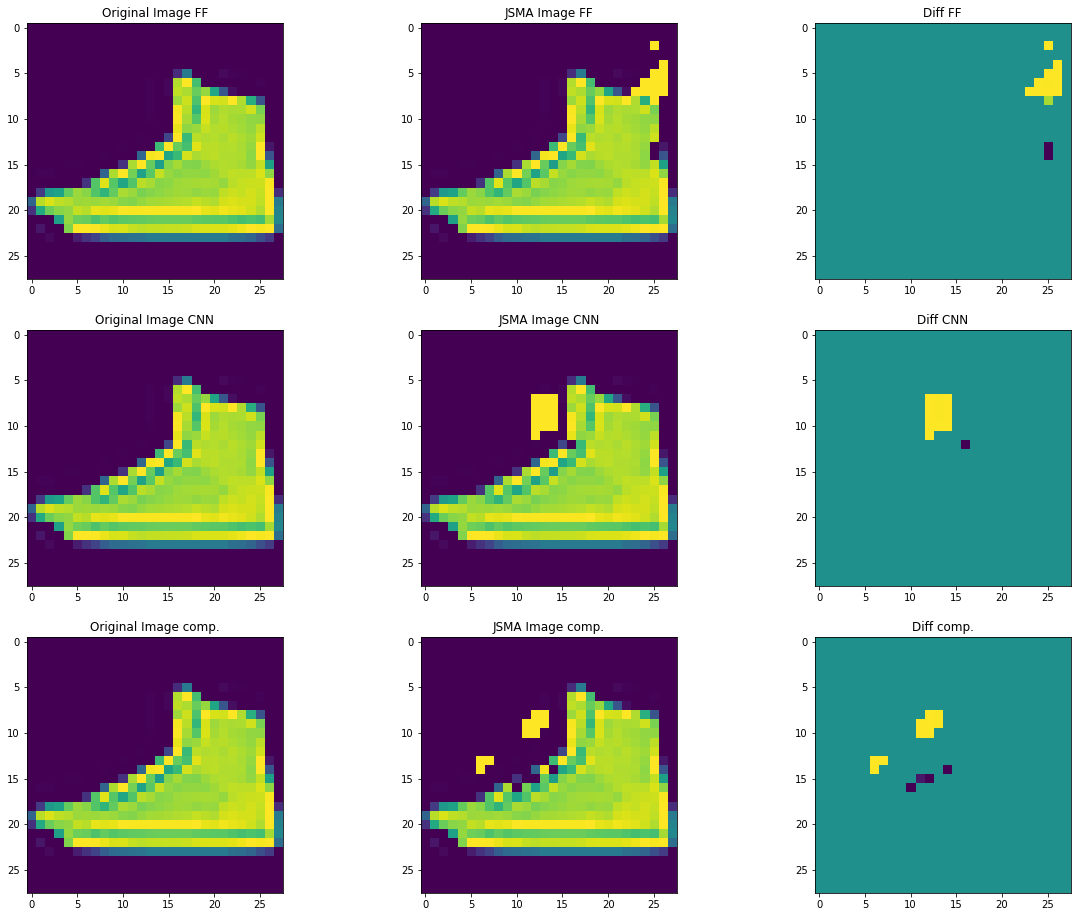

In [ ]:
 #@title Visualize JSMA { form-width: "20%" }

idx = 55

fig = plt.figure()

print(mnist_classes[mnist_y["test"][idx]] + ": " + str(mnist_y["test"][idx]))

fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(20,16))
print("Epsilon (pix): " + str(num_pix))

ax[0][0].set_title("Original Image FF")
ax[0][0].imshow(mnist_x["test"][idx])
ax[0][1].set_title("JSMA Image FF")
ax[0][1].imshow(test_mnist_x_jsma_ff[idx])
ax[0][2].set_title("Diff FF")
ax[0][2].imshow(test_mnist_x_jsma_ff[idx]-mnist_x["test"][idx])

ax[1][0].set_title("Original Image CNN")
ax[1][0].imshow(mnist_x["test"][idx])
ax[1][1].set_title("JSMA Image CNN")
ax[1][1].imshow(test_mnist_x_jsma_cnn[idx])
ax[1][2].set_title("Diff CNN")
ax[1][2].imshow(test_mnist_x_jsma_cnn[idx]-mnist_x["test"][idx])

ax[2][0].set_title("Original Image comp.")
ax[2][0].imshow(mnist_x["test"][idx])
ax[2][1].set_title("JSMA Image comp.")
ax[2][1].imshow(test_mnist_x_jsma_comp[idx])
ax[2][2].set_title("Diff comp.")
ax[2][2].imshow(test_mnist_x_jsma_comp[idx]-mnist_x["test"][idx])


In [ ]:
 #@title Test JSMA { form-width: "20%" }

mnist_ff_jsma_testset = ImageDataset(test_mnist_x_jsma_ff,mnist_y["test"])
mnist_ff_jsma_testloader = DataLoader(mnist_ff_jsma_testset,50,shuffle=True)

mnist_cnn_jsma_testset = ImageDataset(test_mnist_x_jsma_cnn,mnist_y["test"])
mnist_cnn_jsma_testloader = DataLoader(mnist_cnn_jsma_testset,50,shuffle=True)

mnist_comp_jsma_testset = ImageDataset(test_mnist_x_jsma_comp,mnist_y["test"])
mnist_comp_jsma_testloader = DataLoader(mnist_cnn_jsma_testset,50,shuffle=True)

print(f'Baselines - FF: {baseline_ff}, CNN: {baseline_cnn}, Comp.: {baseline_comp}')
print(f'FF test accuracy: {test(mnist_ff,mnist_ff_jsma_testloader)[0]}')
print(f'CNN test accuracy: {test(mnist_cnn,mnist_cnn_jsma_testloader)[0]}')
print(f'Composite test accuracy: {test(mnist_comp,mnist_comp_jsma_testloader)[0]}')


Baselines - FF: 0.797, CNN: 0.4485, Comp.: 0.7465
FF test accuracy: 0.355
CNN test accuracy: 0.233
Composite test accuracy: 0.6445


In [ ]:
#@title Plug-in, JSMA { form-width: "20%" }

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      mnist_ff_jsma_testloader,weight_scheme='one_hot',trained=False)
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                      mnist_ff_jsma_testloader,weight_scheme='one_hot',trained=False)
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                      mnist_ff_jsma_testloader,weight_scheme='one_hot',trained=False)
print(f'Comp. test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      mnist_ff_jsma_testloader,weight_scheme='weighted',trained=False)
print(f'FF test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                      mnist_ff_jsma_testloader,weight_scheme='weighted',trained=False)
print(f'CNN test accuracy: {acc}')

prediction, softmax_score, acc = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                      mnist_ff_jsma_testloader,weight_scheme='weighted',trained=False)
print(f'Comp. test accuracy: {acc}')

FF test accuracy: 0.376
CNN test accuracy: 0.3895
Comp. test accuracy: 0.6095
FF test accuracy: 0.377
CNN test accuracy: 0.3935
Comp. test accuracy: 0.6095


Baselines - FF: 0.797
FF attacked using FF - test accuracy: 0.355
FF attacked using CNN - test accuracy: 0.6775
FF attacked using comp. - test accuracy: 0.6775
Baselines - CNN: 0.4485
CNN attacked using F - test accuracy: 0.3895
CNN attacked using CNN - test accuracy: 0.233
CNN attacked using comp. - test accuracy: 0.233
Baselines - Comp.: 0.7465
Comp. attacked using FF - test accuracy: 0.631
Comp. attacked using CNN - test accuracy: 0.6445
Comp. attacked using comp. - test accuracy: 0.6445


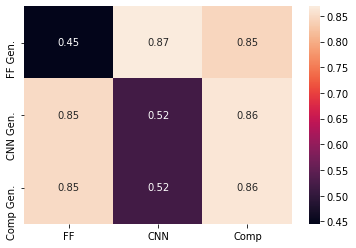

In [ ]:
#@title JSMA transfer { form-width: "20%" }

print(f'Baselines - FF: {baseline_ff}')
ff00 = test(mnist_ff,mnist_ff_jsma_testloader)[0]
print(f'FF attacked using FF - test accuracy: {ff00}')
ff01 = test(mnist_ff,mnist_cnn_jsma_testloader)[0]
print(f'FF attacked using CNN - test accuracy: {ff01}')
ff02 = test(mnist_ff,mnist_comp_jsma_testloader)[0]
print(f'FF attacked using comp. - test accuracy: {ff02}')

print(f'Baselines - CNN: {baseline_cnn}')
cnn10 = test(mnist_cnn,mnist_ff_jsma_testloader)[0]
print(f'CNN attacked using F - test accuracy: {cnn10}')
cnn11 = test(mnist_cnn,mnist_cnn_jsma_testloader)[0]
print(f'CNN attacked using CNN - test accuracy: {cnn11}')
cnn12 = test(mnist_cnn,mnist_comp_jsma_testloader)[0]
print(f'CNN attacked using comp. - test accuracy: {cnn12}')

print(f'Baselines - Comp.: {baseline_comp}')
comp20 = test(mnist_comp,mnist_ff_jsma_testloader)[0]
print(f'Comp. attacked using FF - test accuracy: {comp20}')
comp21 = test(mnist_comp,mnist_cnn_jsma_testloader)[0]
print(f'Comp. attacked using CNN - test accuracy: {comp21}')
comp22 = test(mnist_comp,mnist_comp_jsma_testloader)[0]
print(f'Comp. attacked using comp. - test accuracy: {comp22}')

ff_col = [ff00,ff01,ff02]
ff_col = np.array(ff_col) / baseline_ff
cnn_col = [cnn10,cnn11,cnn12]
cnn_col = np.array(cnn_col) / baseline_cnn
comp_col = [comp20,comp21,comp22]
comp_col = np.array(comp_col) / baseline_comp

cross_grad = [ff_col,cnn_col,comp_col]

import pandas as pd

data = {'FF':  [cross_grad[0][0], cross_grad[0][1], cross_grad[0][2]],
        'CNN': [cross_grad[1][0], cross_grad[1][1], cross_grad[1][2]],
        'Comp': [cross_grad[2][0], cross_grad[2][1], cross_grad[2][2]]
        }

cross_grad_df = pd.DataFrame (data, columns = ['FF','CNN', 'Comp'],
                   index=['FF Gen.','CNN Gen.','Comp Gen.'])

sns.heatmap(cross_grad_df,annot=True)



Baselines - FF: 0.797
FF attacked using FF - test accuracy: 0.376
FF attacked using CNN - test accuracy: 0.6565
FF attacked using comp. - test accuracy: 0.6565
Baselines - CNN: 0.4485
CNN attacked using F - test accuracy: 0.3895
CNN attacked using CNN - test accuracy: 0.263
CNN attacked using comp. - test accuracy: 0.263
Baselines - Comp.: 0.7465
Comp. attacked using FF - test accuracy: 0.6095
Comp. attacked using CNN - test accuracy: 0.639
Comp. attacked using comp. - test accuracy: 0.639


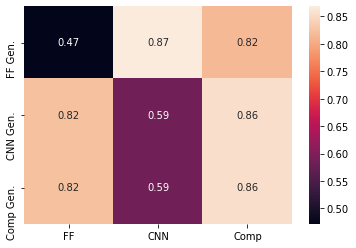

In [ ]:
#@title JSMA transfer def. { form-width: "20%" }


test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                      mnist_ff_jsma_testloader,weight_scheme='one_hot',trained=False)

print(f'Baselines - FF: {baseline_ff}')
ff00 = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                     mnist_ff_jsma_testloader,weight_scheme='one_hot',
                     trained=False)[2]
print(f'FF attacked using FF - test accuracy: {ff00}')
ff01 = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                     mnist_cnn_jsma_testloader,weight_scheme='one_hot',
                     trained=False)[2]
print(f'FF attacked using CNN - test accuracy: {ff01}')
ff02 = test_pipeline(untrained_denoiser_dict, detector, mnist_ff, 
                     mnist_comp_jsma_testloader,weight_scheme='one_hot',
                     trained=False)[2]
print(f'FF attacked using comp. - test accuracy: {ff02}')

print(f'Baselines - CNN: {baseline_cnn}')
cnn10 = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                     mnist_ff_jsma_testloader,weight_scheme='one_hot',
                     trained=False)[2]
print(f'CNN attacked using F - test accuracy: {cnn10}')
cnn11 = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                     mnist_cnn_jsma_testloader,weight_scheme='one_hot',
                     trained=False)[2]
print(f'CNN attacked using CNN - test accuracy: {cnn11}')
cnn12 = test_pipeline(untrained_denoiser_dict, detector, mnist_cnn, 
                     mnist_comp_jsma_testloader,weight_scheme='one_hot',
                     trained=False)[2]
print(f'CNN attacked using comp. - test accuracy: {cnn12}')

print(f'Baselines - Comp.: {baseline_comp}')
comp20 = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                     mnist_ff_jsma_testloader,weight_scheme='one_hot',
                     trained=False)[2]
print(f'Comp. attacked using FF - test accuracy: {comp20}')
comp21 = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                     mnist_cnn_jsma_testloader,weight_scheme='one_hot',
                     trained=False)[2]
print(f'Comp. attacked using CNN - test accuracy: {comp21}')
comp22 = test_pipeline(untrained_denoiser_dict, detector, mnist_comp, 
                     mnist_comp_jsma_testloader,weight_scheme='one_hot',
                     trained=False)[2]
print(f'Comp. attacked using comp. - test accuracy: {comp22}')

ff_col = [ff00,ff01,ff02]
ff_col = np.array(ff_col) / baseline_ff
cnn_col = [cnn10,cnn11,cnn12]
cnn_col = np.array(cnn_col) / baseline_cnn
comp_col = [comp20,comp21,comp22]
comp_col = np.array(comp_col) / baseline_comp

cross_grad = [ff_col,cnn_col,comp_col]

import pandas as pd

data = {'FF':  [cross_grad[0][0], cross_grad[0][1], cross_grad[0][2]],
        'CNN': [cross_grad[1][0], cross_grad[1][1], cross_grad[1][2]],
        'Comp': [cross_grad[2][0], cross_grad[2][1], cross_grad[2][2]]
        }

cross_grad_df = pd.DataFrame (data, columns = ['FF','CNN', 'Comp'],
                   index=['FF Gen.','CNN Gen.','Comp Gen.'])

sns.heatmap(cross_grad_df,annot=True)
